In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm

# Erdős data

In [169]:
data = pd.read_csv('Erdos_cross_core.csv')
data

user  core_0  core_1  core_2  core_3  core_4  core_5  \
0     840727059001417728    True    True   False   False   False    True   
1              773706709    True    True    True    True    True    True   
2     818967308966051840   False    True    True   False   False   False   
3              135516328   False    True   False    True   False    True   
4               32272194   False    True   False   False    True    True   
..                   ...     ...     ...     ...     ...     ...     ...   
100  1013701563108462592   False   False   False   False   False   False   
101  1102503628433170432   False   False   False   False   False   False   
102           1908769994   False    True   False    True   False   False   
103           2343171923   False   False   False   False   False   False   
104            556041652   False    True   False   False   False   False   

     core_6  core_7  core_8  ...  core_96  core_97  core_98  core_99  \
0     False   False   False  ...    False    False    False    False   
1      True    True    True  ...    False    False    False    False   
2     False   False   False  ...    False    False    False    False   
3     False   False   False  ...    False    False    False    False   
4     False   False   False  ...    False    False    False    False   
..      ...     ...     ...  ...      ...      ...      ...      ...   
100   False   False   False  ...    False    False    False    False   
101   False   False   False  ...    False    False    False    False   
102   False   False   False  ...    False    False    False    False   
103   False   False   False  ...    False    False    False    False   
104   False   False   False  ...    False    False    False    False   

     core_100  core_101  core_102  core_103  core_104  Average_polarity  
0       False     False     False     False     False          0.176671  
1       False     False      True     False     False          0.267456  
2       False     False     False     False     False          0.142159  
3       False     False      True     False     False          0.207447  
4       False     False     False     False     False          0.212269  
..        ...       ...       ...       ...       ...               ...  
100      True     False     False     False     False          0.010781  
101     False      True      True     False     False          0.093413  
102     False     False      True     False     False          0.242716  
103     False     False     False      True     False         -0.107417  
104     False     False      True     False      True          0.205374  

[105 rows x 107 columns]

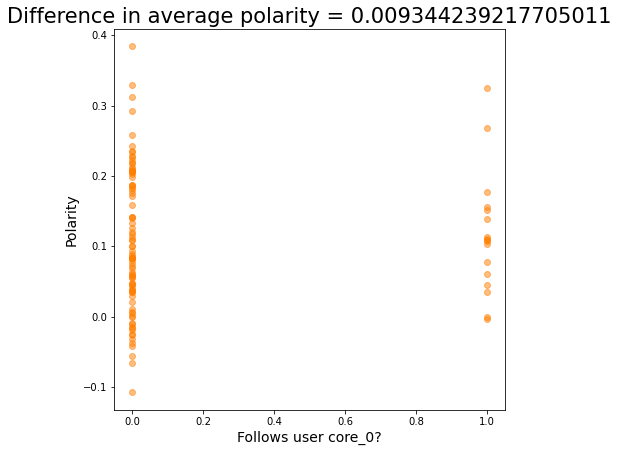

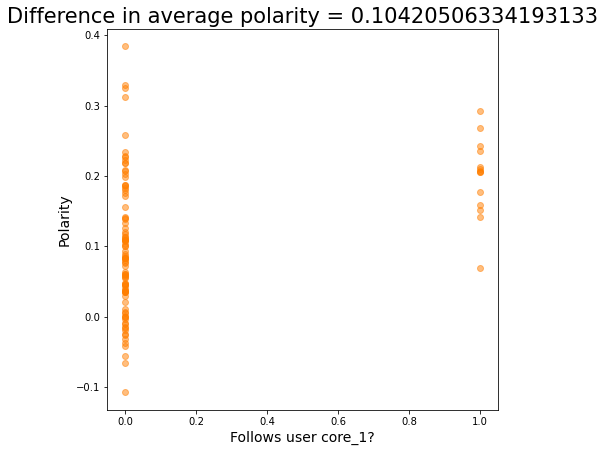

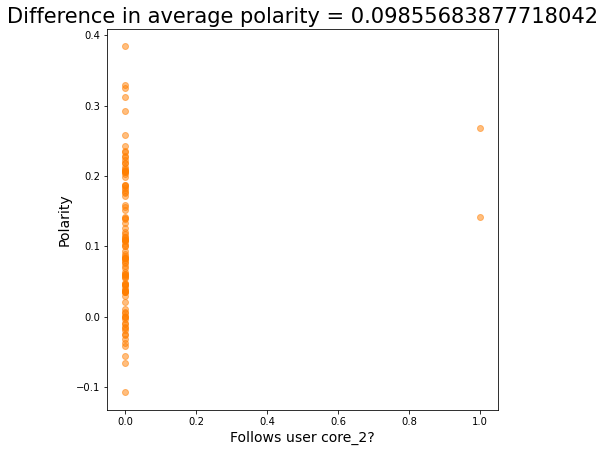

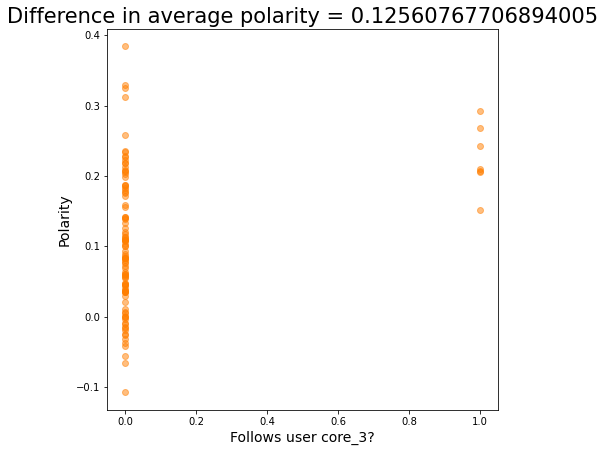

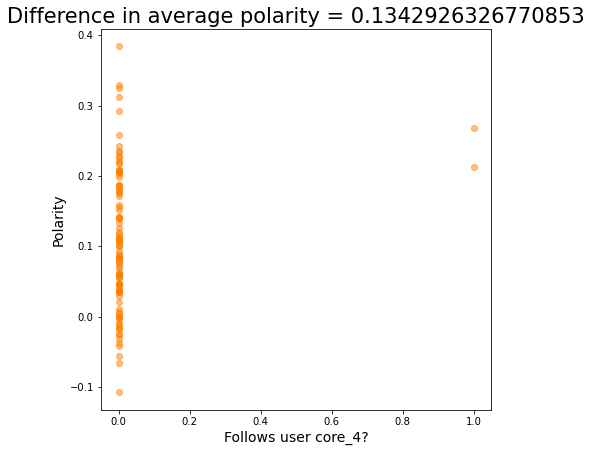

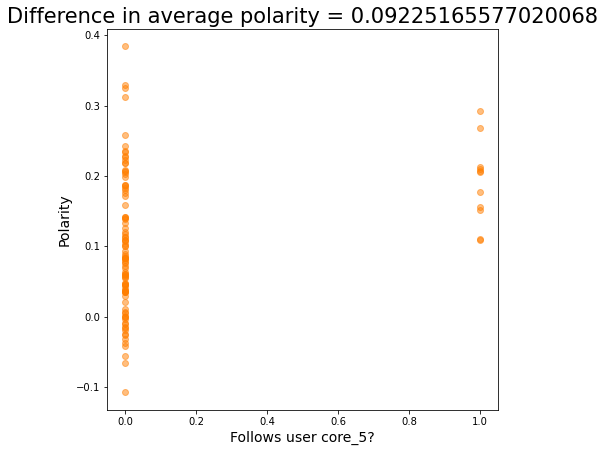

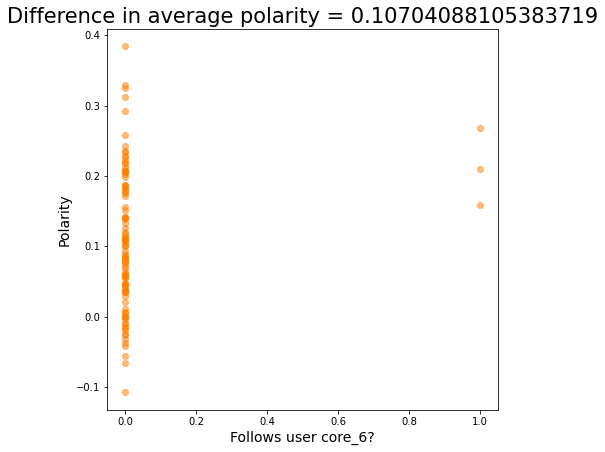

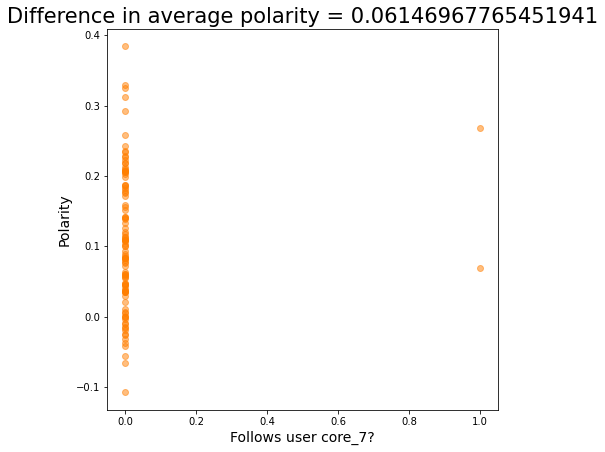

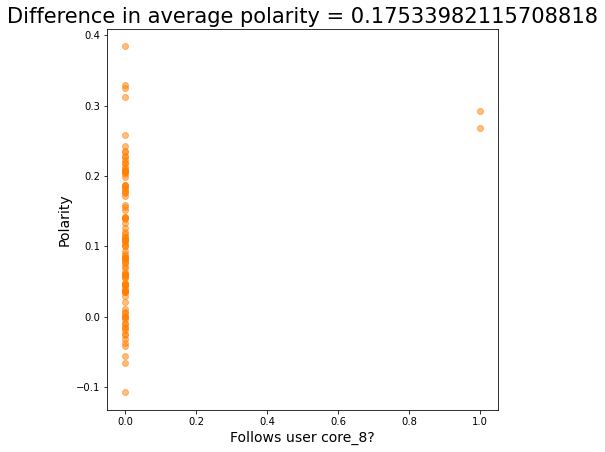

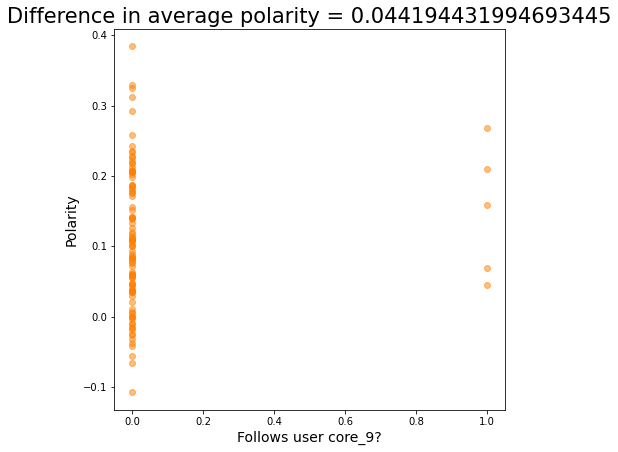

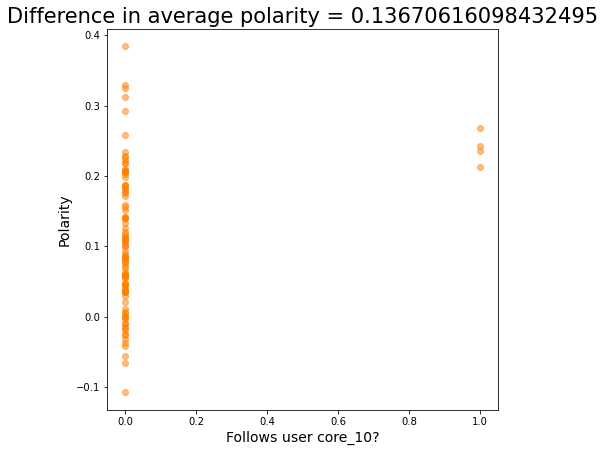

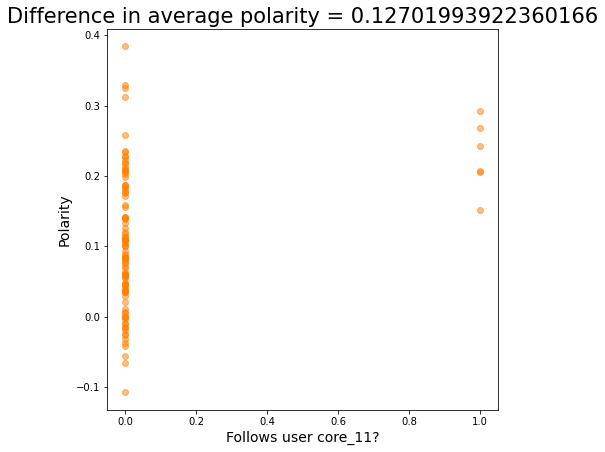

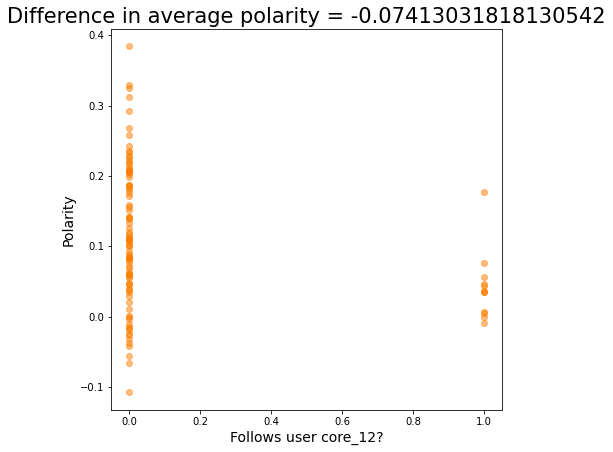

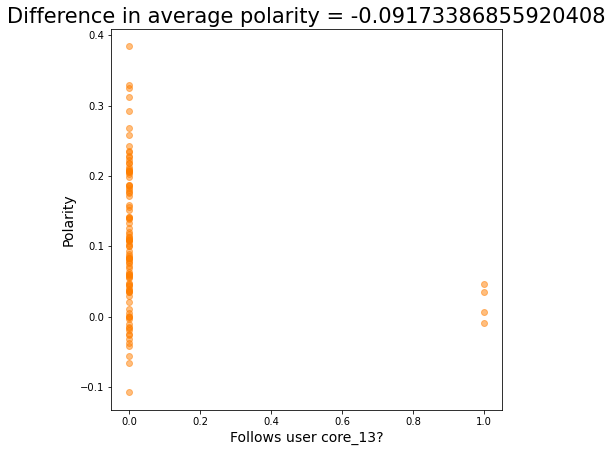

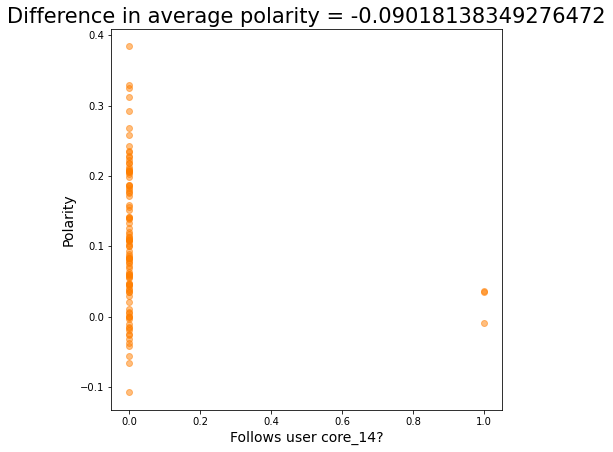

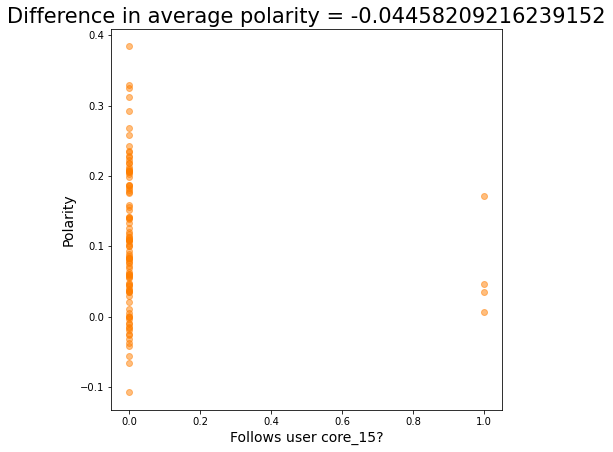

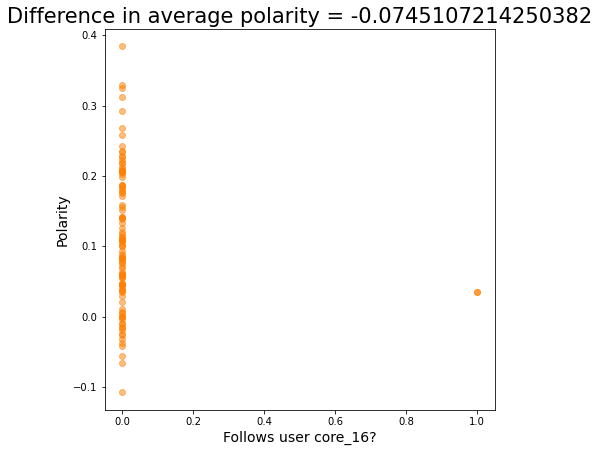

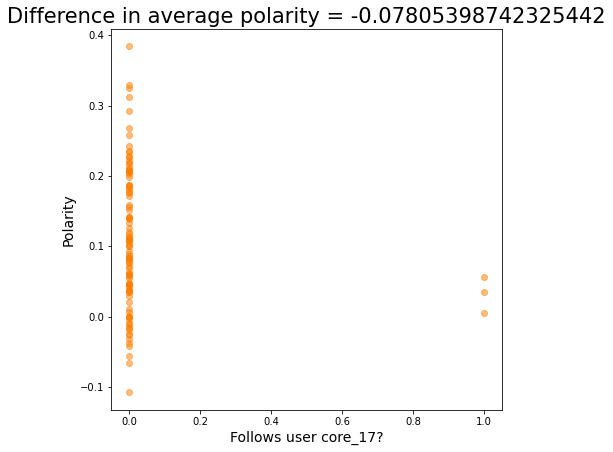

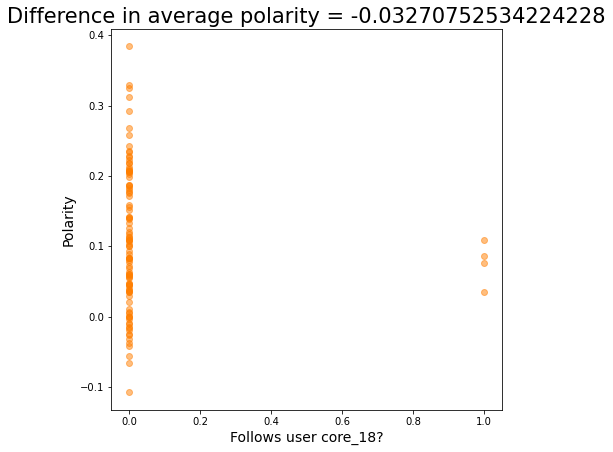

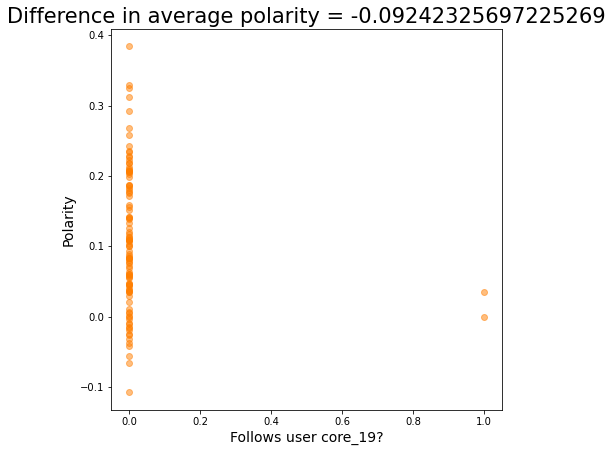

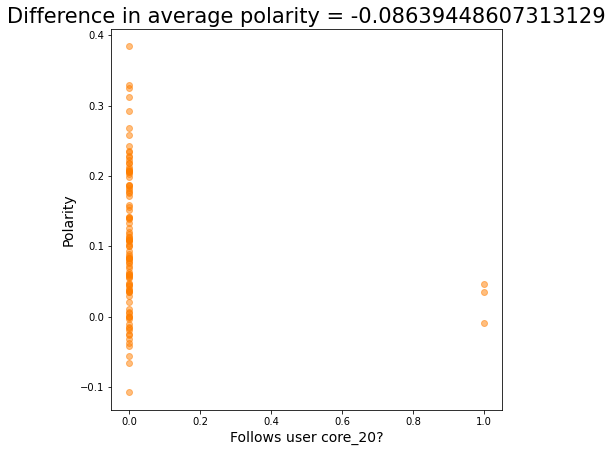

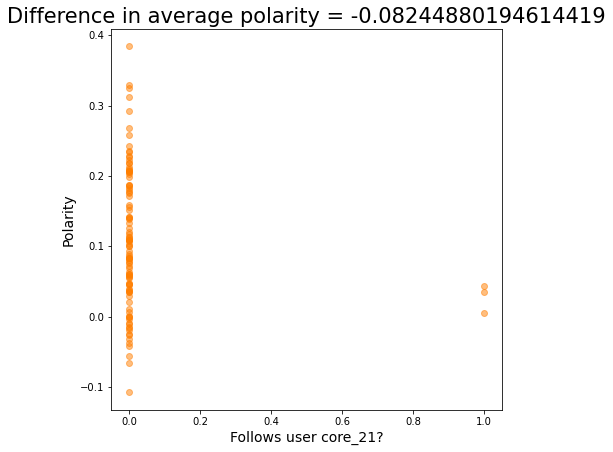

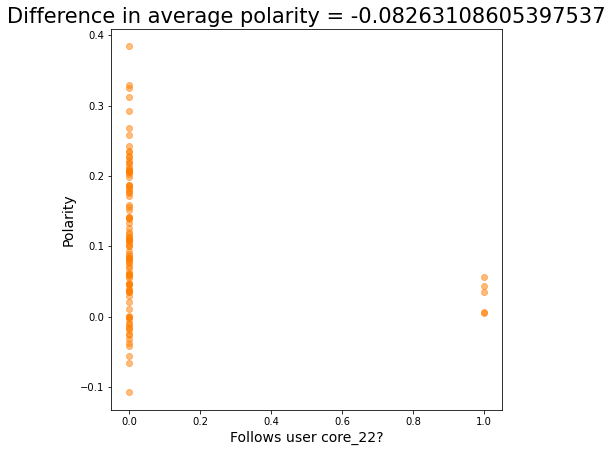

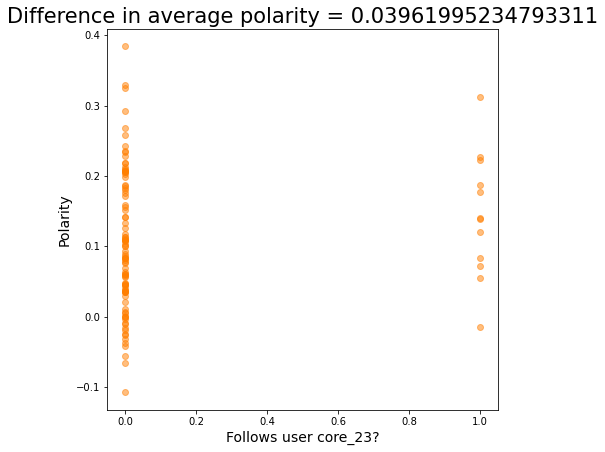

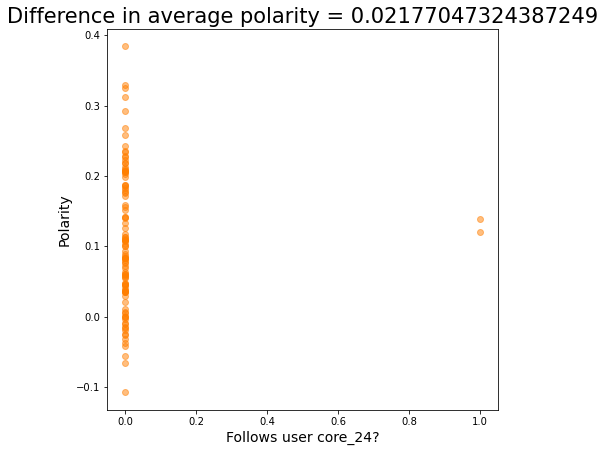

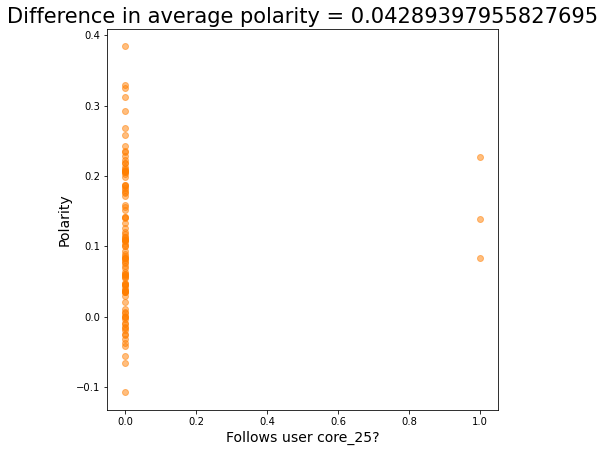

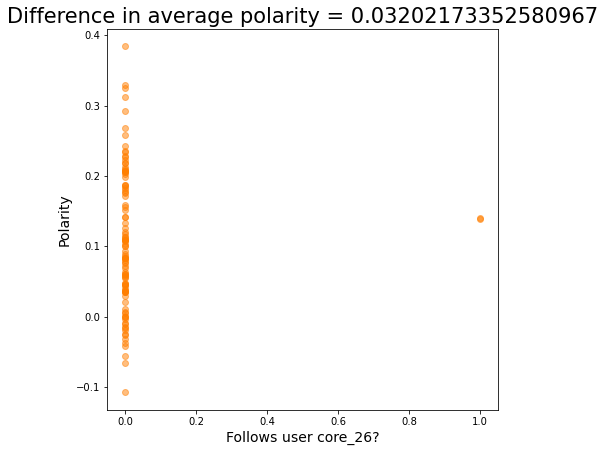

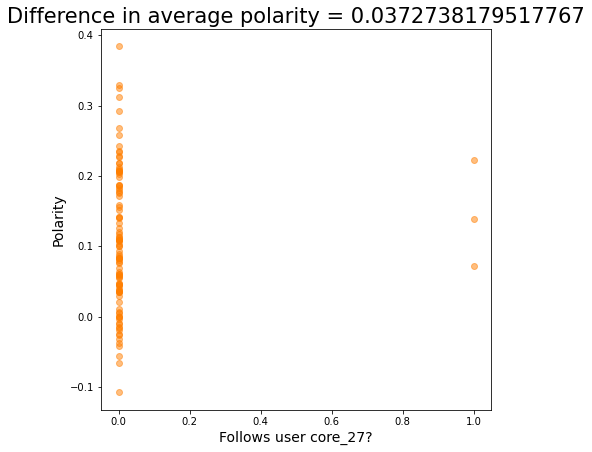

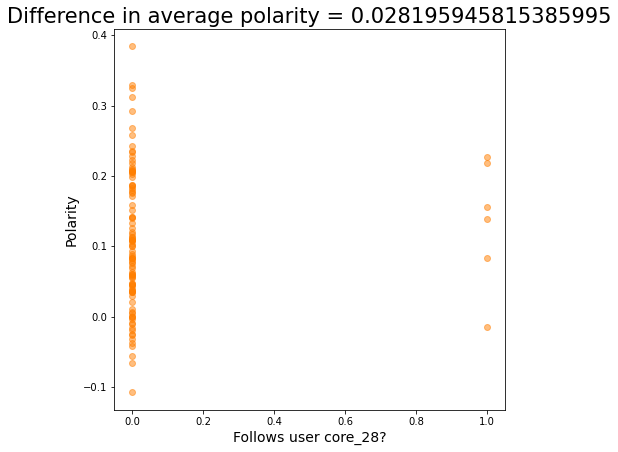

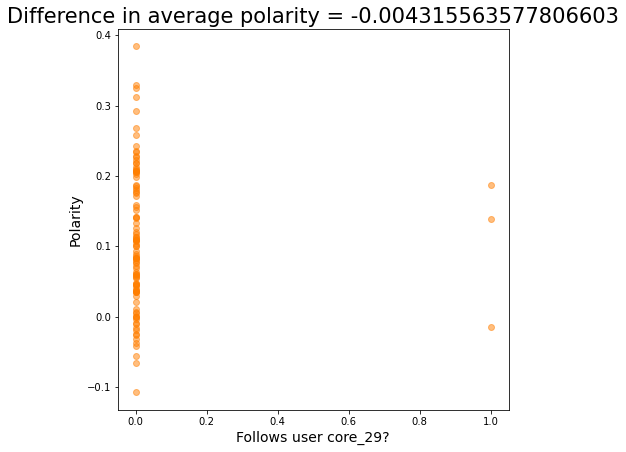

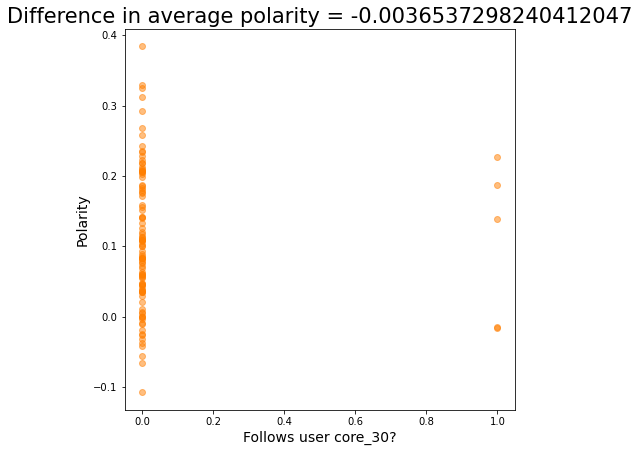

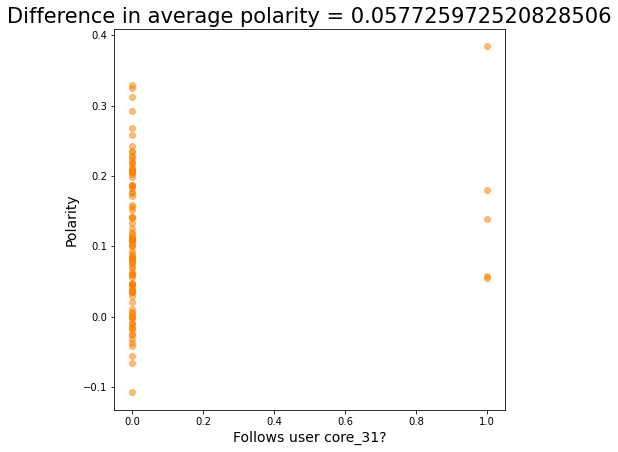

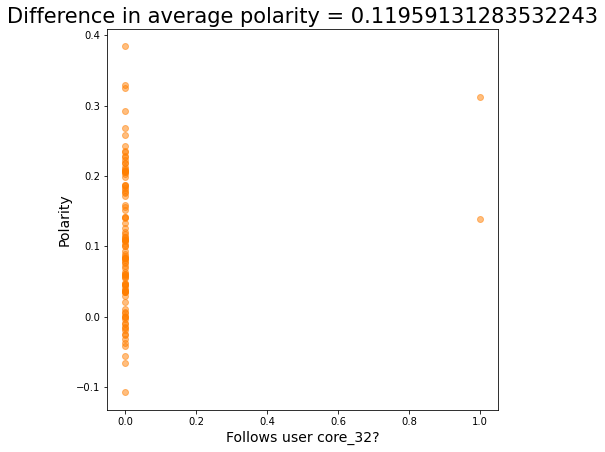

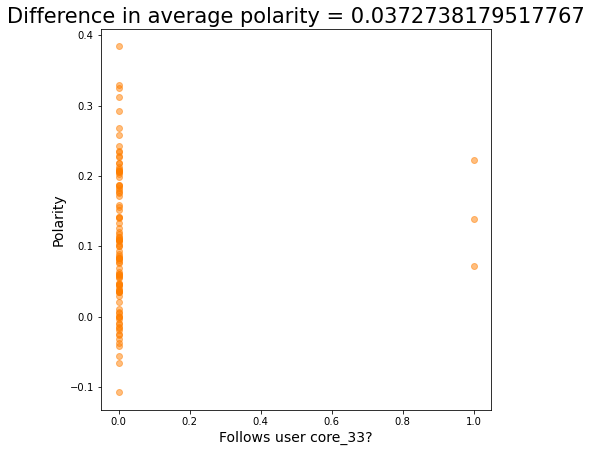

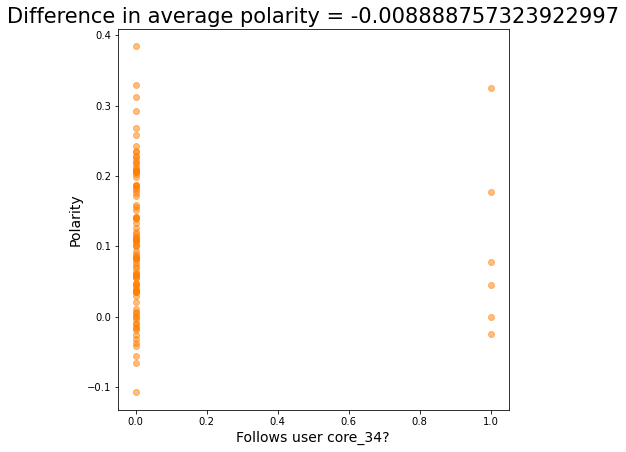

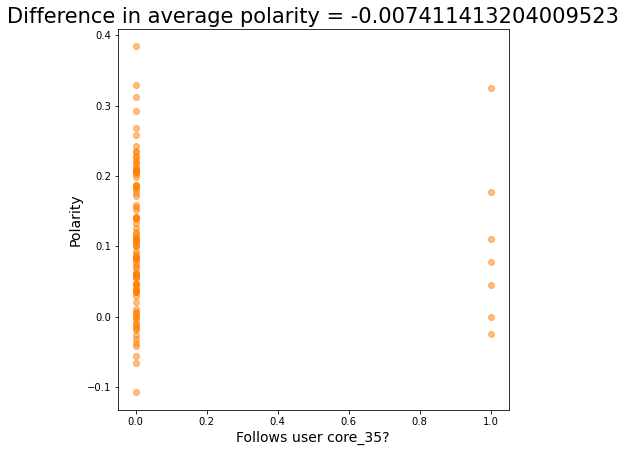

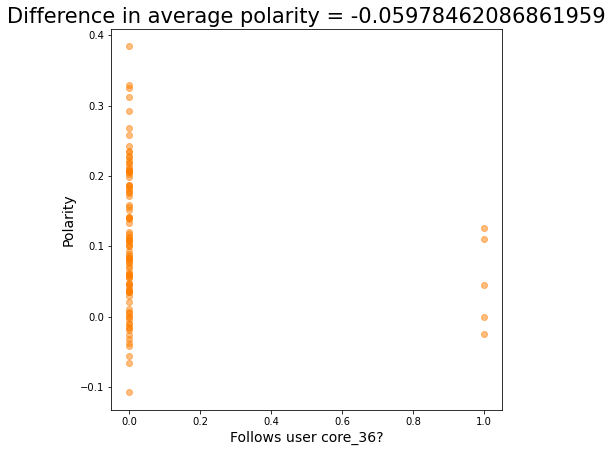

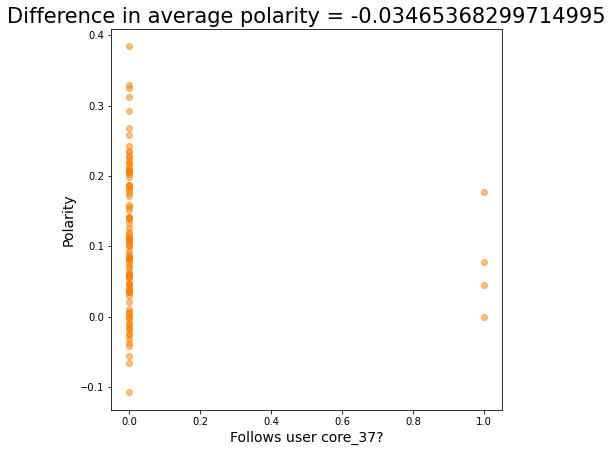

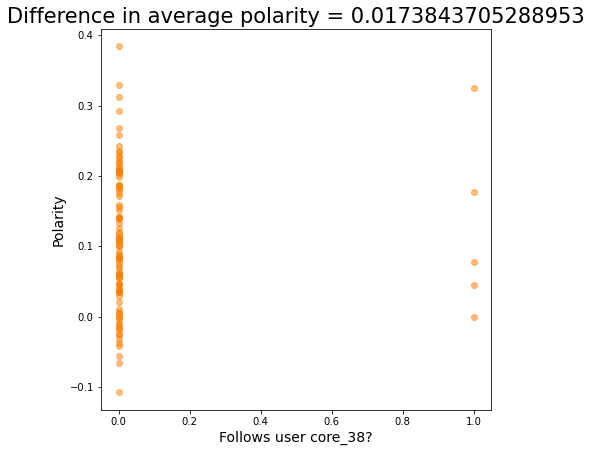

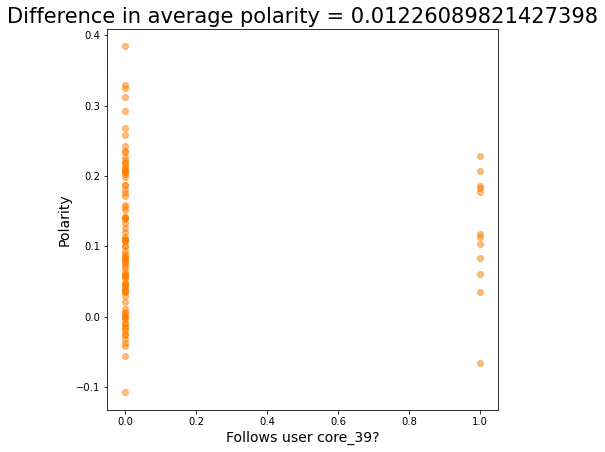

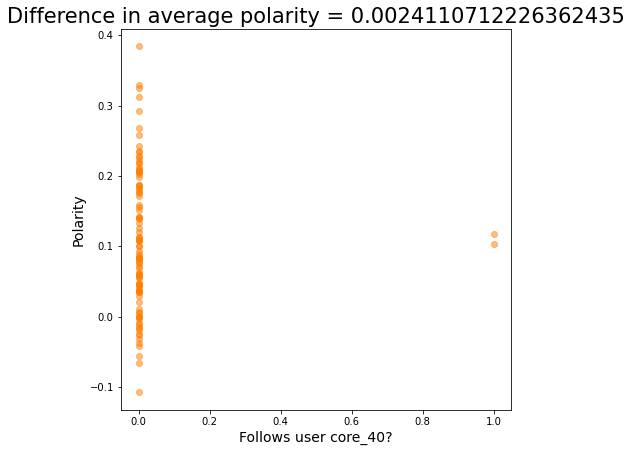

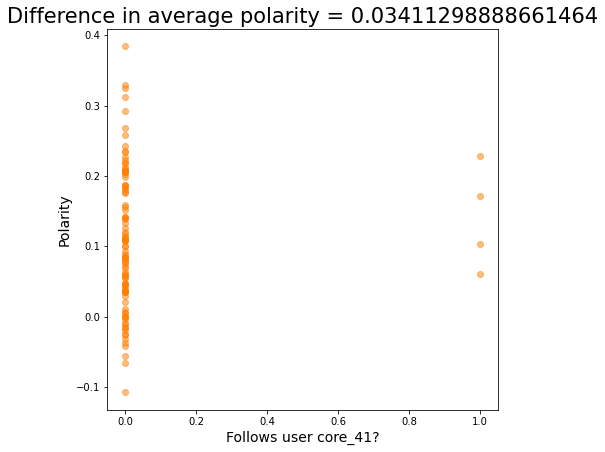

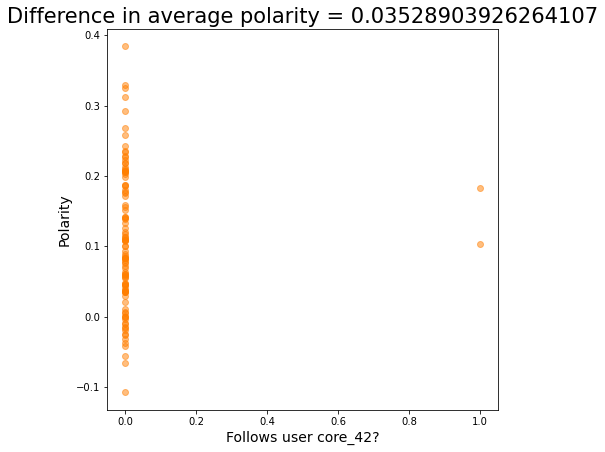

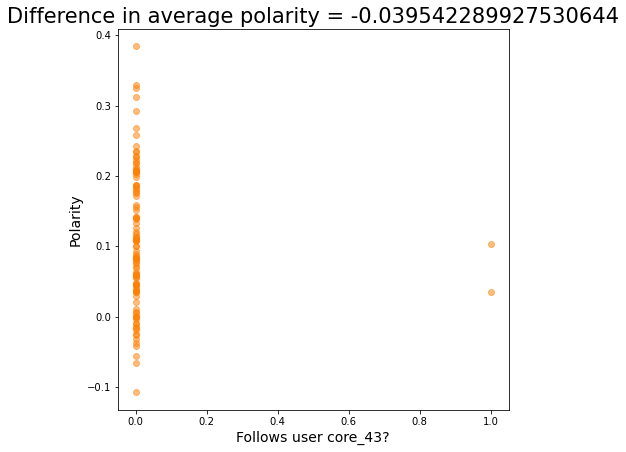

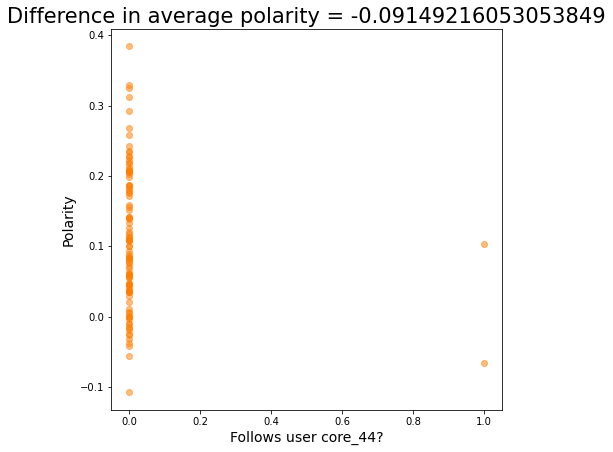

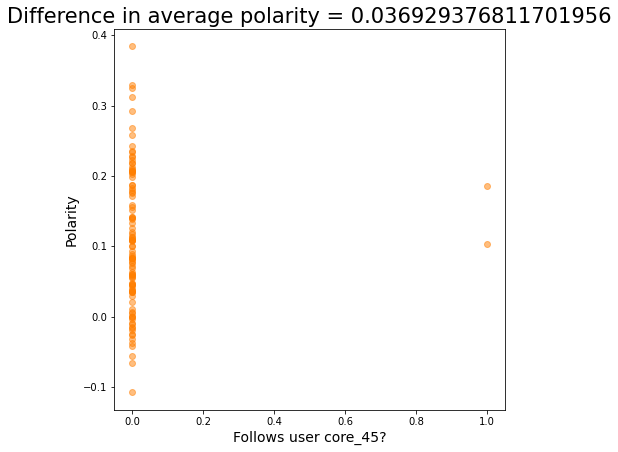

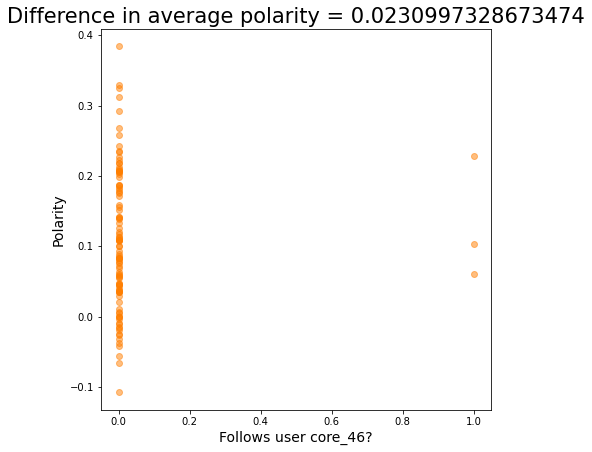

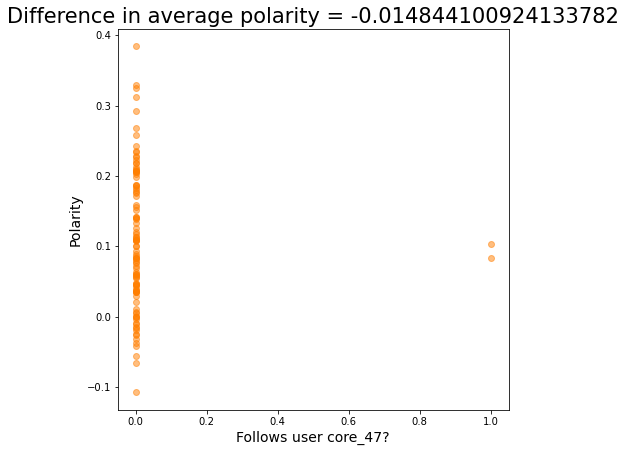

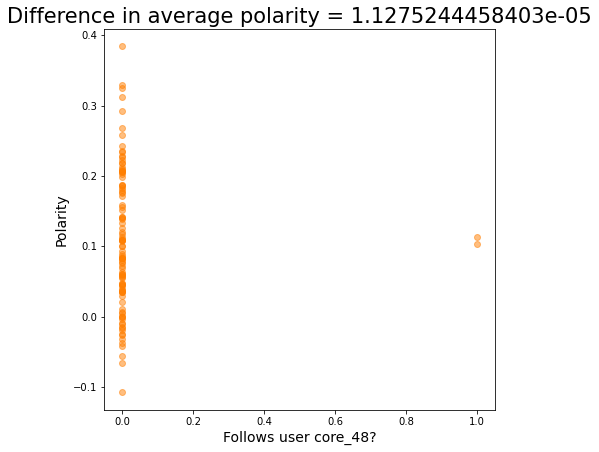

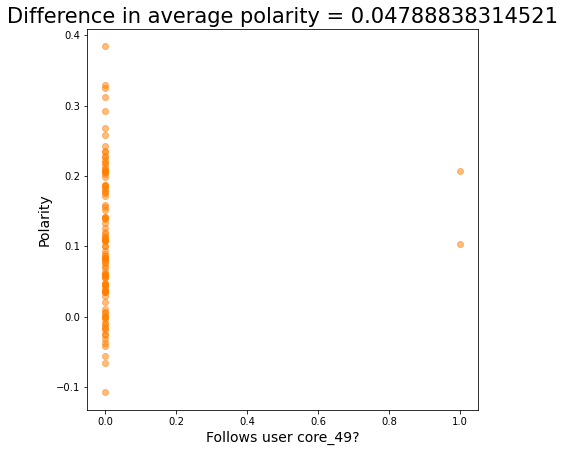

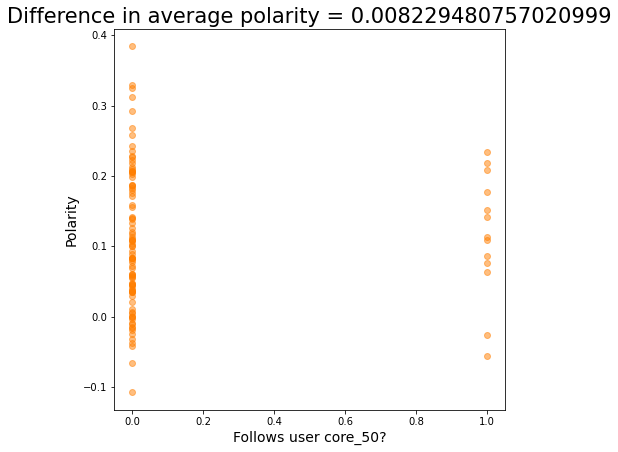

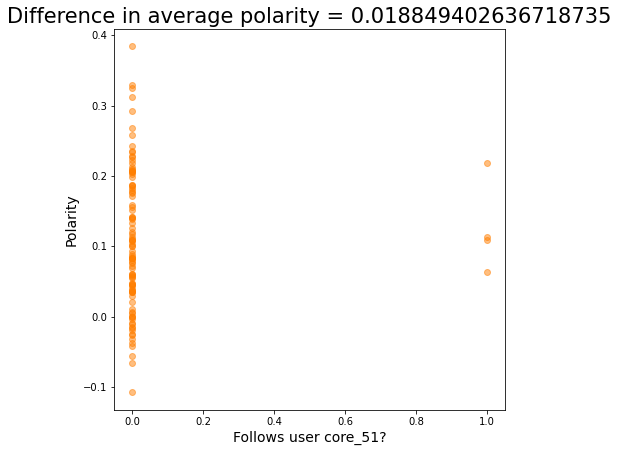

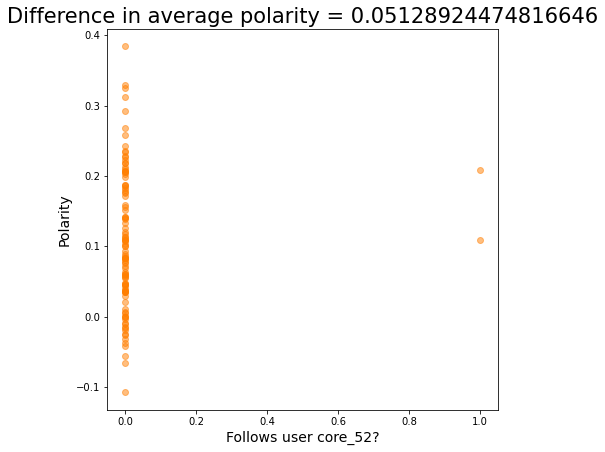

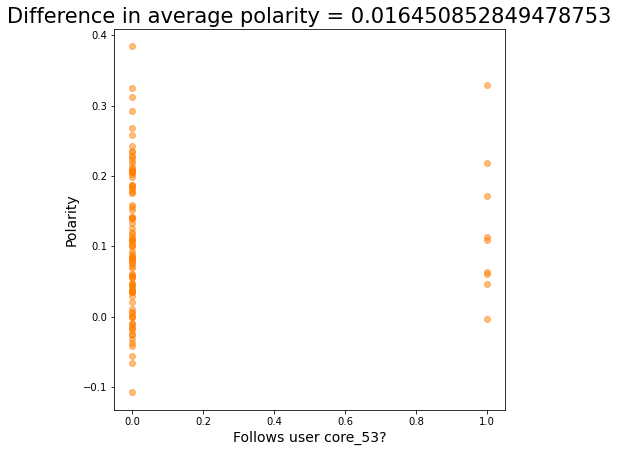

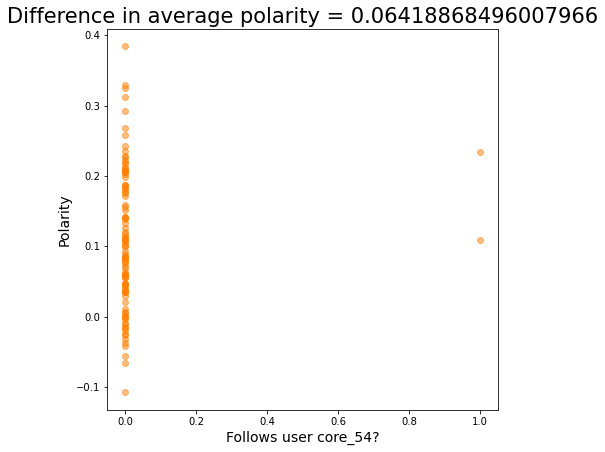

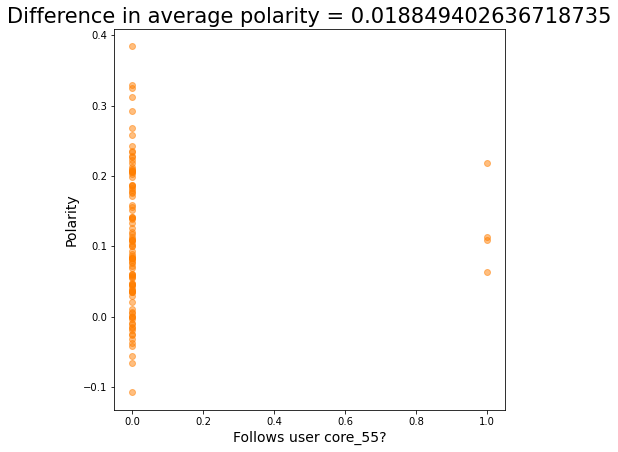

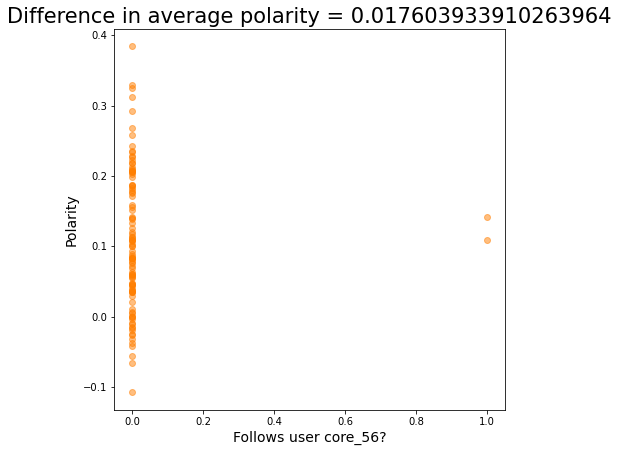

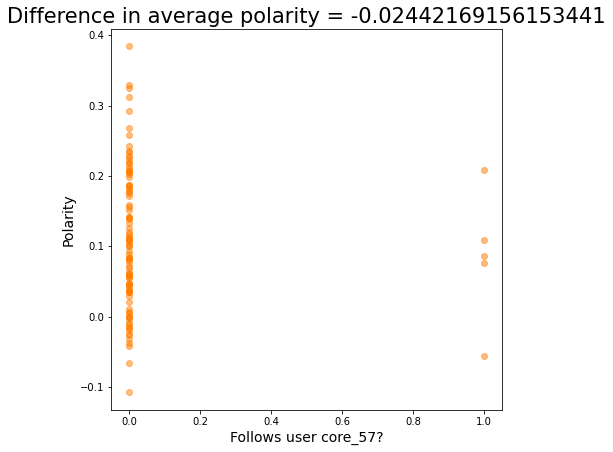

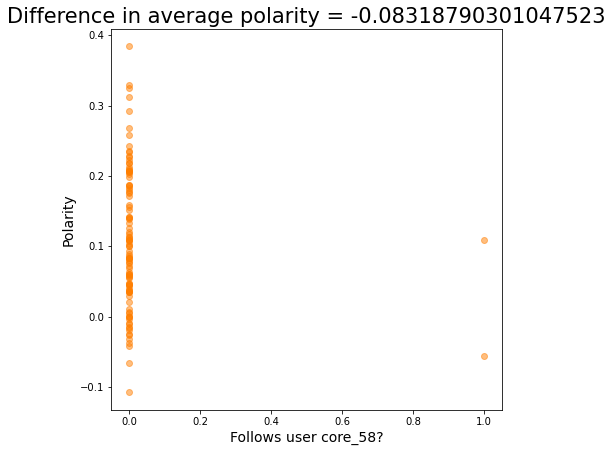

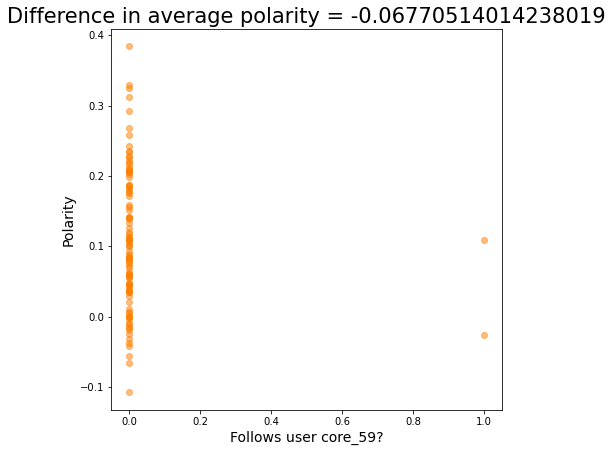

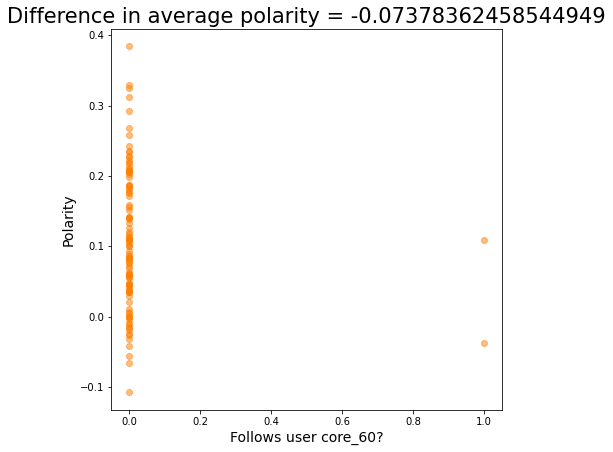

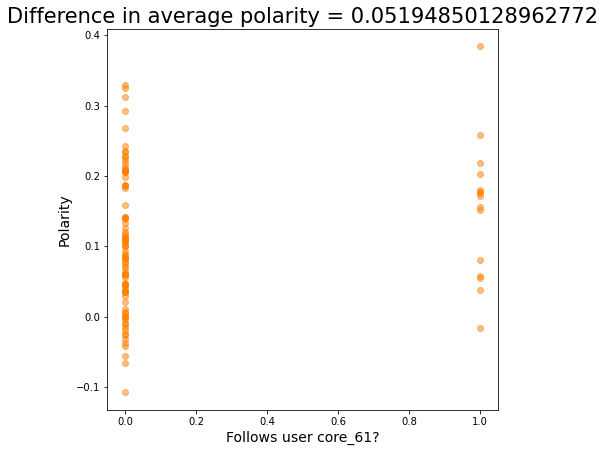

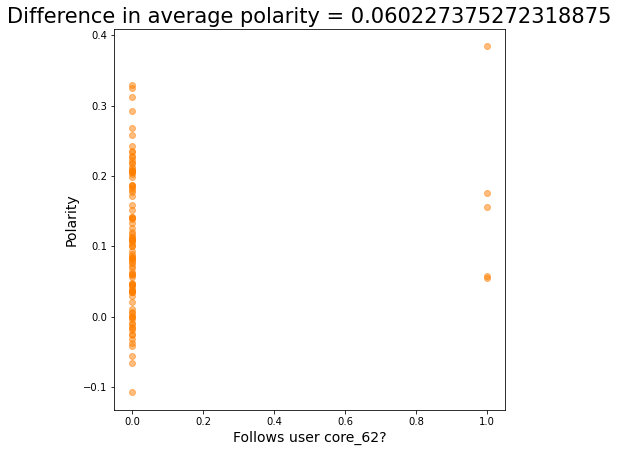

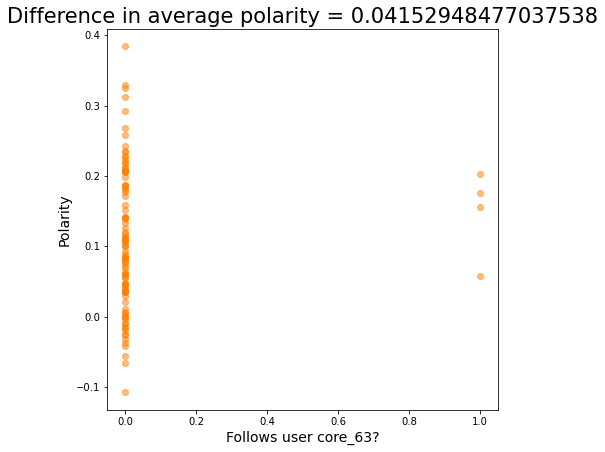

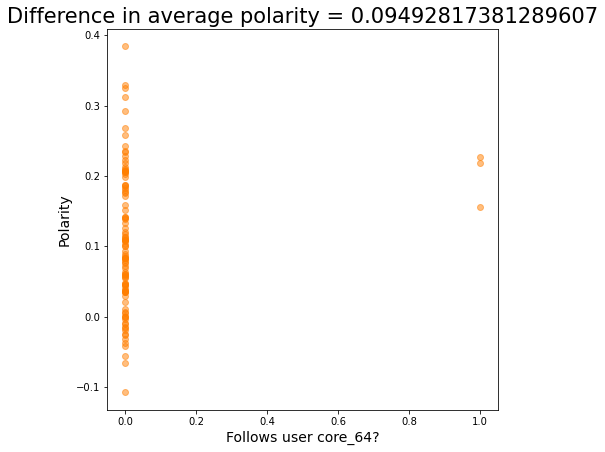

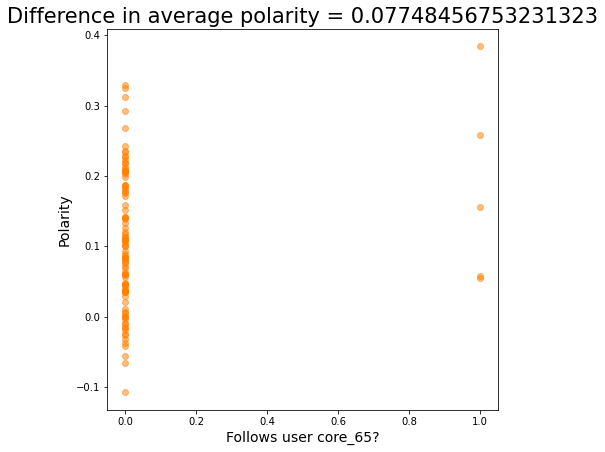

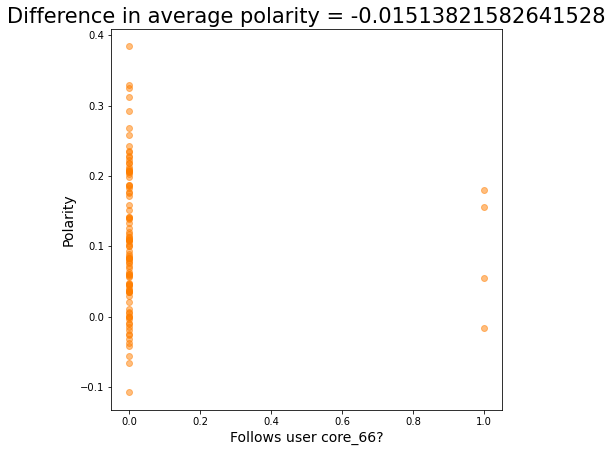

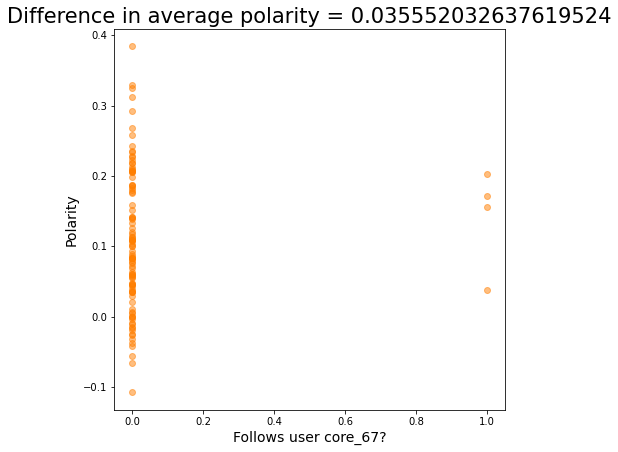

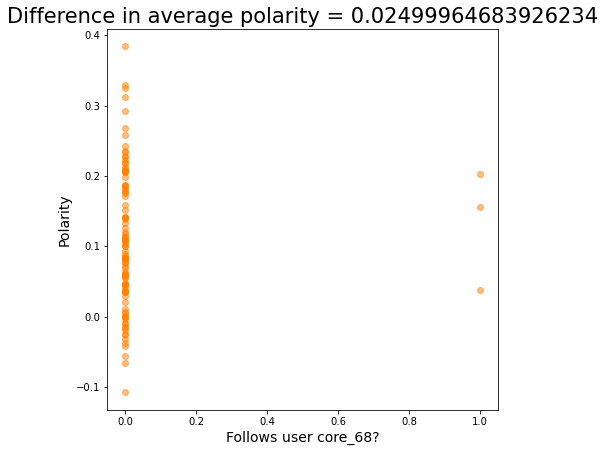

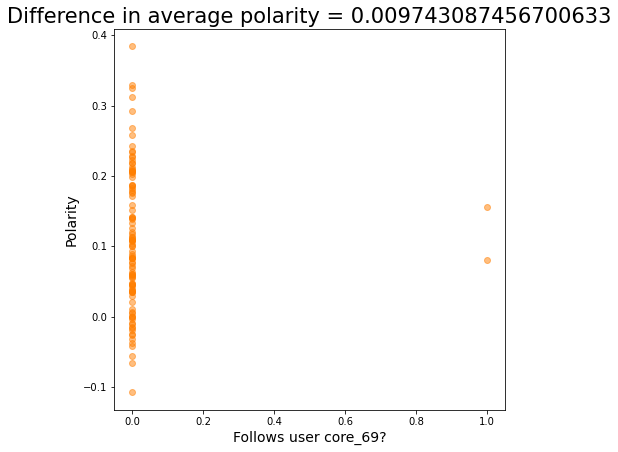

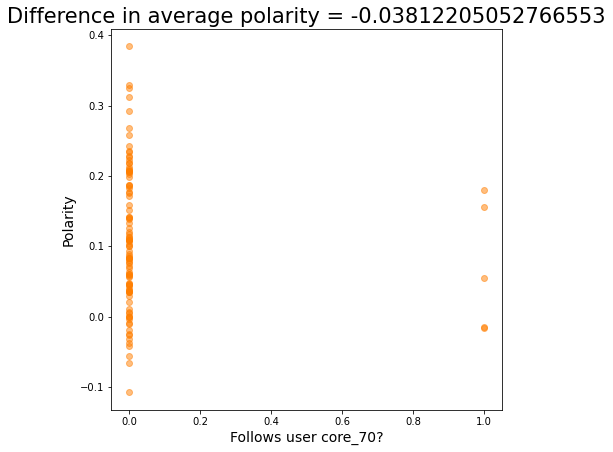

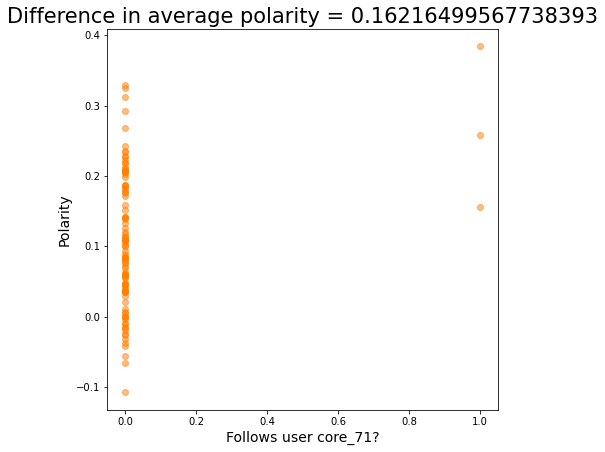

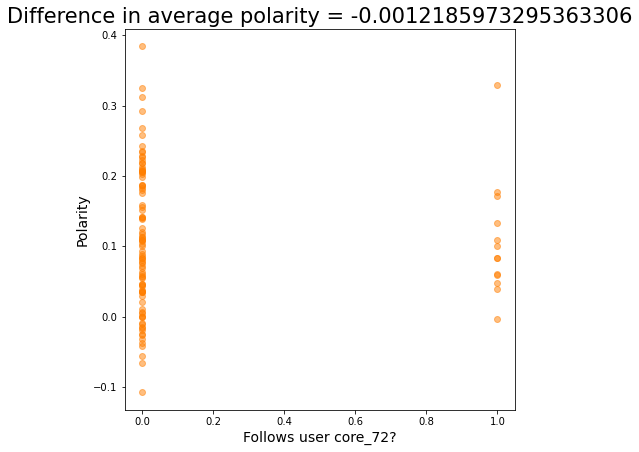

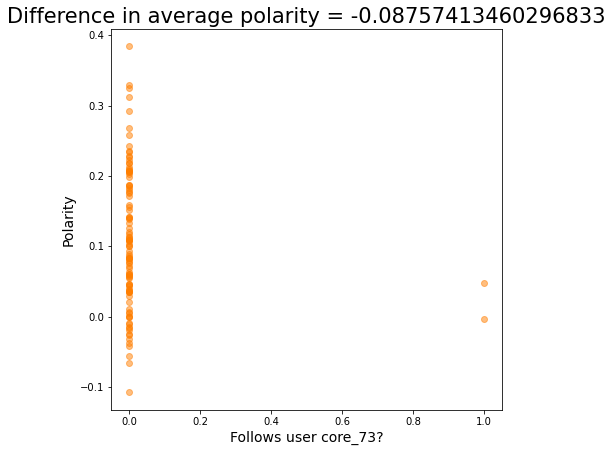

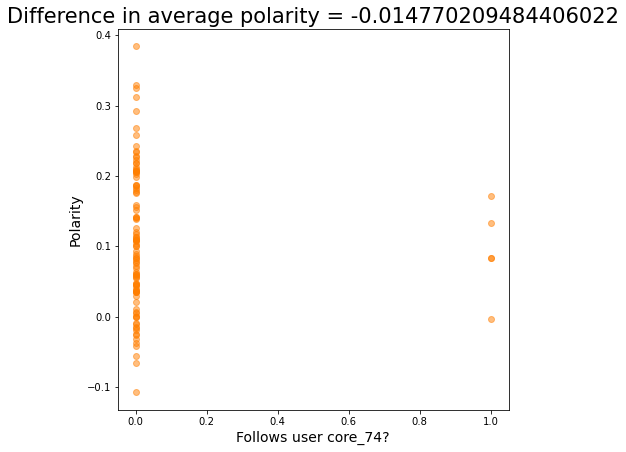

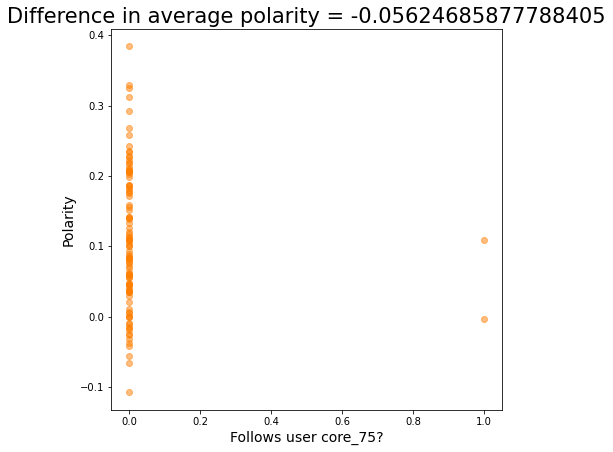

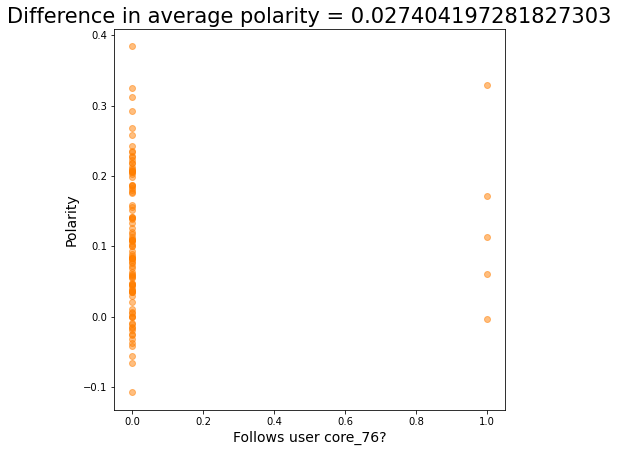

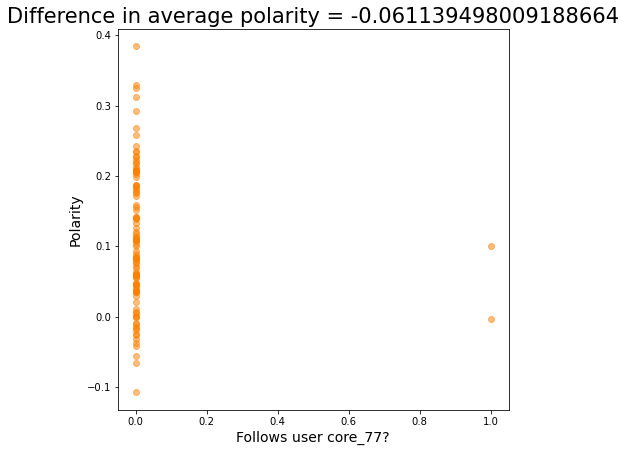

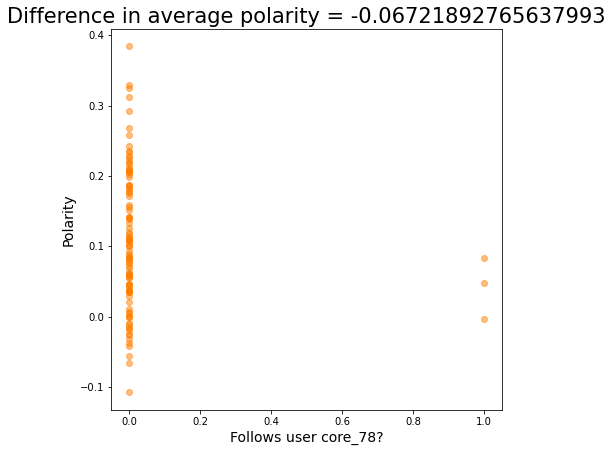

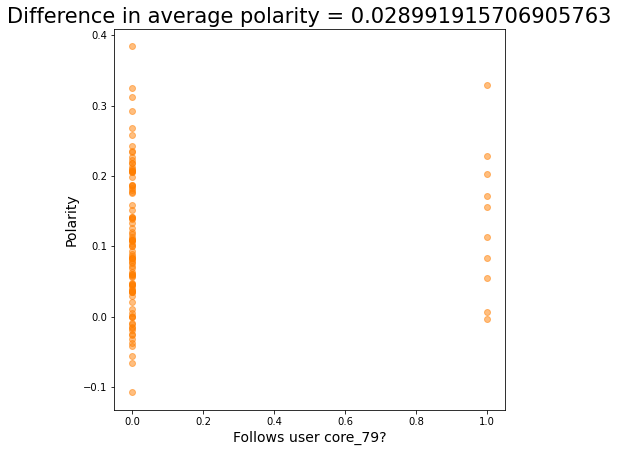

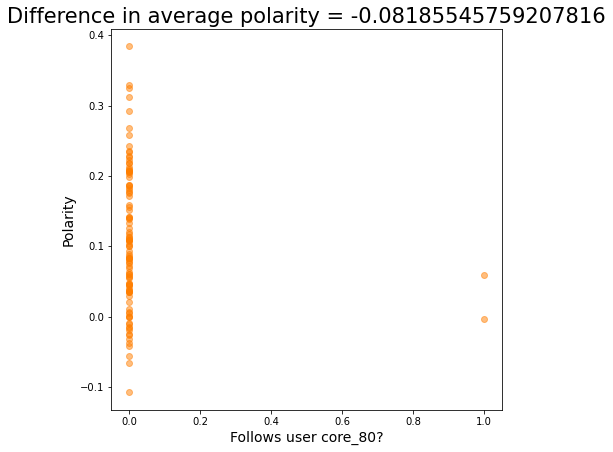

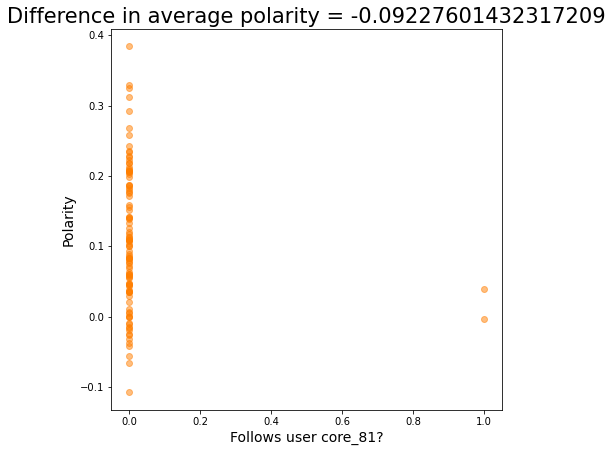

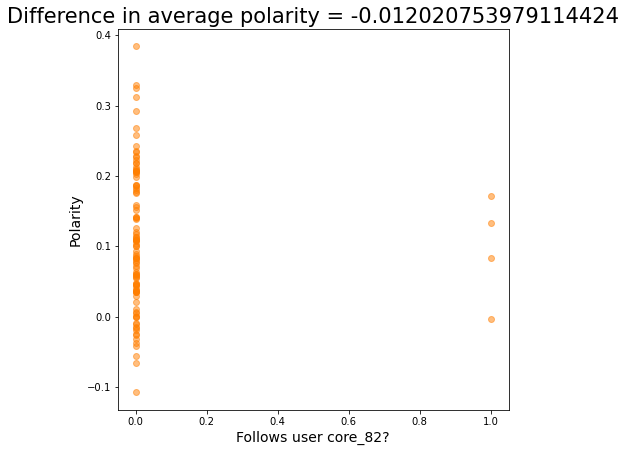

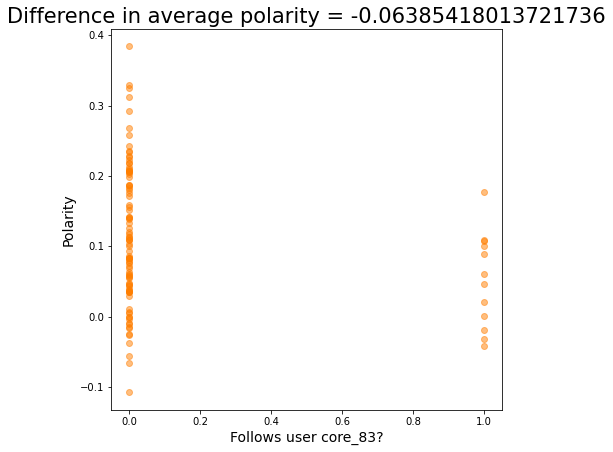

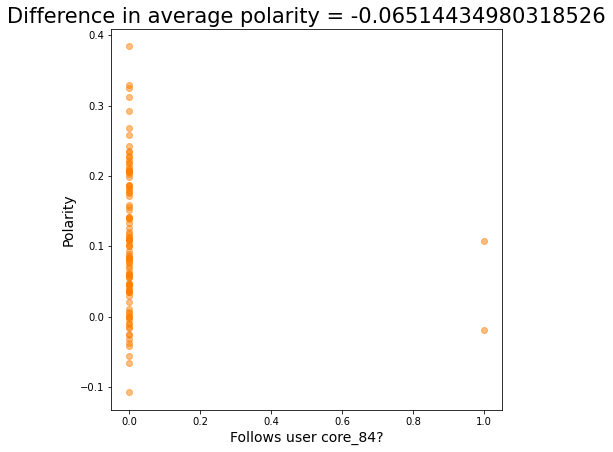

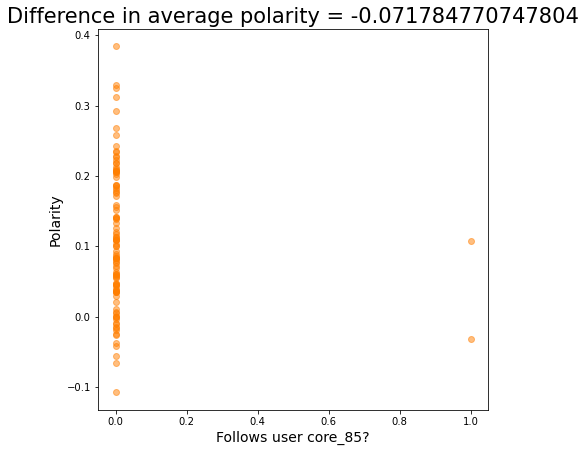

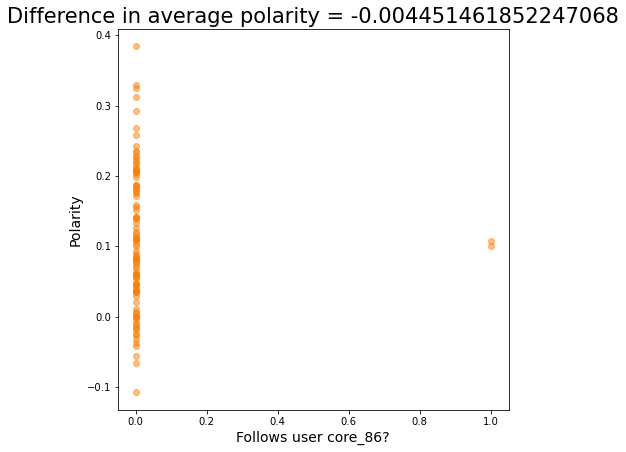

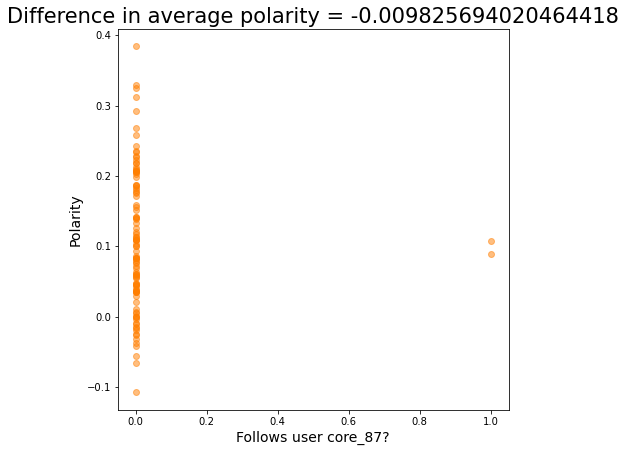

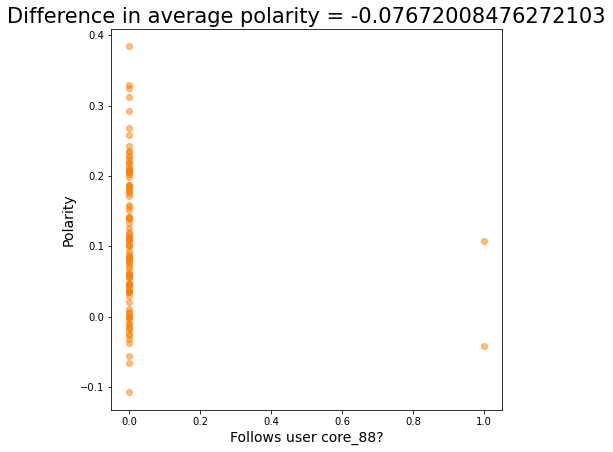

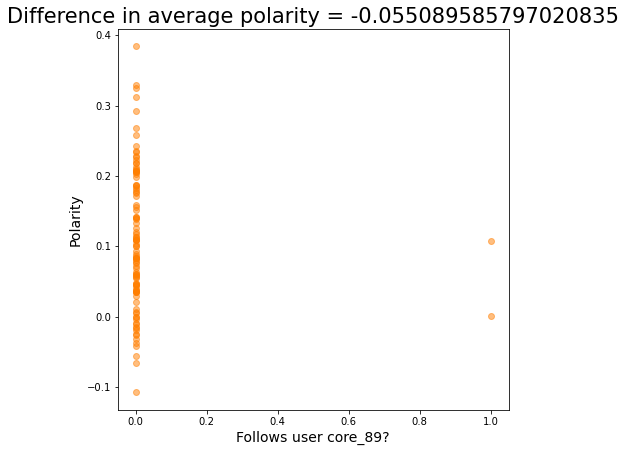

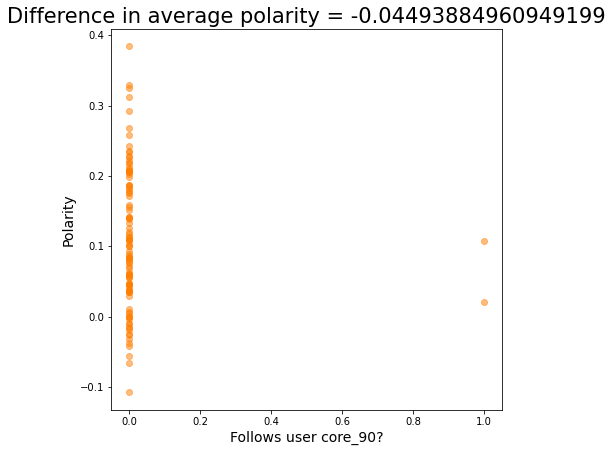

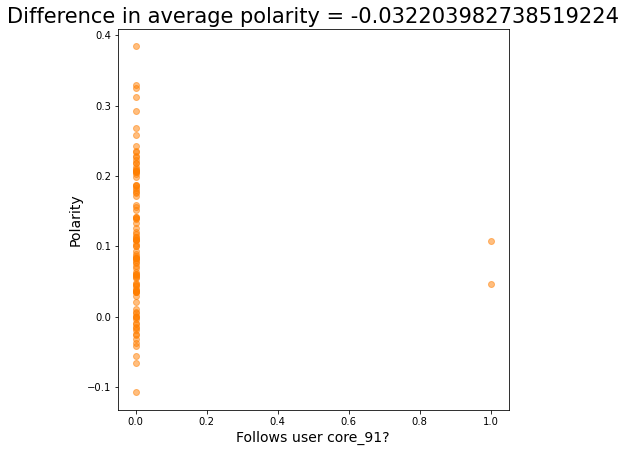

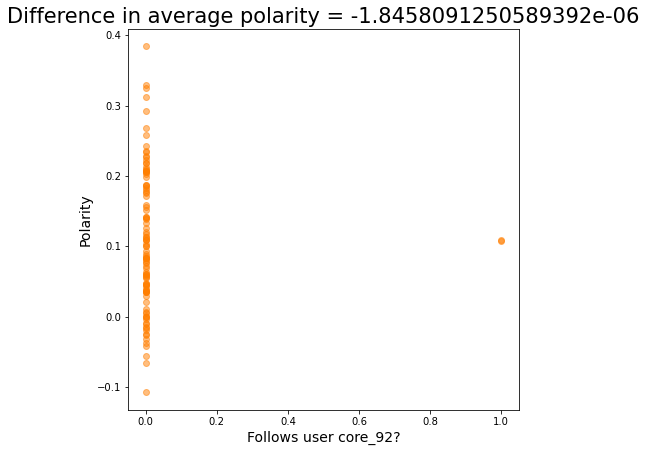

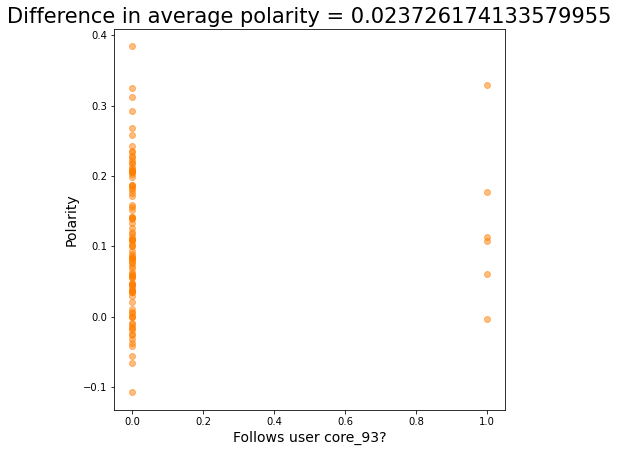

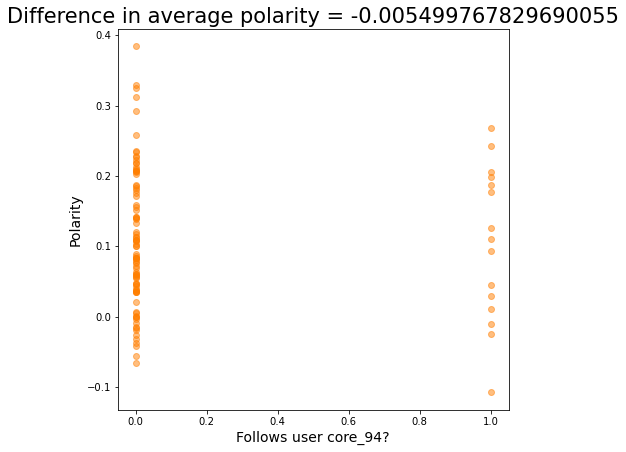

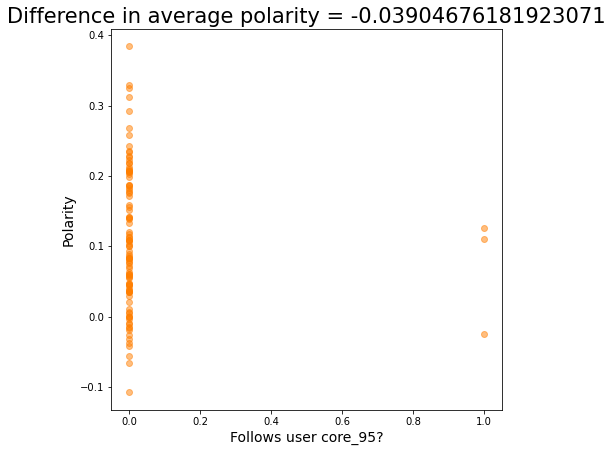

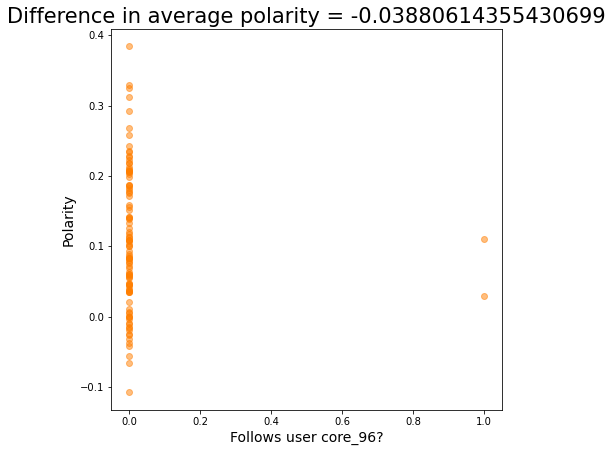

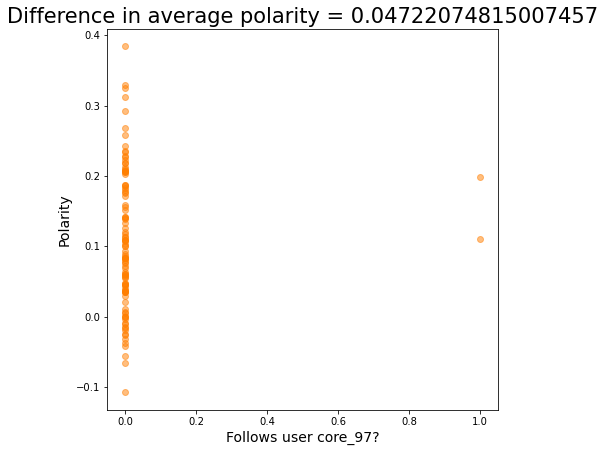

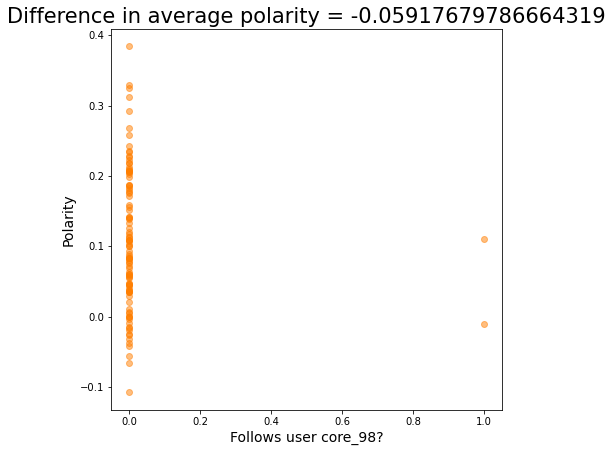

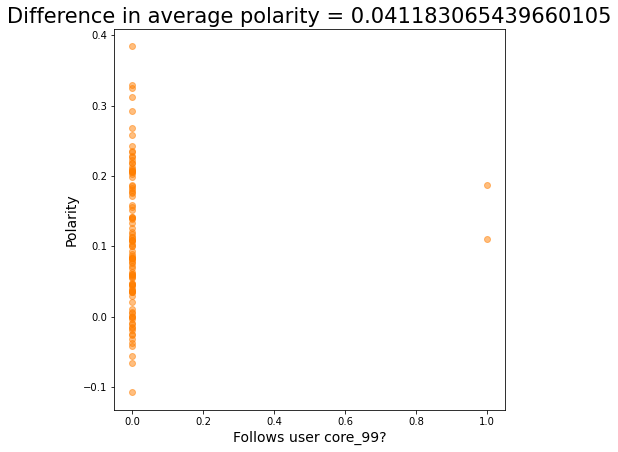

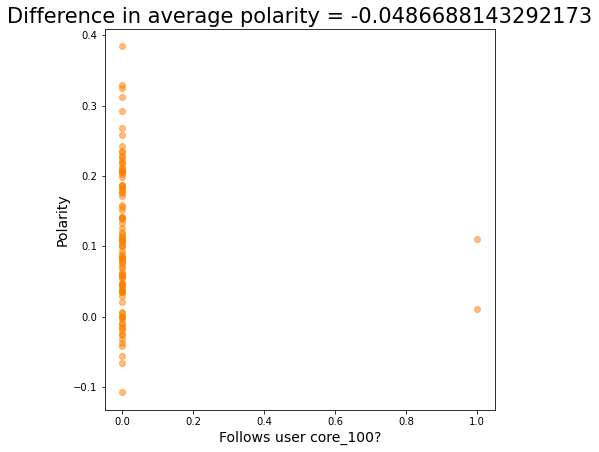

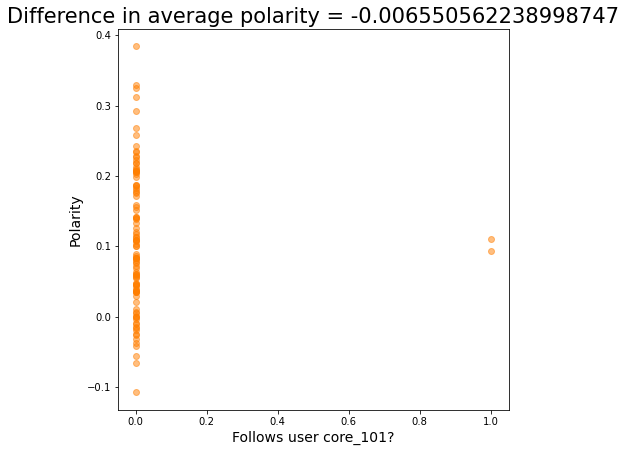

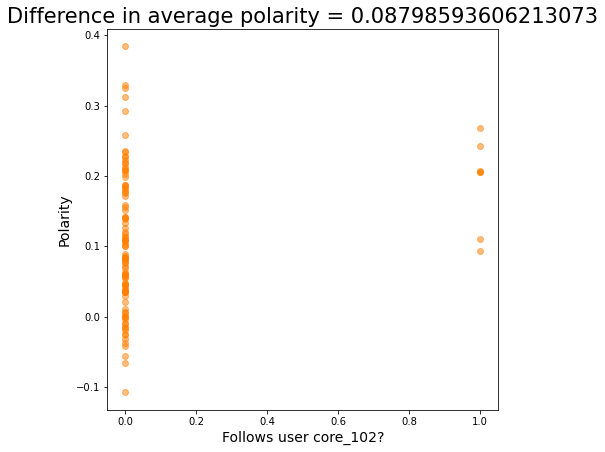

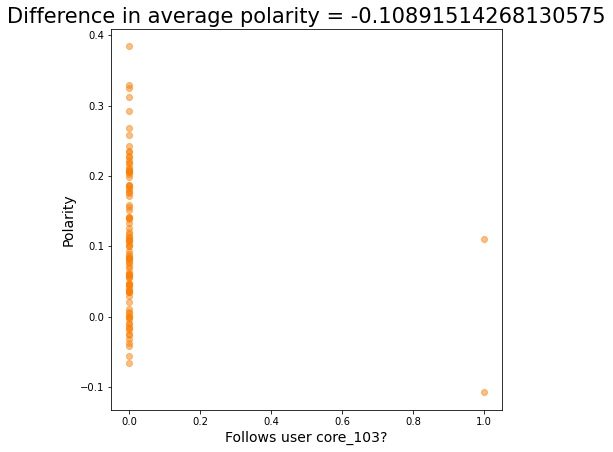

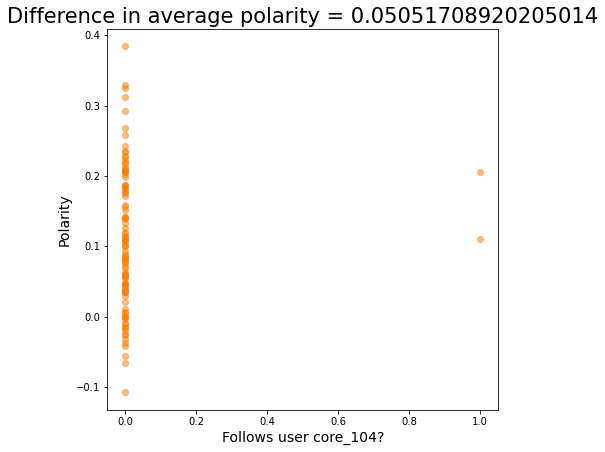

In [170]:
diaps = []
for core in data.columns[1:106]:
    plt.figure(figsize=(7,7))
    plt.scatter(data[core], data['Average_polarity'], alpha=.5, color='#FF7F00')
    plt.xlabel('Follows user '+core+'?', fontsize=14)
    plt.ylabel('Polarity', fontsize=14)
    diap = list(np.mean(data.loc[data[core]==True, ['Average_polarity']])-np.mean(data.loc[data[core]==False, ['Average_polarity']]))[0]
    diaps.append(diap)
    plt.title('Difference in average polarity = '+str(diap), fontsize=21)
    plt.show()

In [171]:
fit = sm.OLS(data.Average_polarity, 
             sm.add_constant(data[data.columns[1:106]].astype(int))).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Average_polarity   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     1.095
Date:                Fri, 28 May 2021   Prob (F-statistic):              0.541
Time:                        18:03:03   Log-Likelihood:                 271.14
No. Observations:                 105   AIC:                            -340.3
Df Residuals:                       4   BIC:                            -72.23
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0181      0.358      0.050      0.962      -0.976       1.012
core_0        -0.1231      0.241     -0.512      0.636      -0.791       0.545
core_1         0.0969      0.323      0.301      0.779      -0.799       0.993
core_2         0.0271      0.158      0.172      0.872      -0.410       0.464
core_3        -0.0046      0.322     -0.014      0.989      -0.899       0.890
core_4        -0.0799      0.368     -0.217      0.839      -1.102       0.942
core_5         0.0561      0.303      0.185      0.862      -0.786       0.898
core_6        -0.0303      0.275     -0.110      0.917      -0.792       0.732
core_7        -0.1196      0.274     -0.436      0.686      -0.882       0.643
core_8         0.2204      0.336      0.656      0.548      -0.713       1.154
core_9         0.0739      0.184      0.402      0.708      -0.436       0.584
core_10        0.1211      0.177      0.684      0.532      -0.370       0.613
core_11       -0.0941      0.455     -0.207      0.846      -1.357       1.169
core_12       -0.0091      0.133     -0.069      0.949      -0.377       0.359
core_13       -0.2293      0.429     -0.535      0.621      -1.420       0.961
core_14        0.0270      0.407      0.066      0.950      -1.103       1.157
core_15        0.0834      0.429      0.194      0.855      -1.108       1.275
core_16        0.0262      0.407      0.064      0.952      -1.104       1.156
core_17       -0.0374      0.133     -0.282      0.792      -0.405       0.331
core_18        0.0699      1.428      0.049      0.963      -3.894       4.033
core_19       -0.0090      0.407     -0.022      0.983      -1.139       1.121
core_20        0.1840      0.407      0.452      0.674      -0.945       1.313
core_21       -0.0502      0.133     -0.379      0.724      -0.418       0.318
core_22        0.0846      0.425      0.199      0.852      -1.097       1.266
core_23        0.1630      0.343      0.475      0.659      -0.789       1.115
core_24       -0.0613      0.098     -0.622      0.567      -0.335       0.212
core_25       -0.0341      0.308     -0.110      0.917      -0.890       0.822
core_26       -0.0412      0.098     -0.418      0.697      -0.315       0.232
core_27       -0.0171      0.043     -0.402      0.708      -0.135       0.101
core_28       -0.0638      0.311     -0.205      0.847      -0.927       0.799
core_29        0.0237      0.239      0.099      0.926      -0.641       0.688
core_30       -0.0170      0.211     -0.081      0.940      -0.603       0.569
core_31        0.1783      0.173      1.032      0.360      -0.301       0.658
core_32        0.1306      0.098      1.326      0.255      -0.143       0.404
core_33       -0.0171      0.043     -0.402      0.708      -0.135       0.101
core_34        0.2597      1.725      0.151      0.888      -4.531       5.050
co

In [172]:
diaps = np.array(diaps).flatten()
diabz = np.abs(diaps-diaps.mean())/diaps.std()
featusers = diabz>=2.3
featusers = [i+1 for i in range(len(featusers)) if featusers[i]]
featusers = data.columns[featusers]

In [173]:
fit = sm.OLS(data.Average_polarity, 
             sm.add_constant(data[featusers].astype(int))).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Average_polarity   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     8.351
Date:                Fri, 28 May 2021   Prob (F-statistic):           0.000438
Time:                        18:03:03   Log-Likelihood:                 103.46
No. Observations:                 105   AIC:                            -200.9
Df Residuals:                     102   BIC:                            -193.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1000      0.009     10.907      0.000       0.082       0.118
core_8         0.1802      0.065      2.753      0.007       0.050       0.310
core_71        0.1657      0.054      3.086      0.003       0.059       0.272
==============================================================================
Omnibus:                        2.115   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                2.006
Skew:                           0.254   Prob(JB):                        0.367
Kurtosis:                       2.553   Cond. No.                         7.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Tomi data

In [164]:
data = pd.read_csv('Tomi_cross_core.csv')
data

user  core_0  core_1  core_2  core_3  core_4  core_5  \
0             468646961   False    True    True   False   False   False   
1              36432879    True   False    True    True    True    True   
2             599767159   False    True   False   False   False   False   
3            1003398199   False    True   False   False   False   False   
4    707246777515245572    True    True   False   False   False   False   
..                  ...     ...     ...     ...     ...     ...     ...   
106           280339608   False   False   False   False   False   False   
107          2272305950   False   False   False   False   False   False   
108          2268158728   False   False   False   False   False   False   
109            24880132   False   False   False   False   False   False   
110            30721022   False   False   False   False   False   False   

     core_6  core_7  core_8  ...  core_102  core_103  core_104  core_105  \
0     False   False   False  ...     False     False     False     False   
1      True    True    True  ...     False     False     False     False   
2     False   False   False  ...     False     False     False     False   
3     False   False   False  ...     False     False     False     False   
4     False   False   False  ...     False     False     False     False   
..      ...     ...     ...  ...       ...       ...       ...       ...   
106   False   False   False  ...     False     False     False     False   
107   False   False   False  ...     False     False     False     False   
108   False   False   False  ...     False     False      True      True   
109   False   False   False  ...     False     False     False     False   
110   False   False   False  ...     False     False     False     False   

     core_106  core_107  core_108  core_109  core_110  Average_polarity  
0       False     False     False     False     False          0.041142  
1       False     False     False     False     False          0.074338  
2       False     False     False     False     False          0.160742  
3       False     False     False     False     False          0.195324  
4       False     False     False     False     False         -0.005822  
..        ...       ...       ...       ...       ...               ...  
106     False     False     False      True     False          0.012956  
107     False     False     False     False     False          0.091564  
108     False     False     False     False     False          0.145648  
109      True     False      True     False     False          0.061270  
110     False     False     False     False     False          0.103064  

[111 rows x 113 columns]

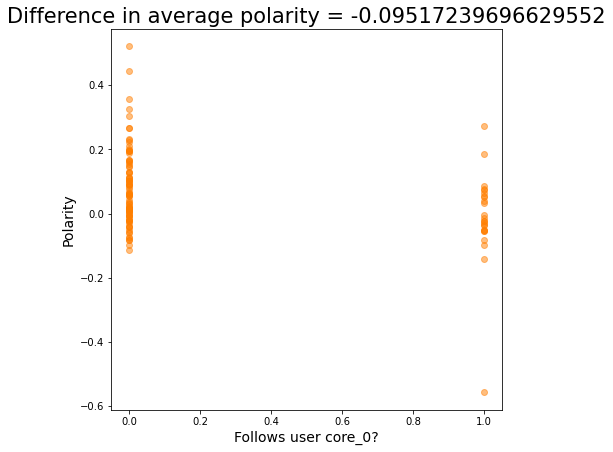

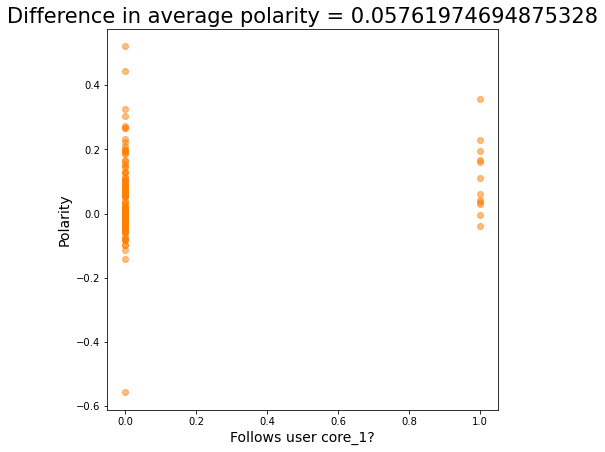

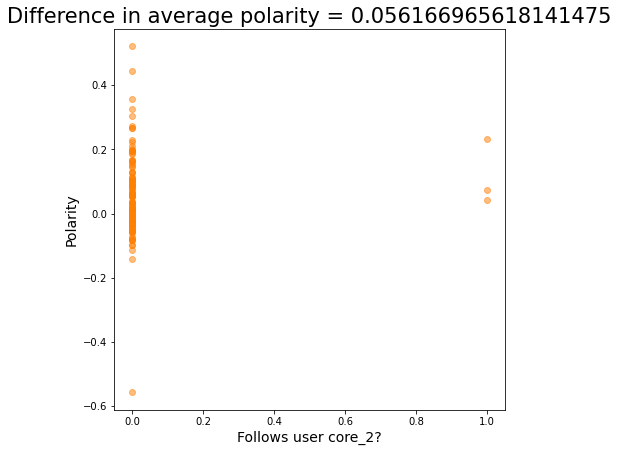

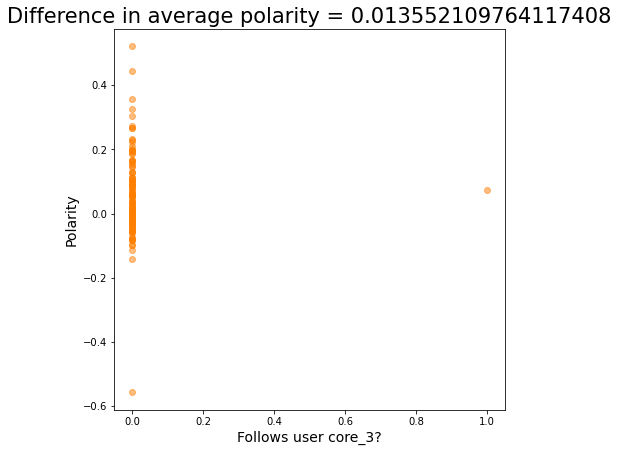

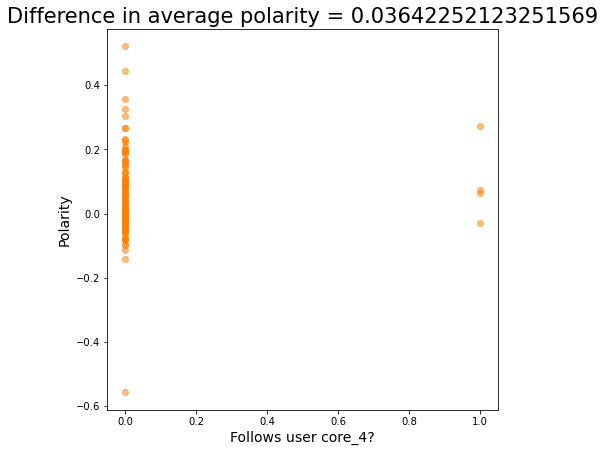

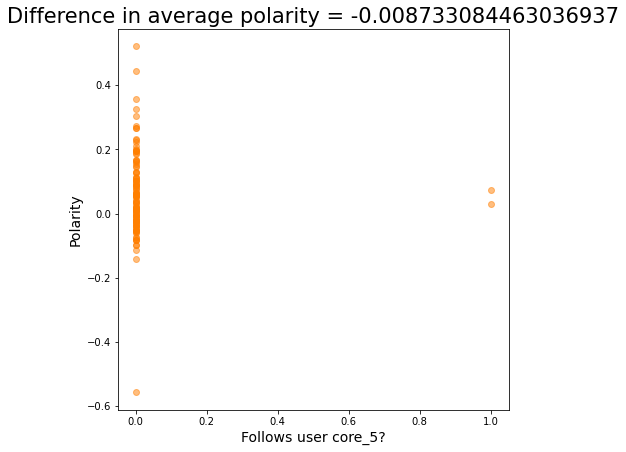

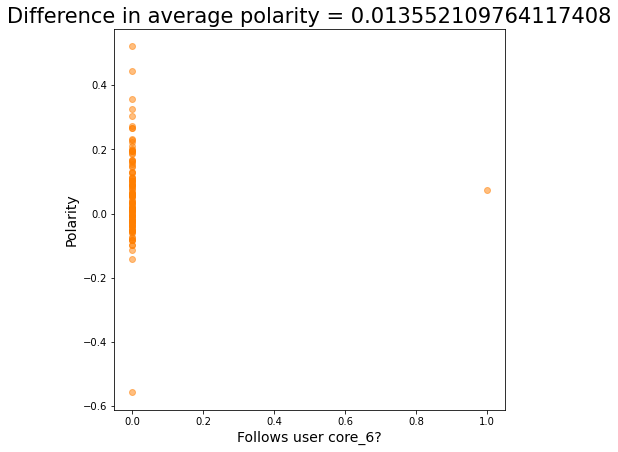

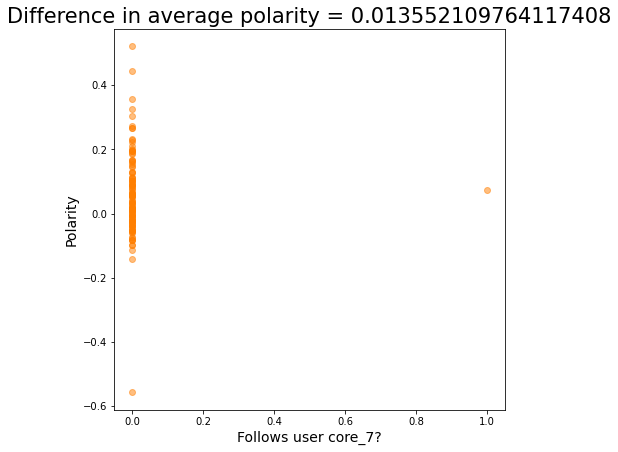

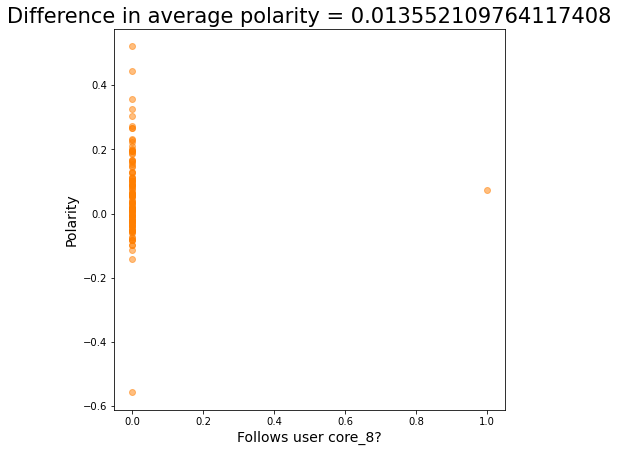

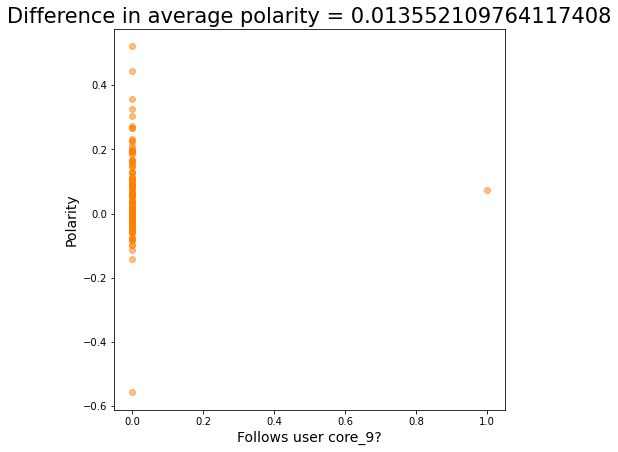

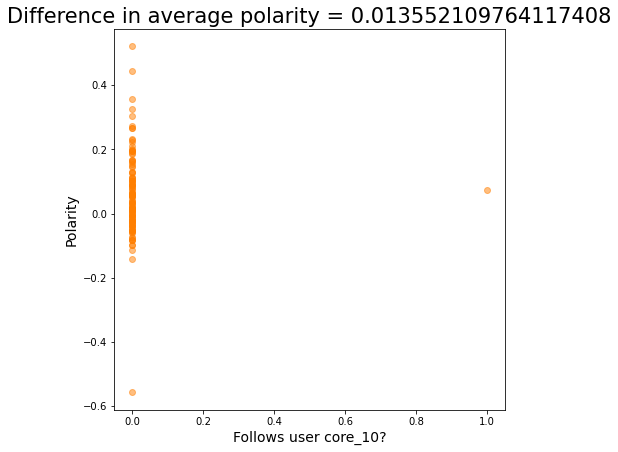

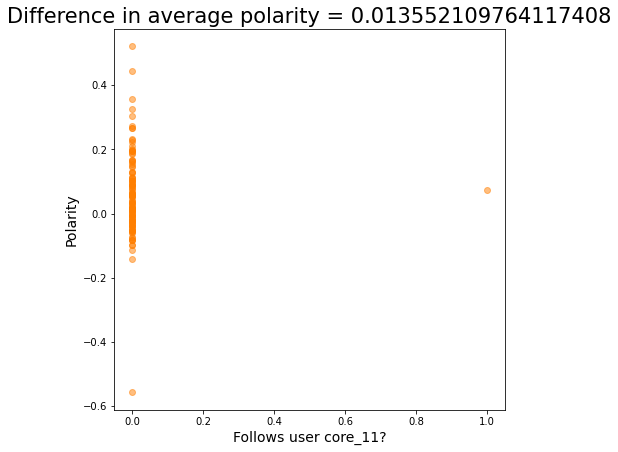

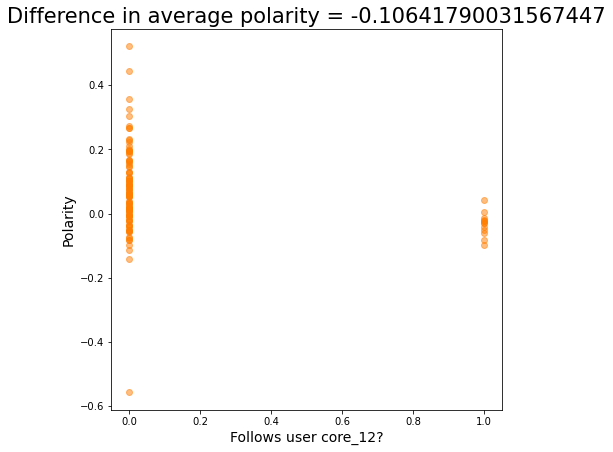

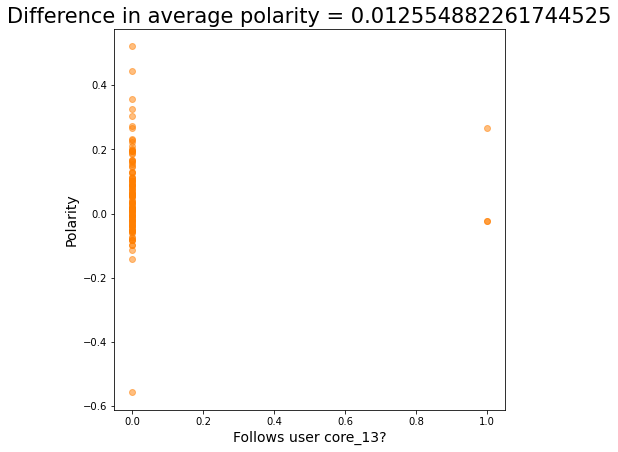

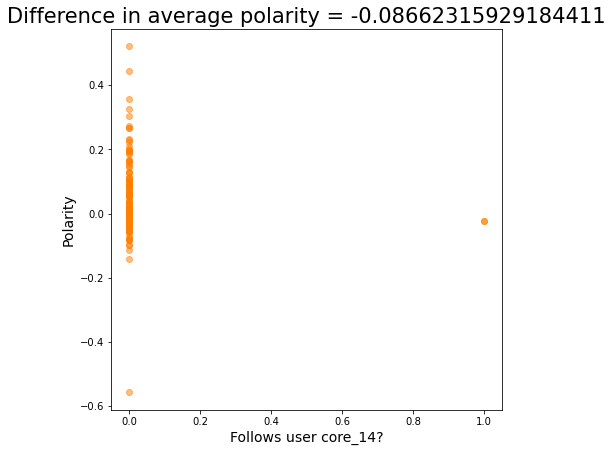

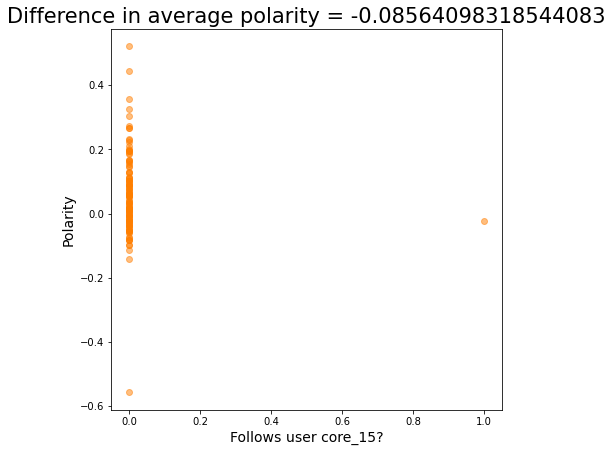

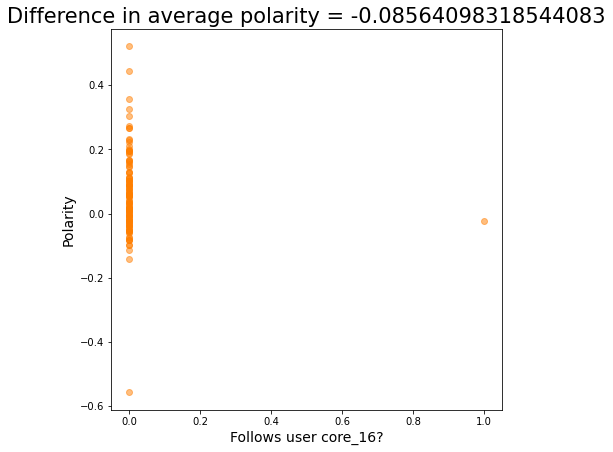

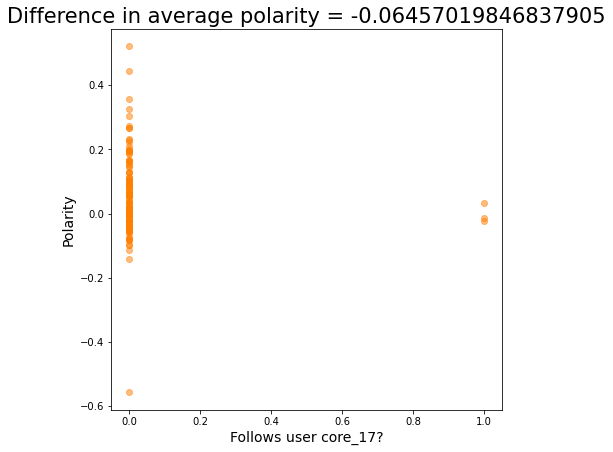

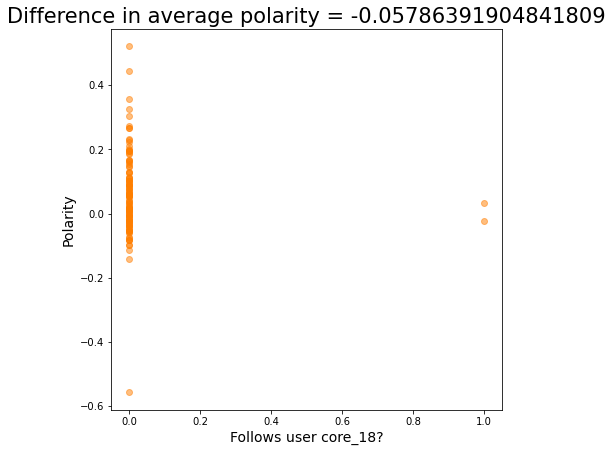

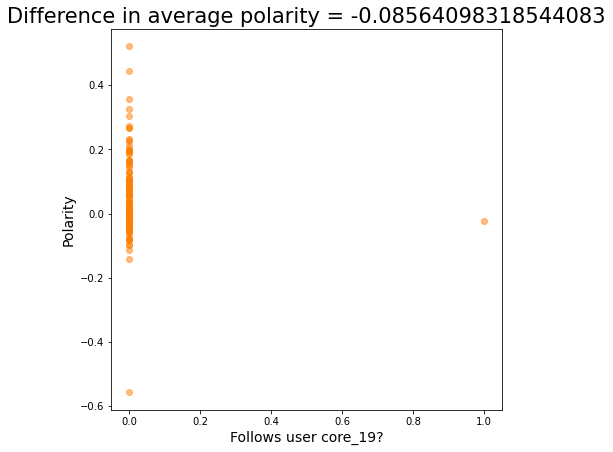

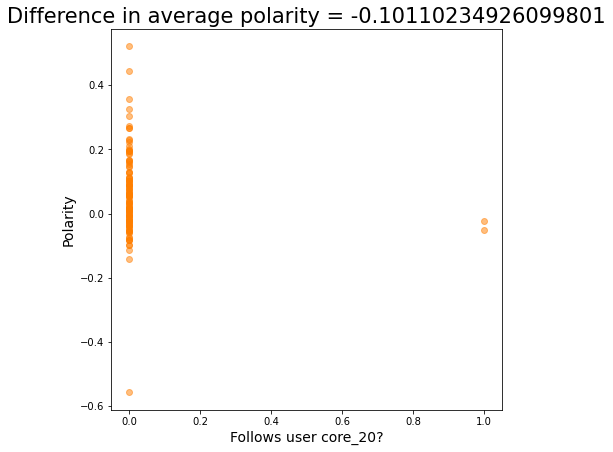

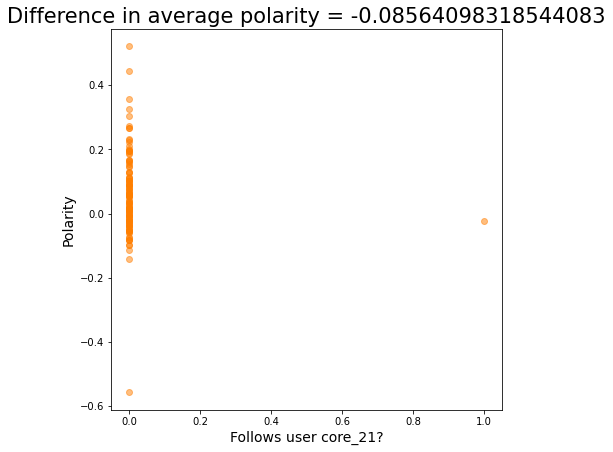

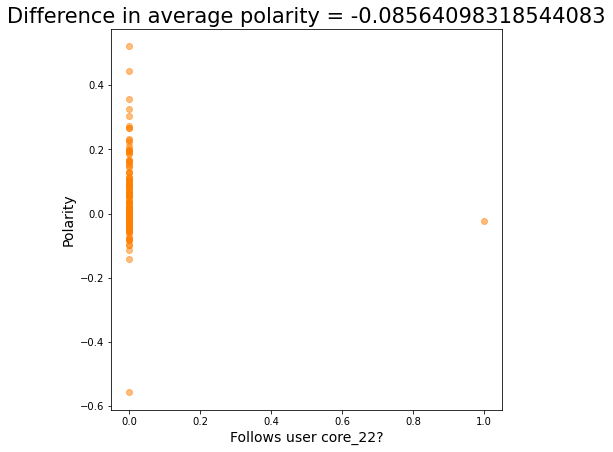

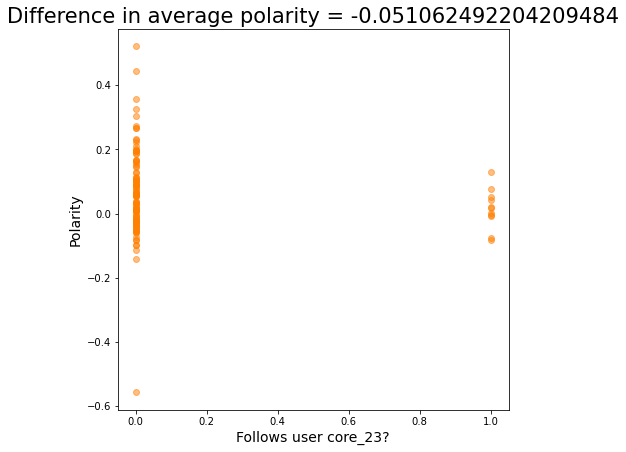

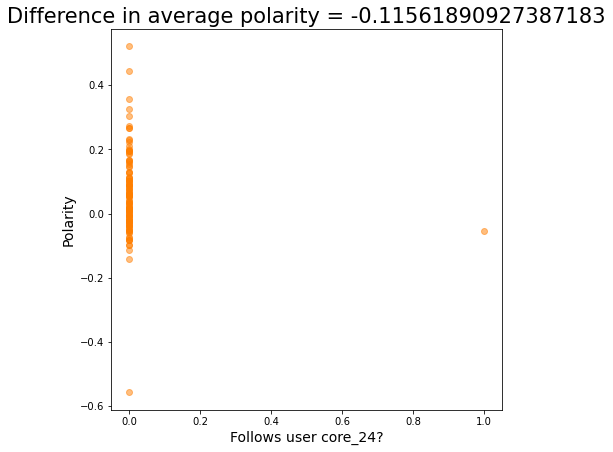

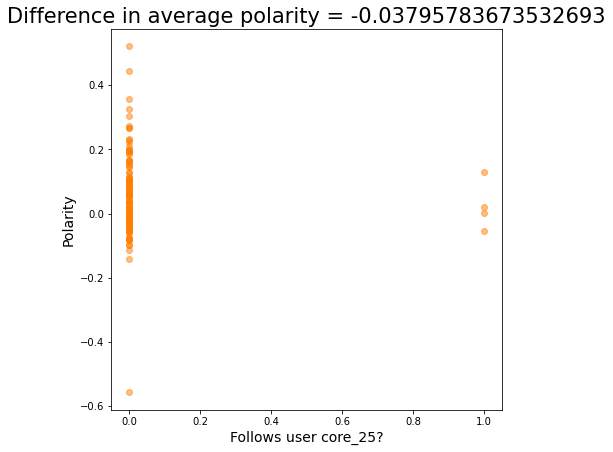

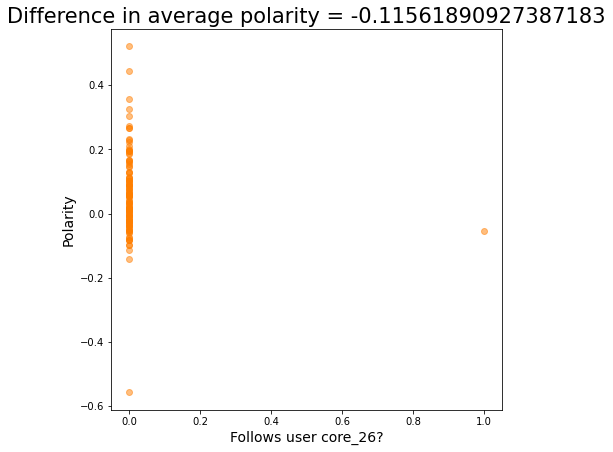

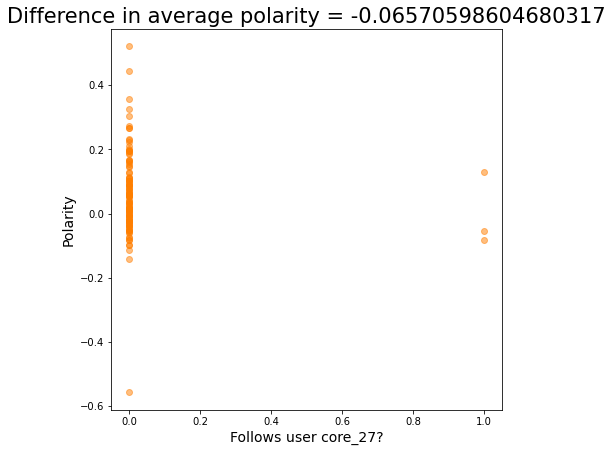

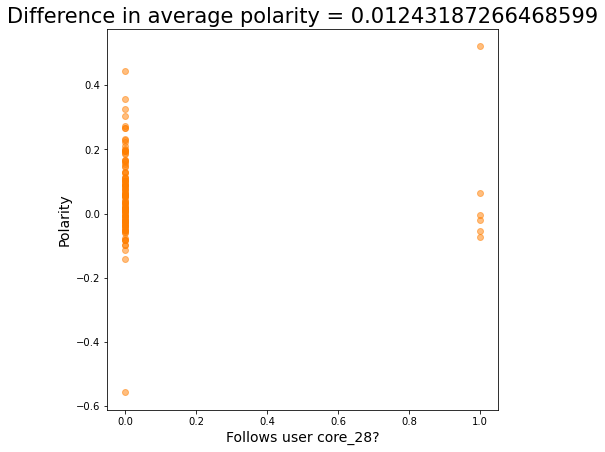

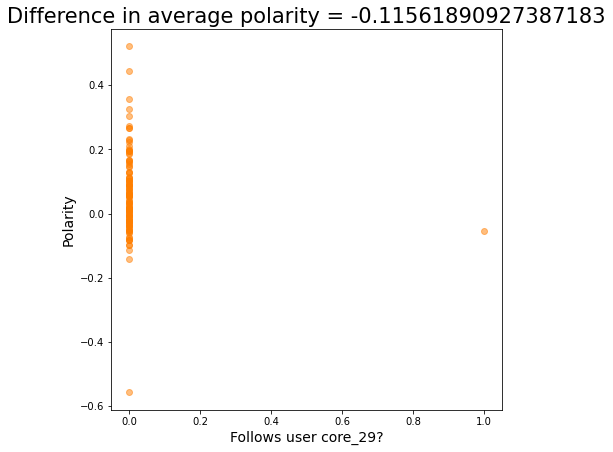

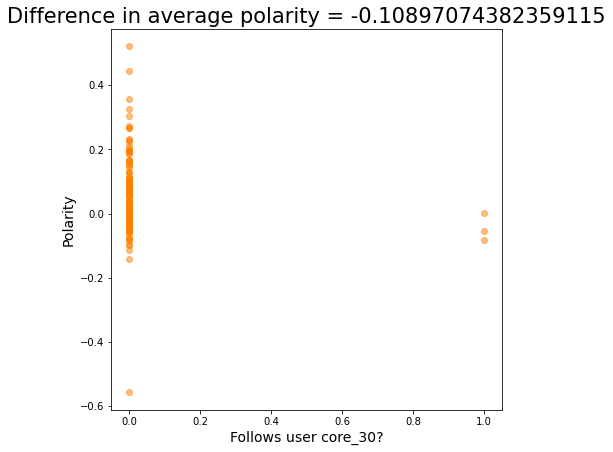

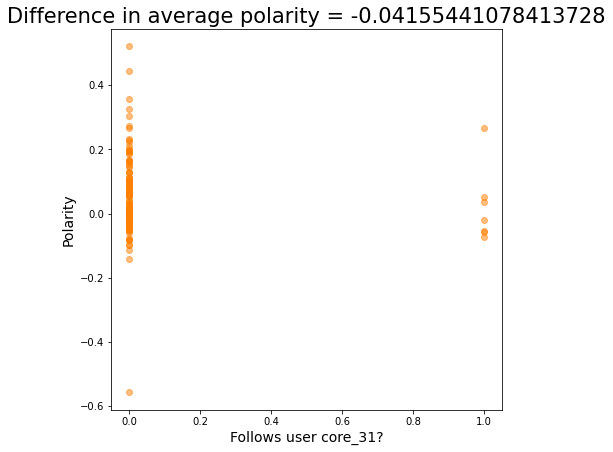

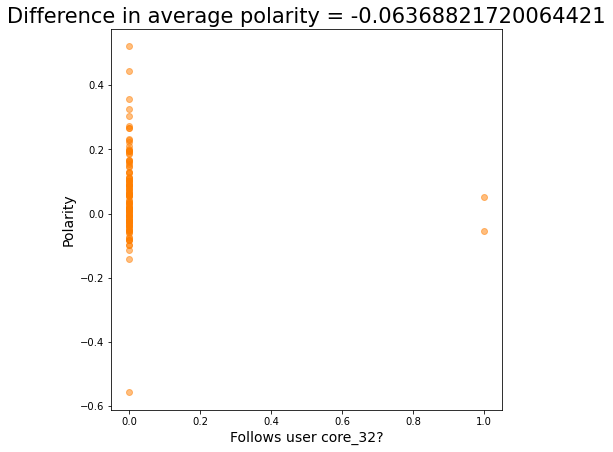

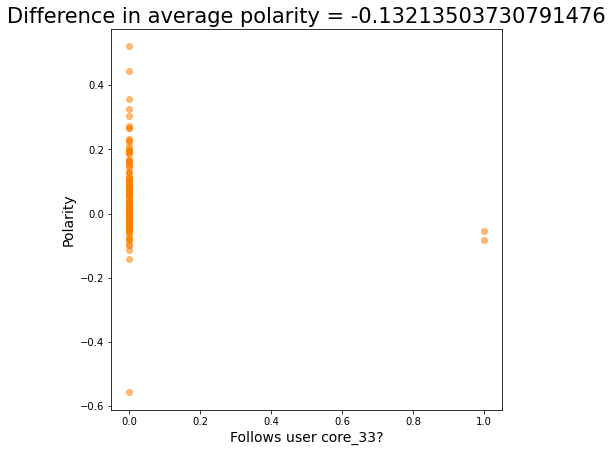

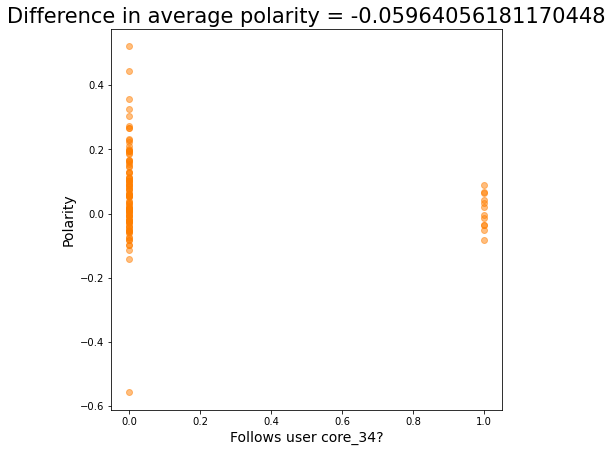

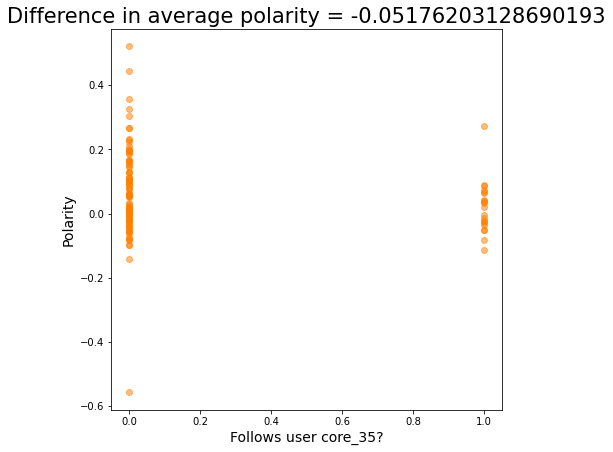

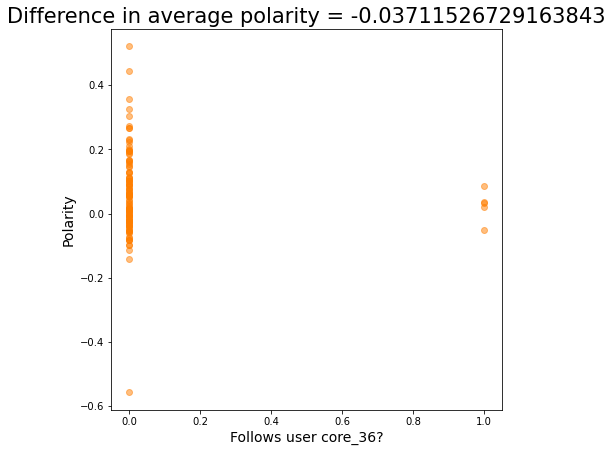

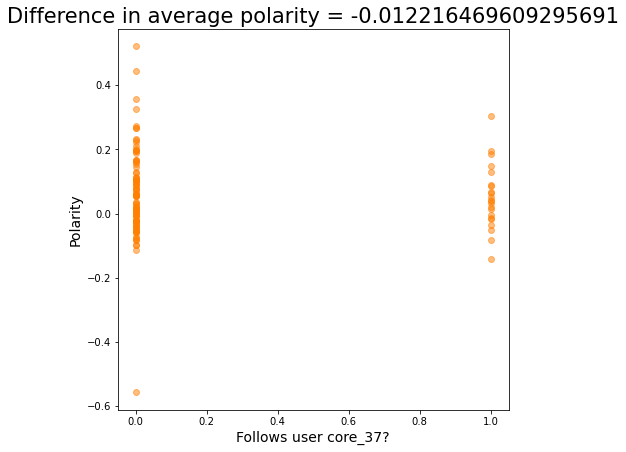

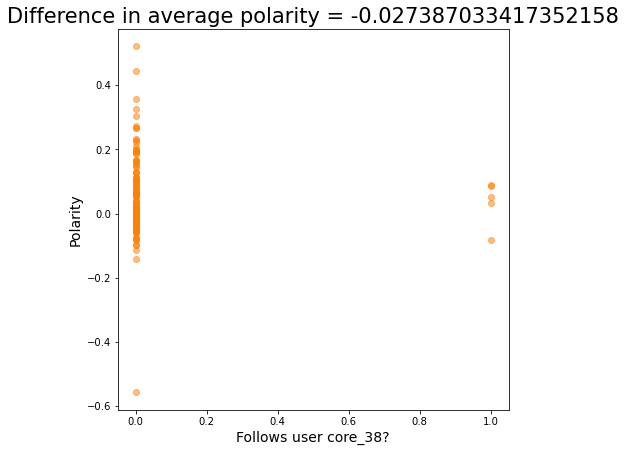

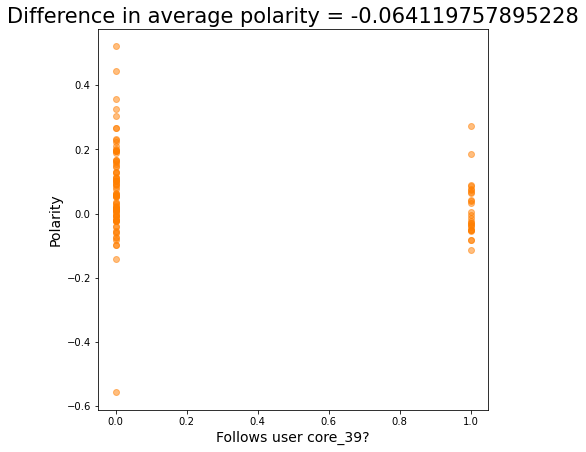

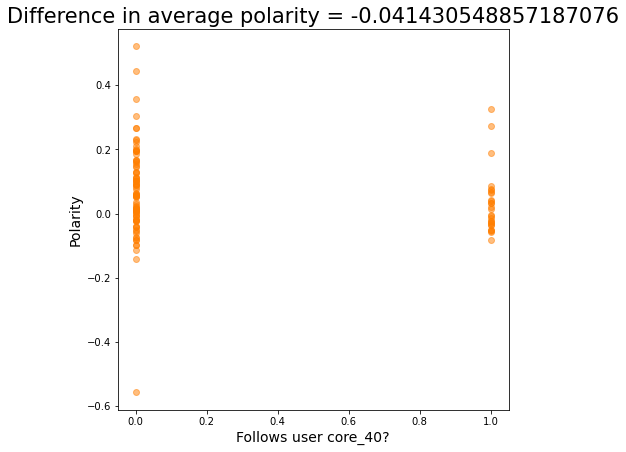

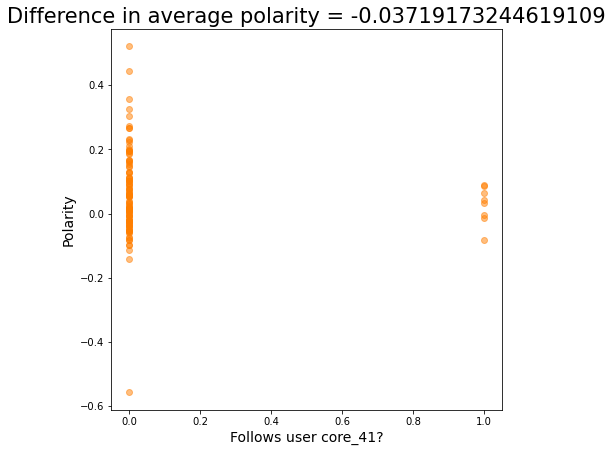

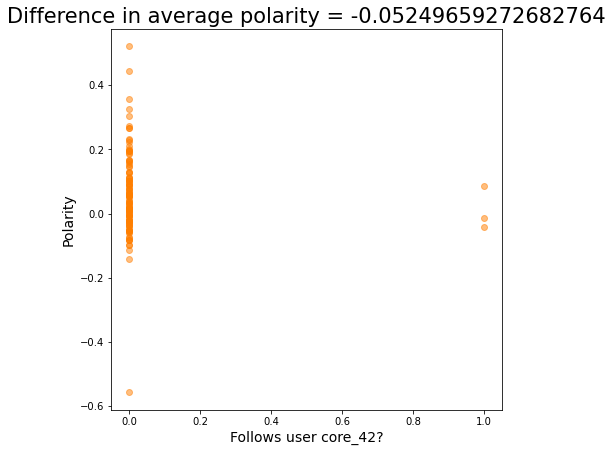

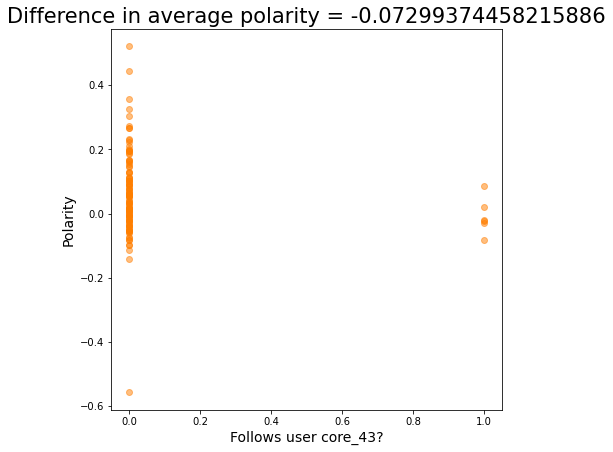

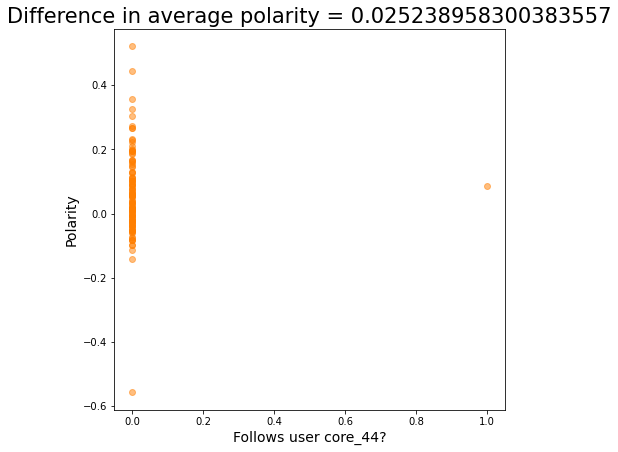

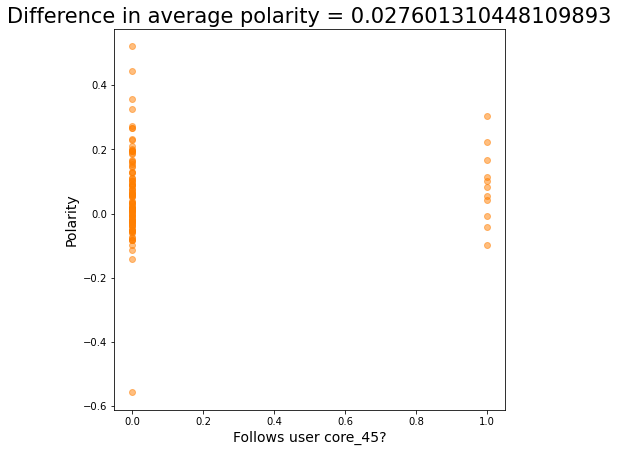

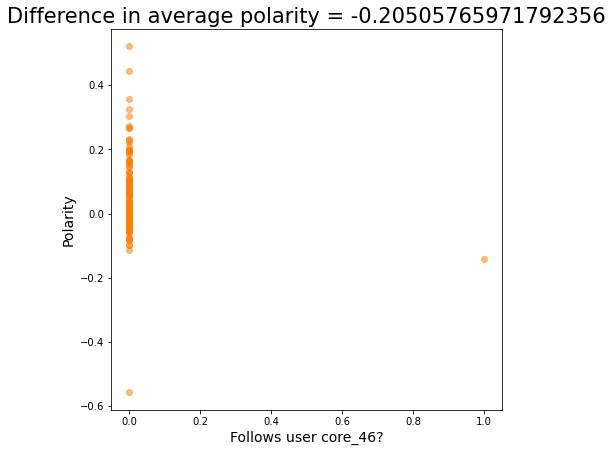

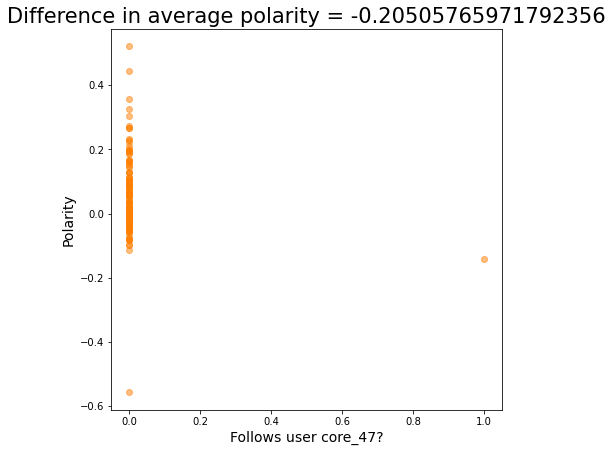

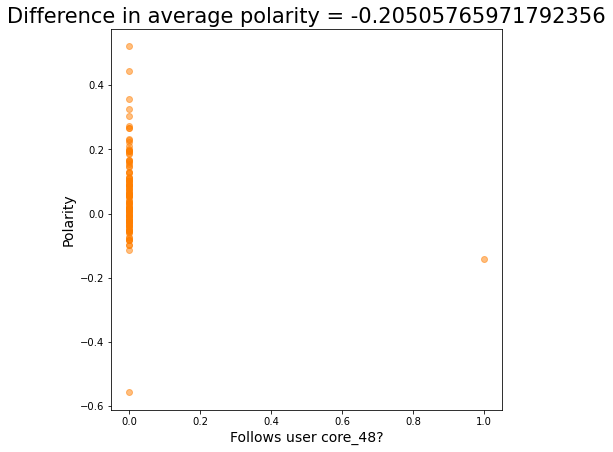

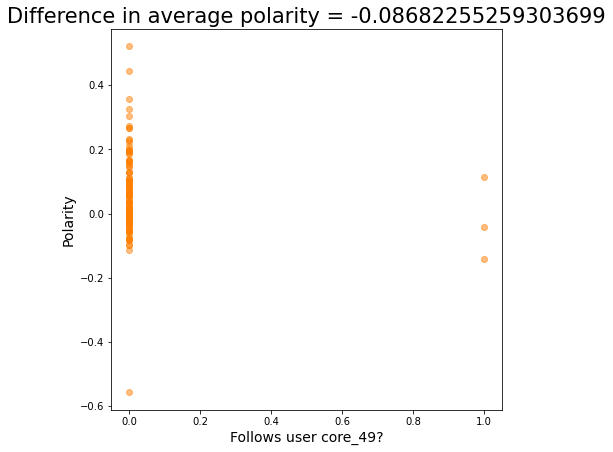

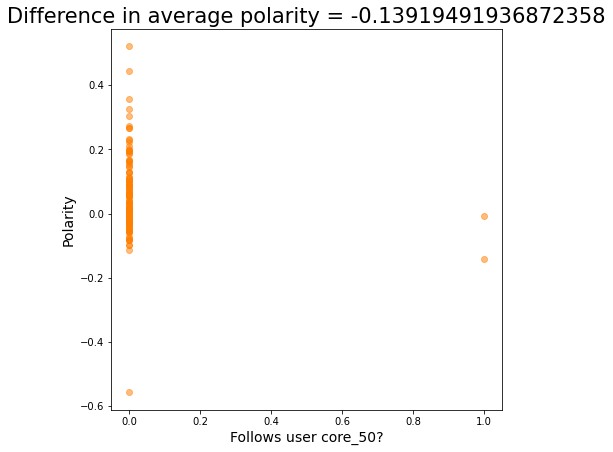

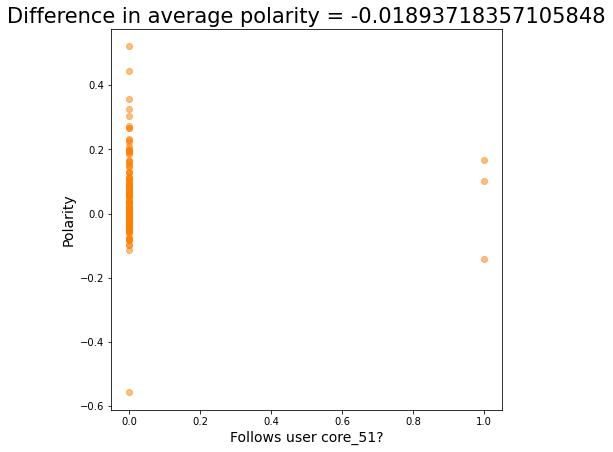

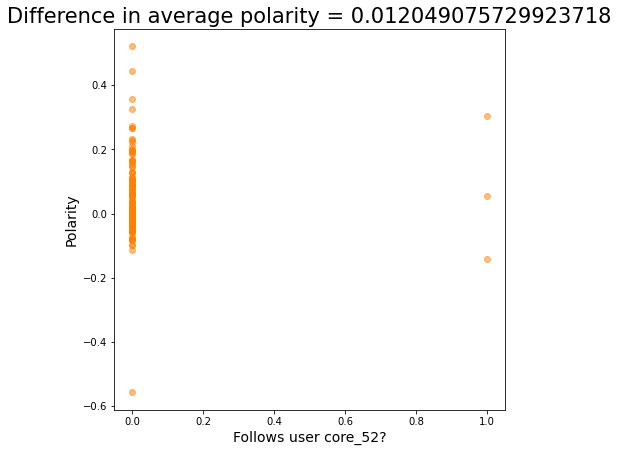

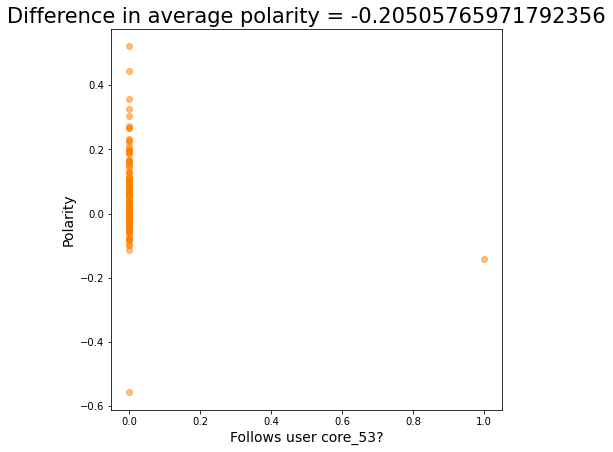

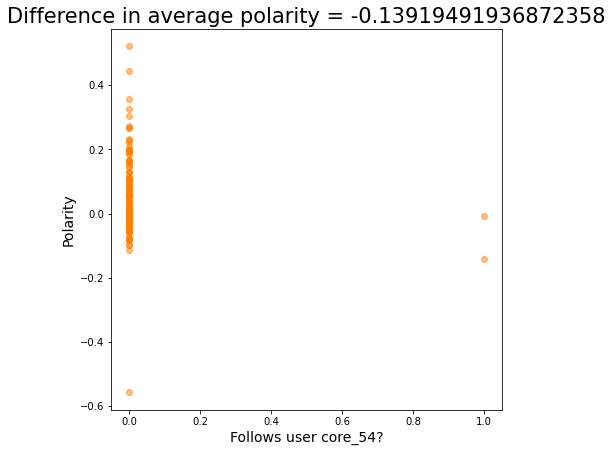

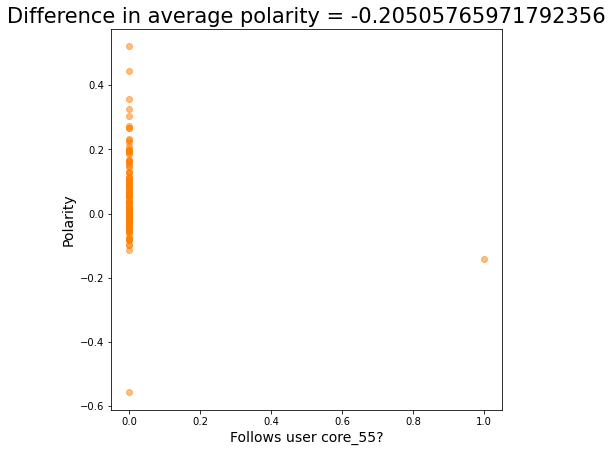

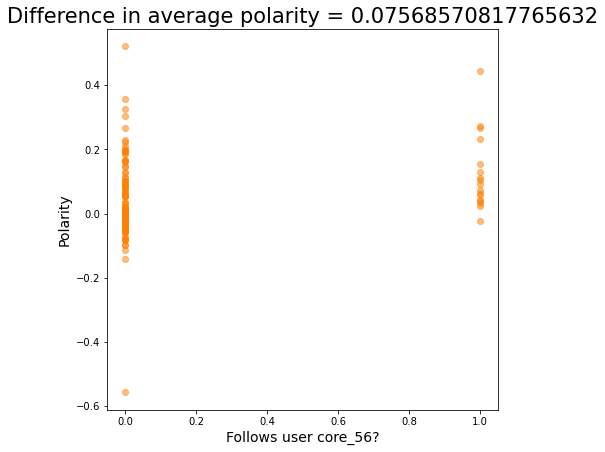

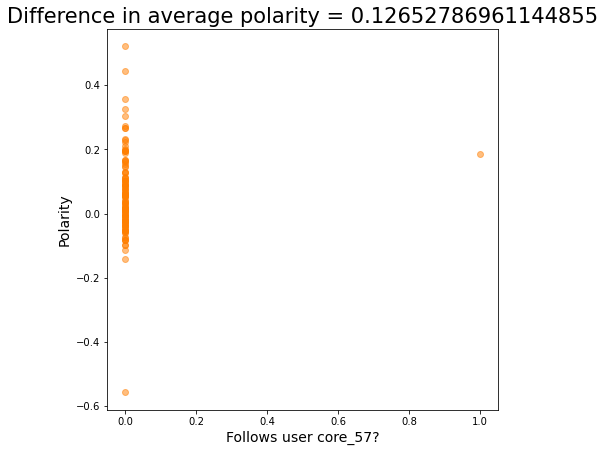

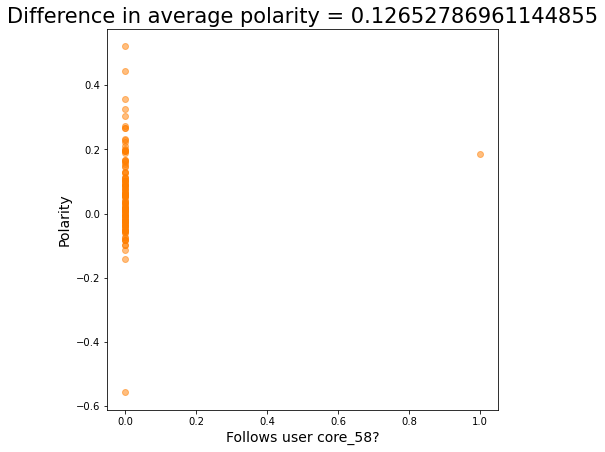

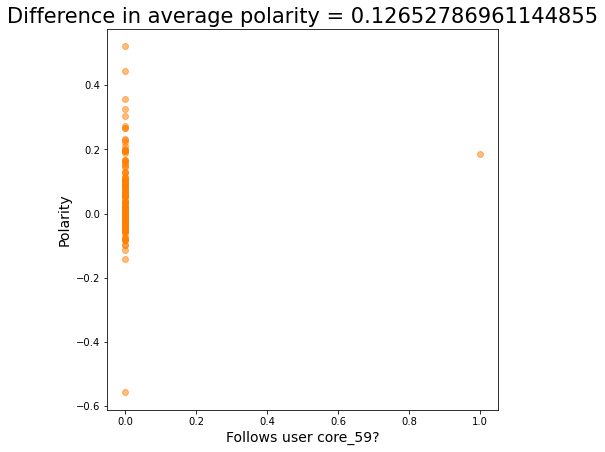

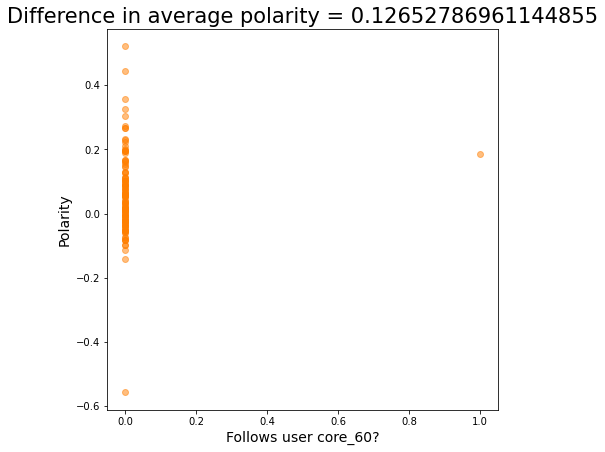

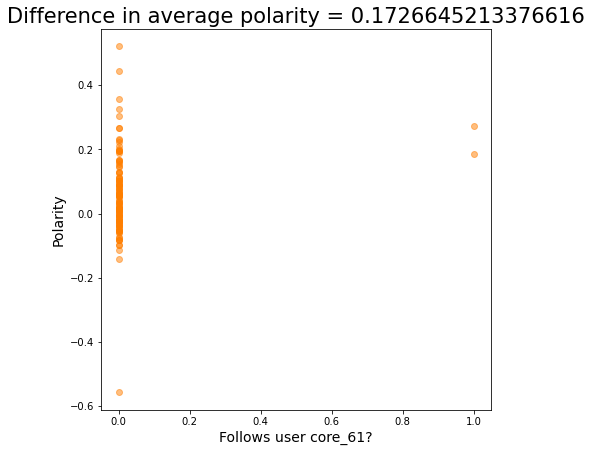

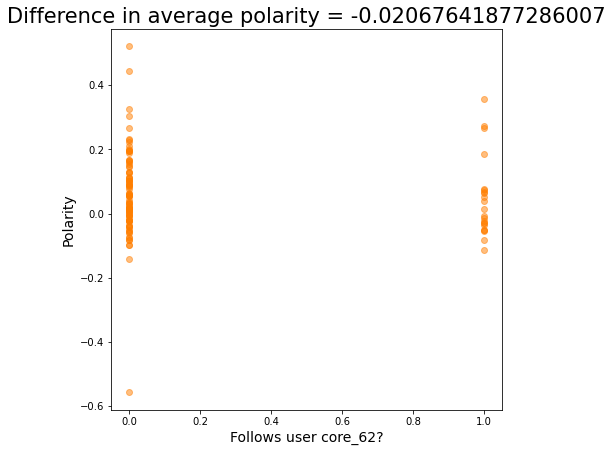

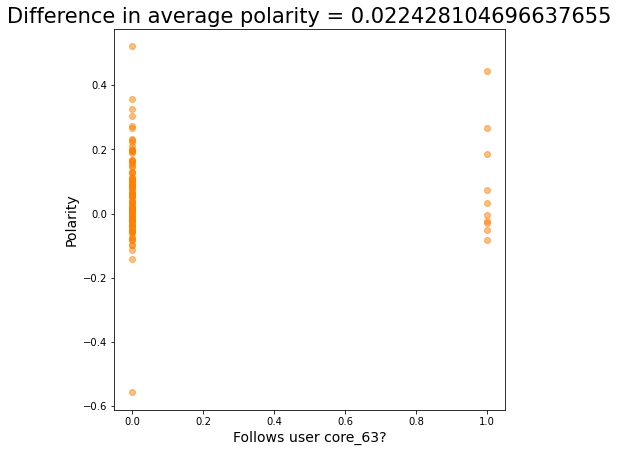

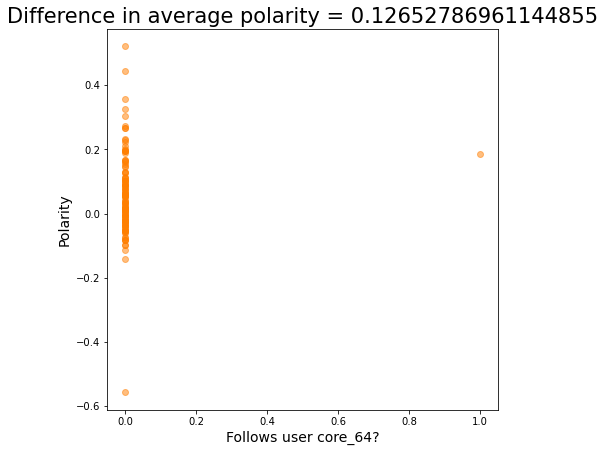

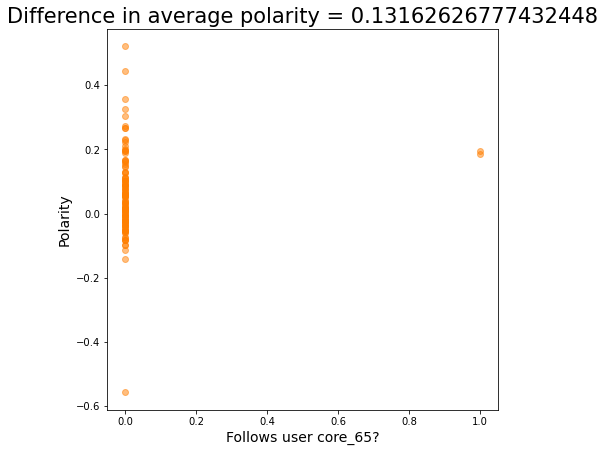

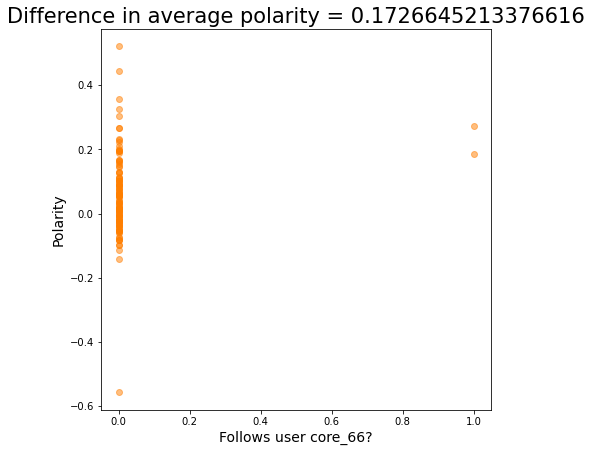

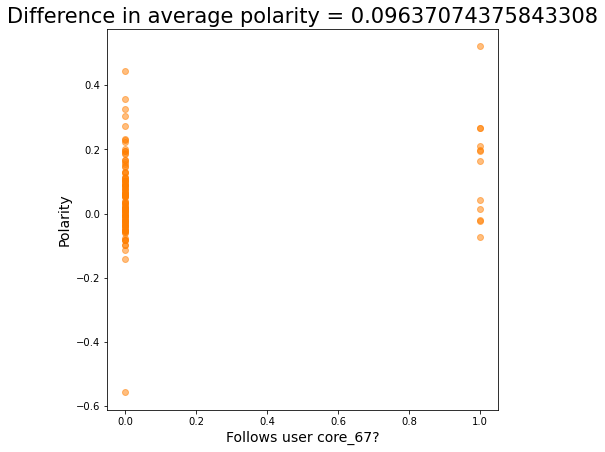

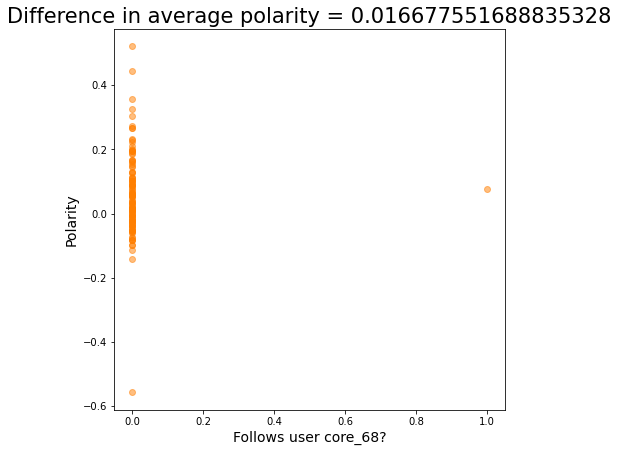

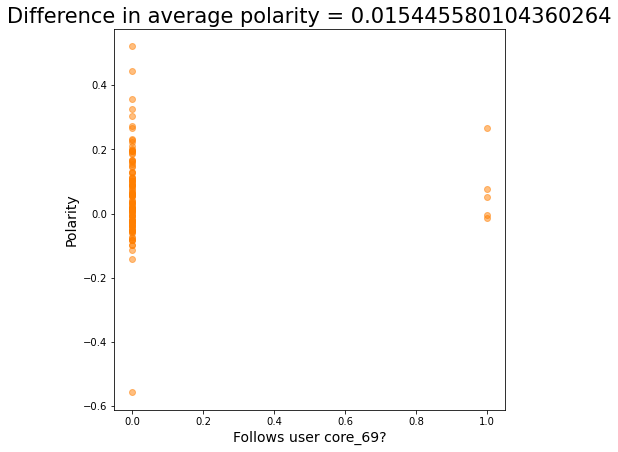

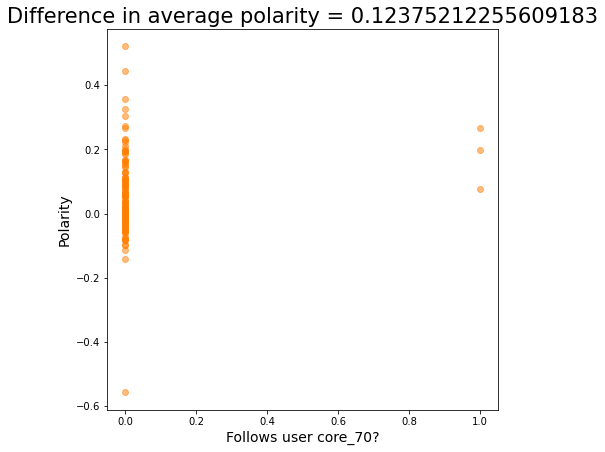

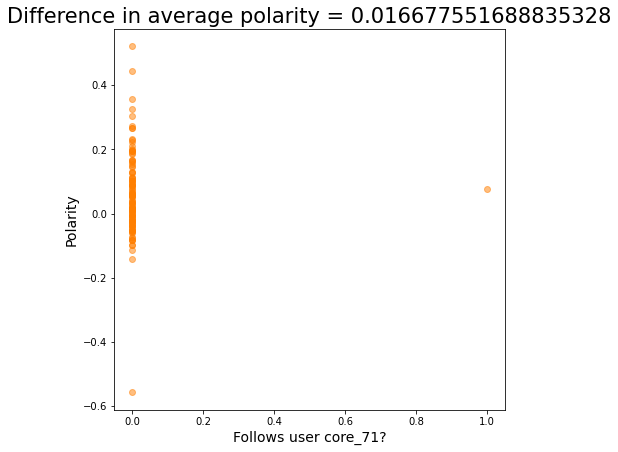

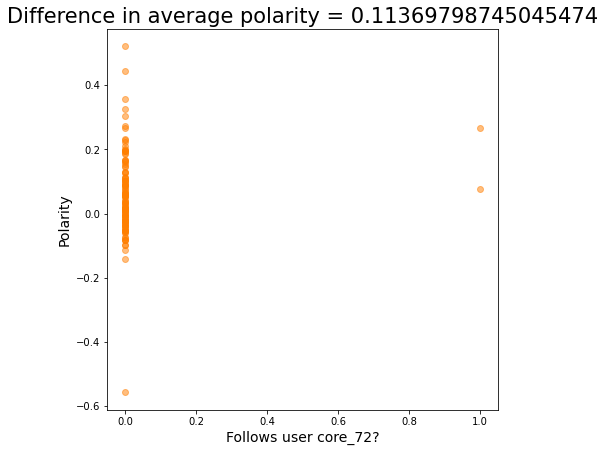

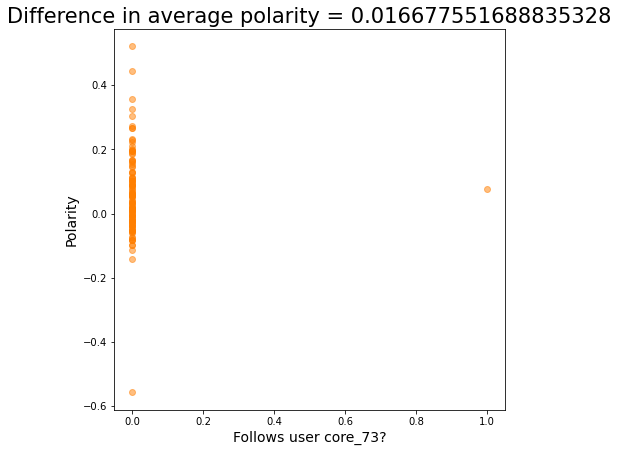

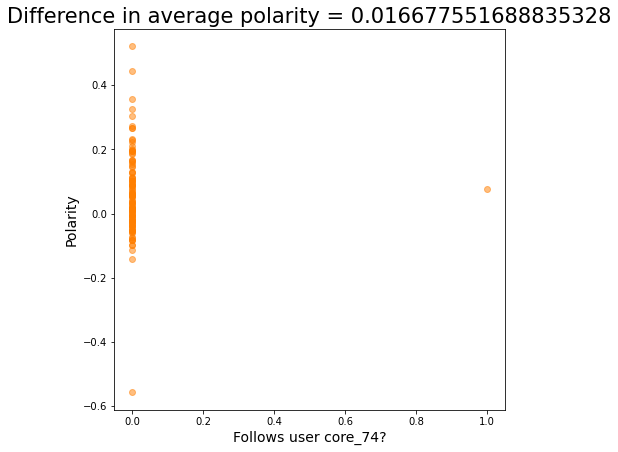

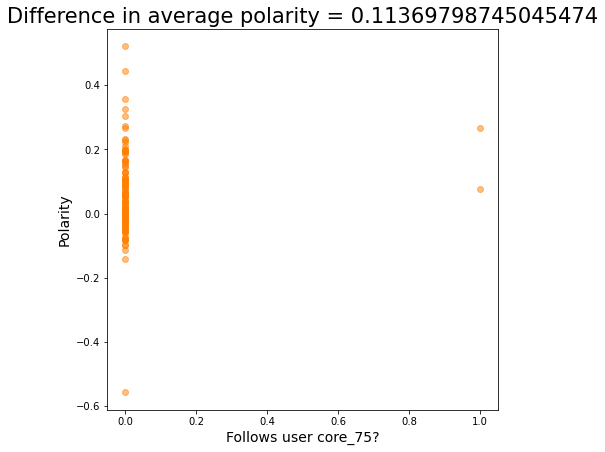

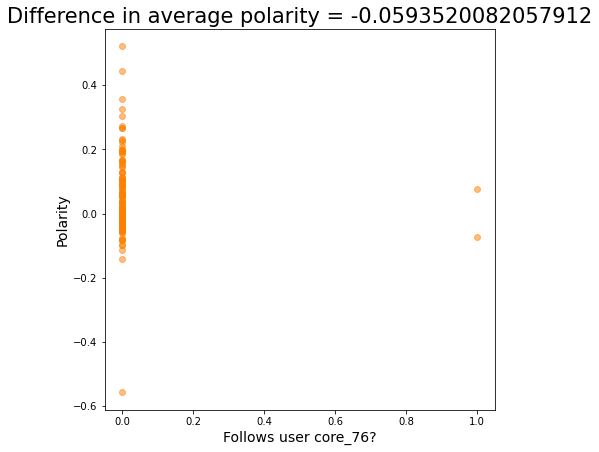

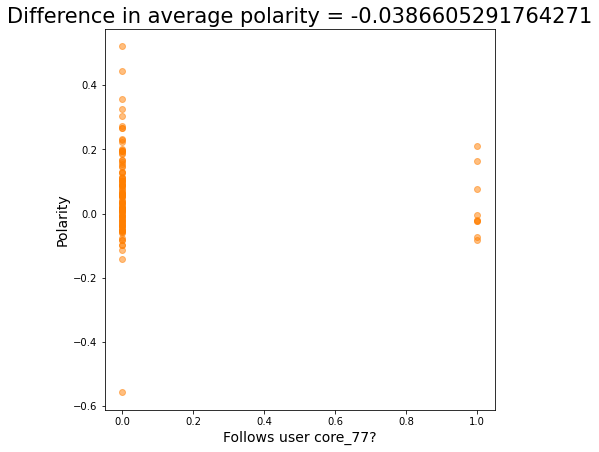

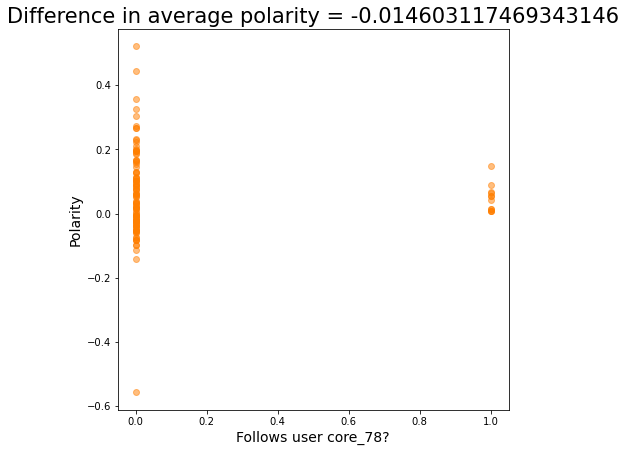

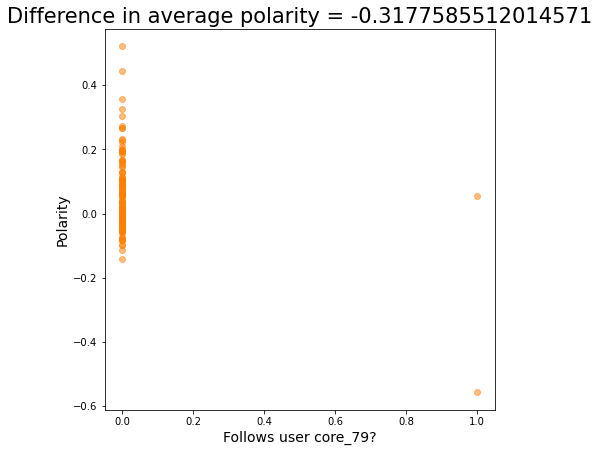

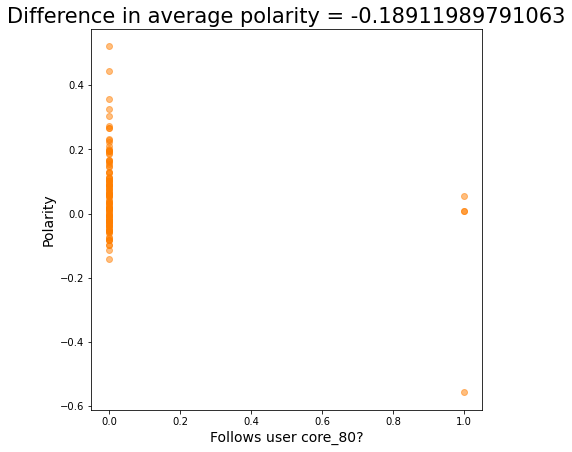

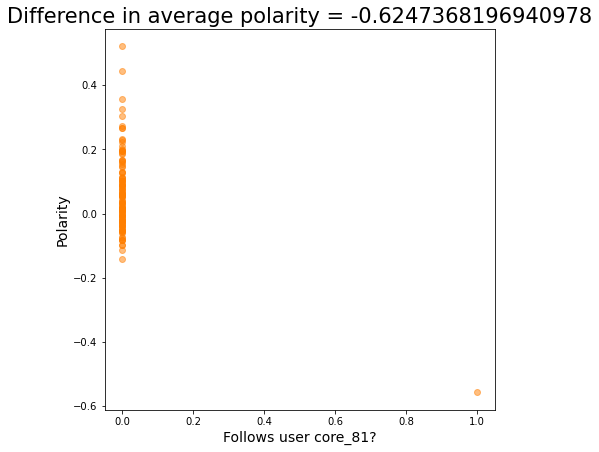

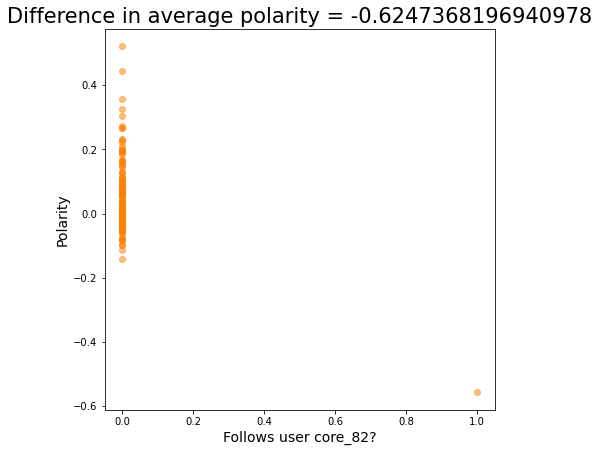

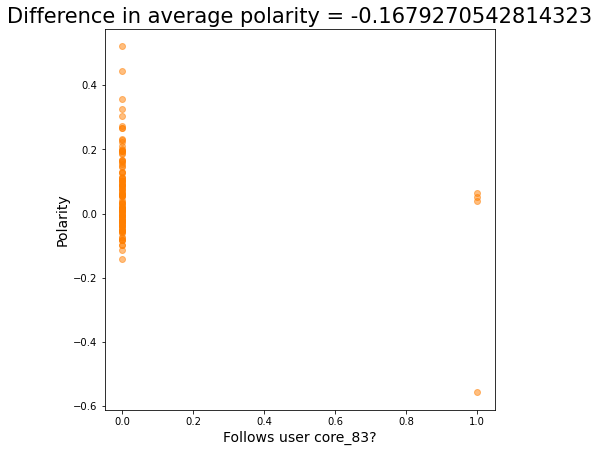

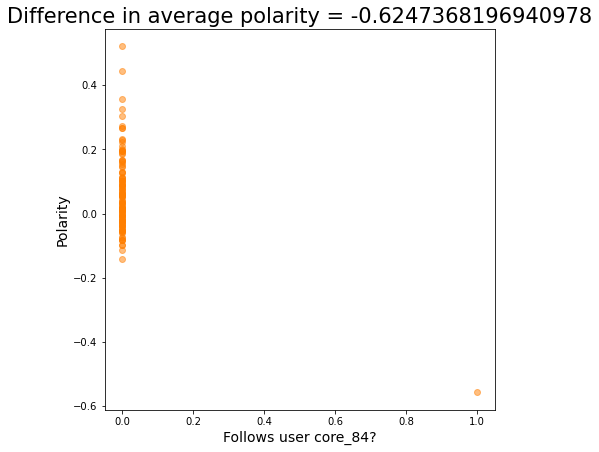

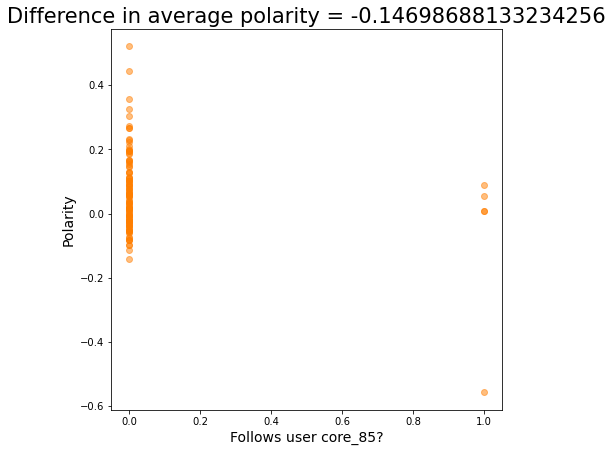

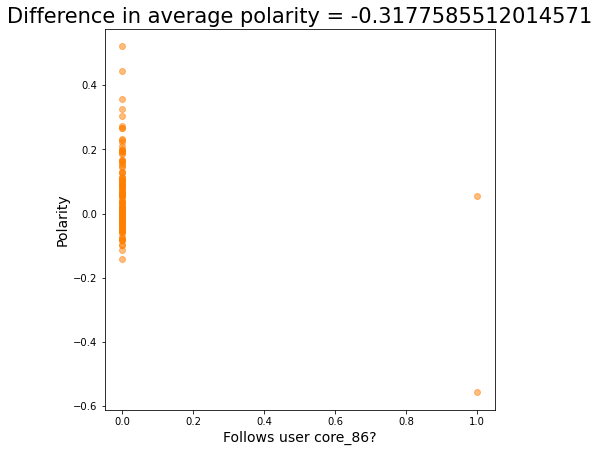

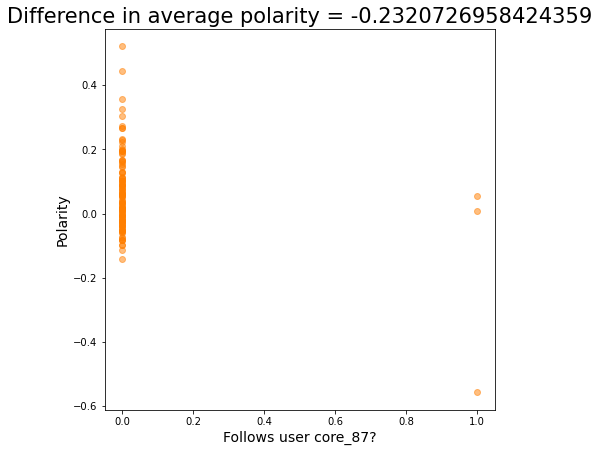

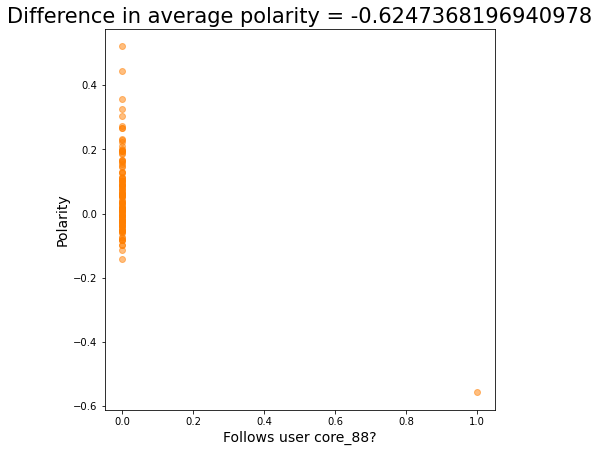

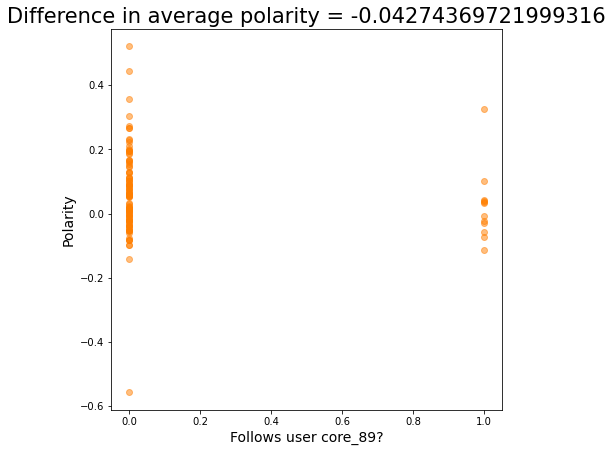

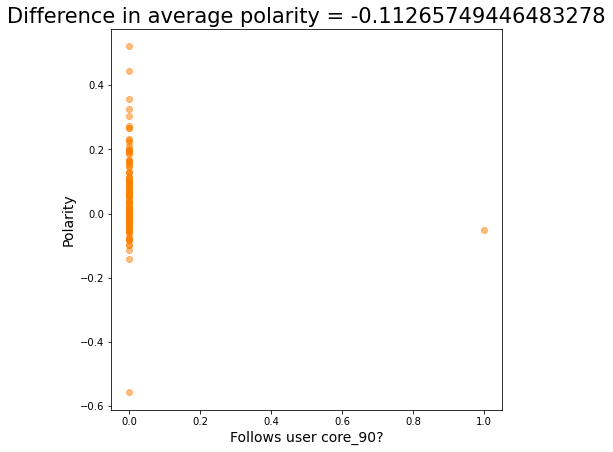

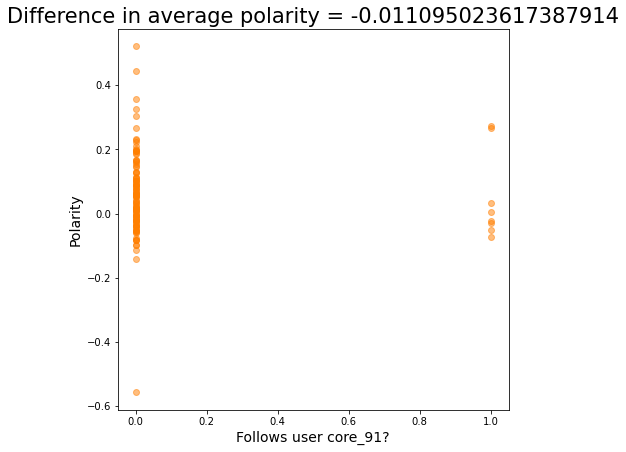

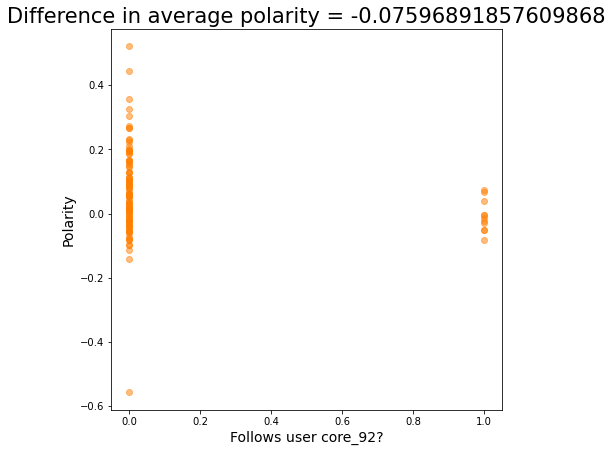

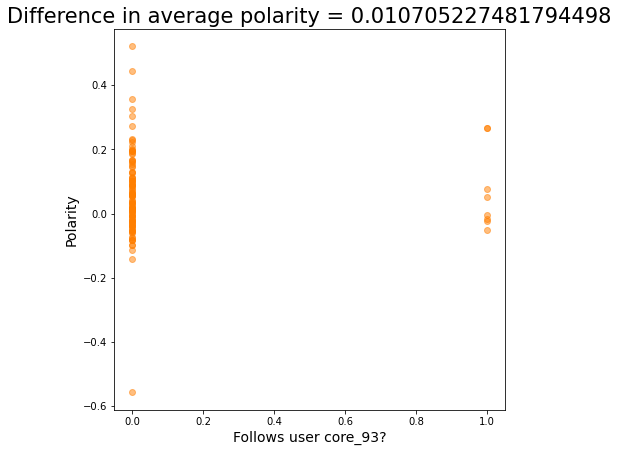

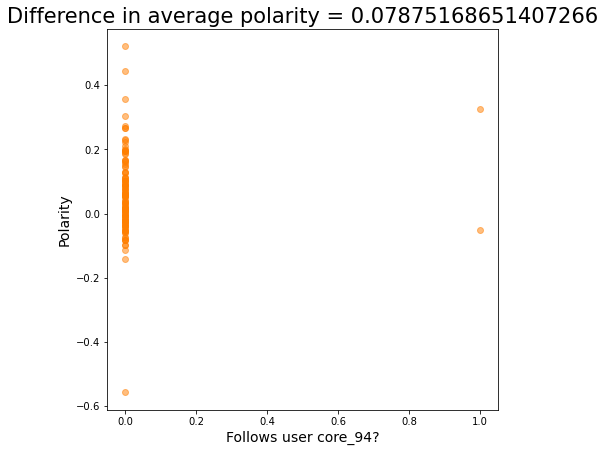

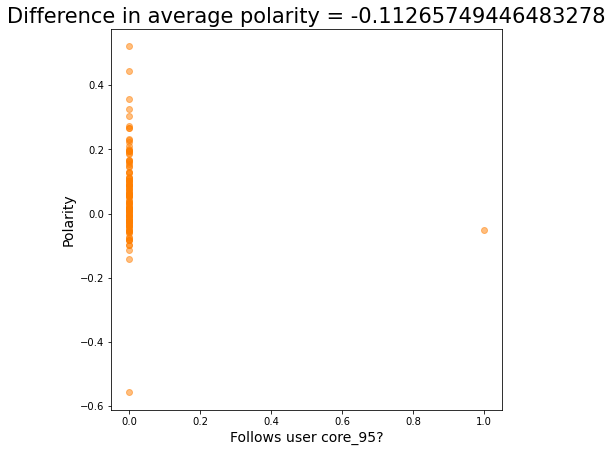

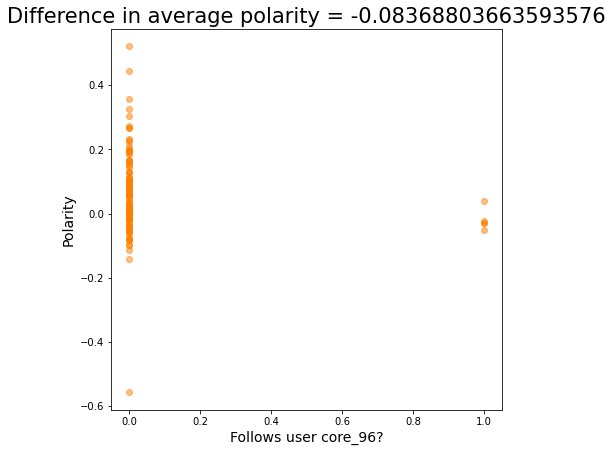

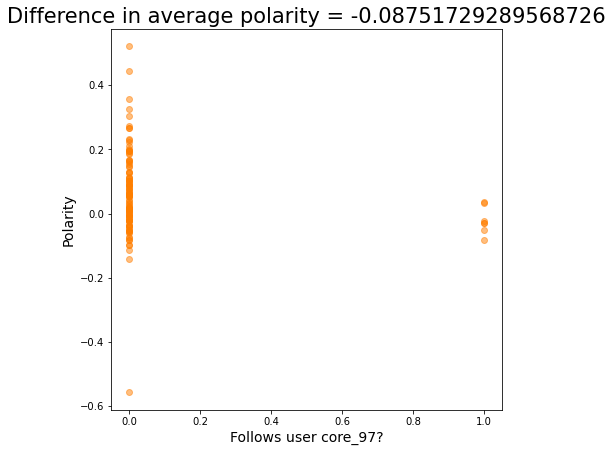

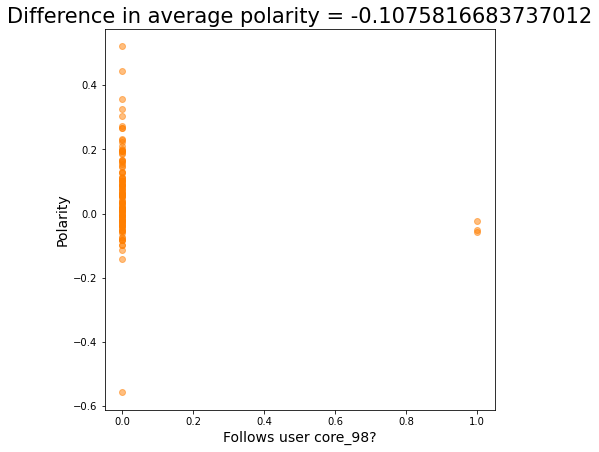

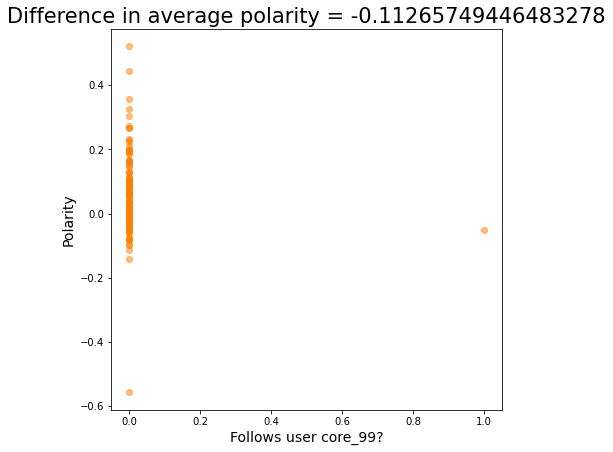

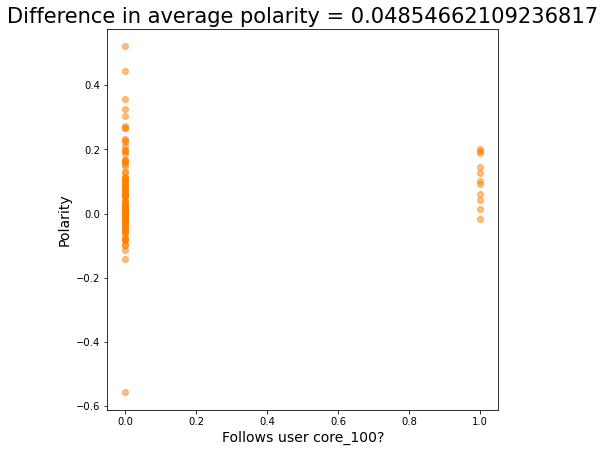

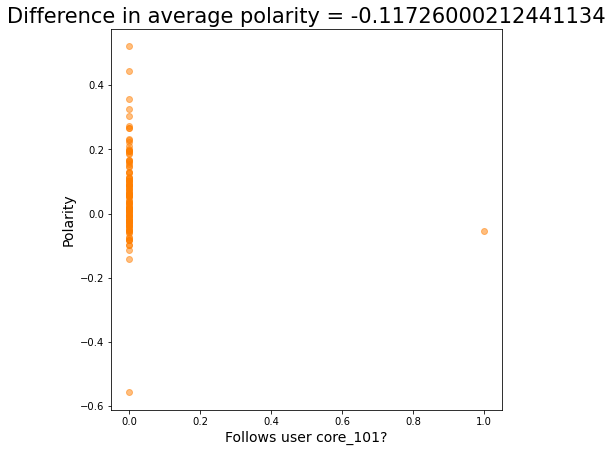

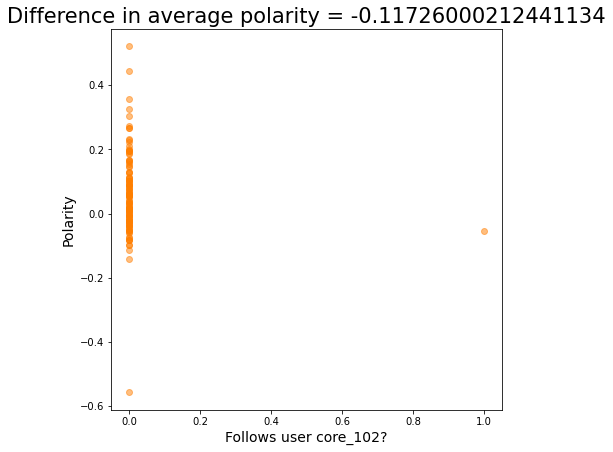

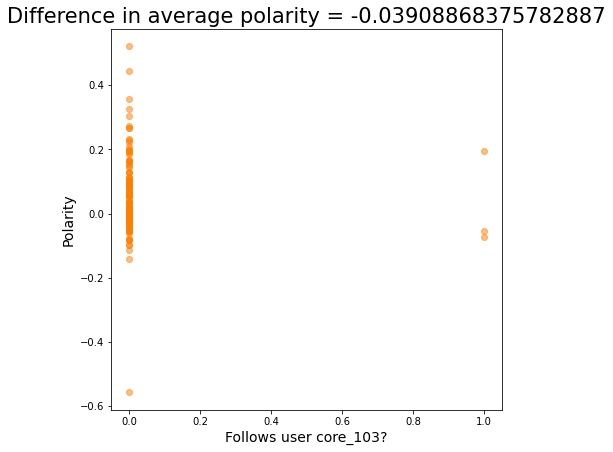

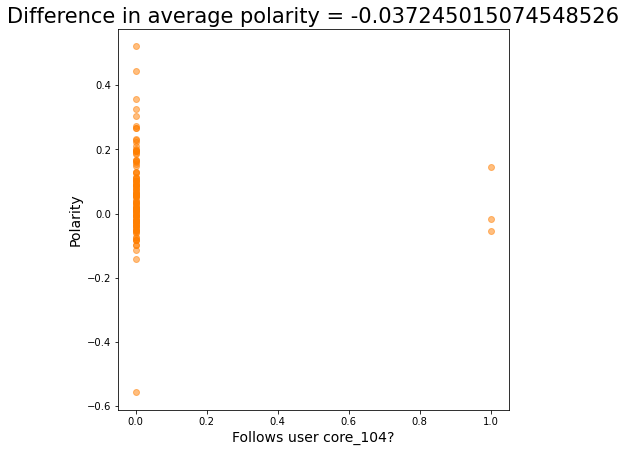

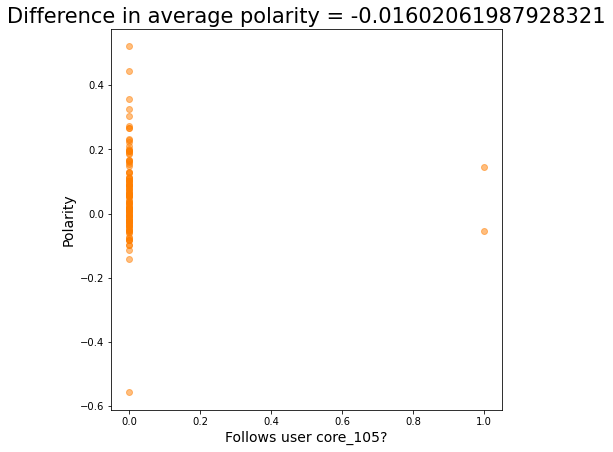

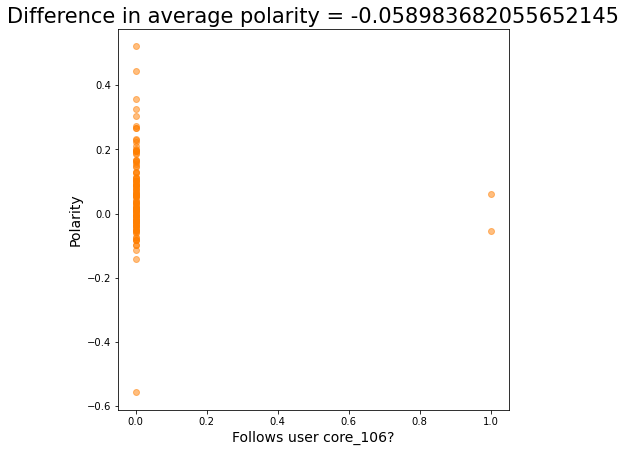

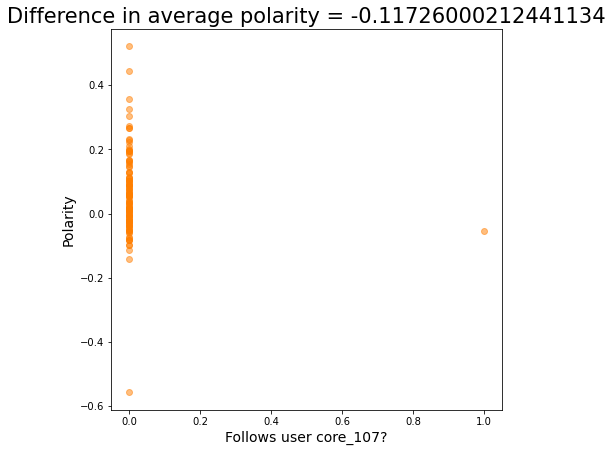

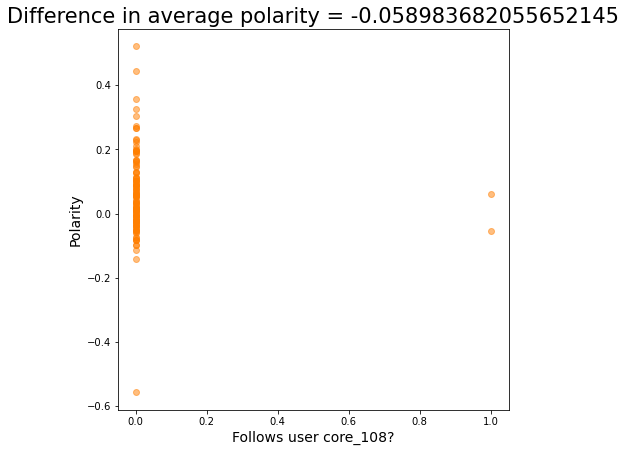

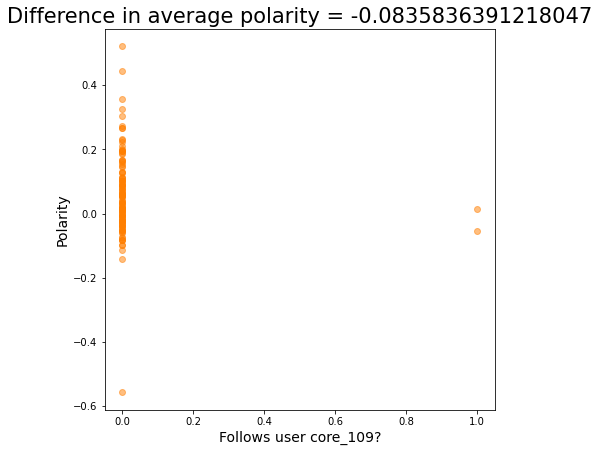

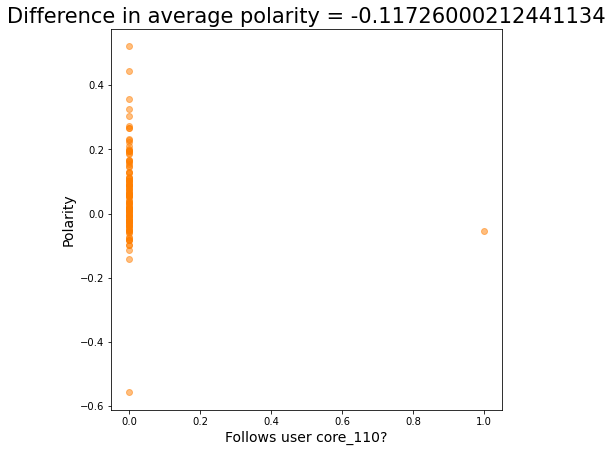

In [165]:
diaps = []
for core in data.columns[1:112]:
    plt.figure(figsize=(7,7))
    plt.scatter(data[core], data['Average_polarity'], alpha=.5, color='#FF7F00')
    plt.xlabel('Follows user '+core+'?', fontsize=14)
    plt.ylabel('Polarity', fontsize=14)
    diap = list(np.mean(data.loc[data[core]==True, ['Average_polarity']])-np.mean(data.loc[data[core]==False, ['Average_polarity']]))[0]
    diaps.append(diap)
    plt.title('Difference in average polarity = '+str(diap), fontsize=21)
    plt.show()

In [166]:
fit = sm.OLS(data.Average_polarity, 
             sm.add_constant(data[data.columns[1:112]].astype(int))).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Average_polarity   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     2.150
Date:                Fri, 28 May 2021   Prob (F-statistic):            0.00653
Time:                        18:01:02   Log-Likelihood:                 161.55
No. Observations:                 111   AIC:                            -173.1
Df Residuals:                      36   BIC:                             30.11
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0466      0.034      1.359      0.182      -0.023       0.116
core_0        -0.1032      0.074     -1.403      0.169      -0.252       0.046
core_1         0.1081      0.047      2.282      0.029       0.012       0.204
core_2         0.1387      0.106      1.312      0.198      -0.076       0.353
core_3        -0.0620      0.052     -1.181      0.245      -0.168       0.044
core_4         0.3245      0.183      1.774      0.085      -0.047       0.696
core_5        -0.1244      0.105     -1.186      0.244      -0.337       0.088
core_6        -0.0620      0.052     -1.181      0.245      -0.168       0.044
core_7        -0.0620      0.052     -1.181      0.245      -0.168       0.044
core_8        -0.0620      0.052     -1.181      0.245      -0.168       0.044
core_9        -0.0620      0.052     -1.181      0.245      -0.168       0.044
core_10       -0.0620      0.052     -1.181      0.245      -0.168       0.044
core_11       -0.0620      0.052     -1.181      0.245      -0.168       0.044
core_12       -0.0398      0.051     -0.774      0.444      -0.144       0.064
core_13        0.0560      0.100      0.562      0.578      -0.146       0.258
core_14        0.2013      0.261      0.771      0.446      -0.329       0.731
core_15        0.0125      0.091      0.138      0.891      -0.172       0.197
core_16        0.0125      0.091      0.138      0.891      -0.172       0.197
core_17        0.4049      0.348      1.165      0.252      -0.300       1.110
core_18       -0.6068      0.479     -1.266      0.214      -1.579       0.366
core_19        0.0125      0.091      0.138      0.891      -0.172       0.197
core_20        0.0244      0.146      0.167      0.868      -0.271       0.320
core_21        0.0125      0.091      0.138      0.891      -0.172       0.197
core_22        0.0125      0.091      0.138      0.891      -0.172       0.197
core_23       -0.0588      0.057     -1.036      0.307      -0.174       0.056
core_24        0.0682      0.136      0.501      0.619      -0.208       0.344
core_25        0.0321      0.112      0.287      0.776      -0.195       0.259
core_26        0.0682      0.136      0.501      0.619      -0.208       0.344
core_27        0.1087      0.140      0.775      0.443      -0.176       0.393
core_28        0.1643      0.086      1.922      0.063      -0.009       0.338
core_29        0.0682      0.136      0.501      0.619      -0.208       0.344
core_30       -0.0176      0.140     -0.126      0.901      -0.302       0.267
core_31       -0.0673      0.124     -0.544      0.589      -0.318       0.183
core_32       -0.2590      0.382     -0.678      0.502      -1.033       0.515
core_33       -0.1629      0.267     -0.609      0.546      -0.705       0.379
core_34        0.1509      0.127      1.184      0.244      -0.108       0.409
co

In [167]:
diaps = np.array(diaps).flatten()
diabz = np.abs(diaps-diaps.mean())/diaps.std()
featusers = diabz>=2.3
featusers = [i+1 for i in range(len(featusers)) if featusers[i]]
featusers = data.columns[featusers]

In [168]:
fit = sm.OLS(data.Average_polarity, 
             sm.add_constant(data[featusers].astype(int))).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Average_polarity   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     27.55
Date:                Fri, 28 May 2021   Prob (F-statistic):           7.60e-07
Time:                        18:01:04   Log-Likelihood:                 80.274
No. Observations:                 111   AIC:                            -156.5
Df Residuals:                     109   BIC:                            -151.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0665      0.011      5.890      0.000       0.044       0.089
core_81       -0.1562      0.030     -5.249      0.000      -0.215      -0.097
core_82       -0.1562      0.030     -5.249      0.000      -0.215      -0.097
core_84       -0.1562      0.030     -5.249      0.000      -0.215      -0.097
core_88       -0.1562      0.030     -5.249      0.000      -0.215      -0.097
==============================================================================
Omnibus:                       24.925   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.414
Skew:                           1.103   Prob(JB):                     2.04e-08
Kurtosis:                       4.671   Cond. No.                     2.48e+48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.8e-95. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Chapo data

In [145]:
data = pd.read_csv('Chapo_cross_core.csv')
data

user  core_0  core_1  core_2  core_3  core_4  core_5  \
0     722127759699505153   False    True   False   False   False   False   
1               25368431    True   False    True    True    True    True   
2     883518029790928896   False    True   False   False   False   False   
3              148593548   False    True   False   False   False   False   
4             2346613154   False    True   False   False   False    True   
..                   ...     ...     ...     ...     ...     ...     ...   
106            176285385    True   False   False   False   False   False   
107  1331439997266710528    True   False   False   False   False   False   
108             18930357    True   False   False   False   False   False   
109            375937936   False   False   False   False   False   False   
110             10448062   False   False   False   False   False   False   

     core_6  core_7  core_8  ...  core_102  core_103  core_104  core_105  \
0     False   False   False  ...     False     False     False     False   
1      True    True    True  ...     False     False     False     False   
2     False   False   False  ...     False     False     False     False   
3     False   False   False  ...     False     False     False     False   
4     False   False   False  ...     False     False     False     False   
..      ...     ...     ...  ...       ...       ...       ...       ...   
106   False   False   False  ...      True     False     False     False   
107   False   False   False  ...     False     False     False     False   
108   False   False   False  ...     False     False     False     False   
109   False   False   False  ...     False     False     False     False   
110   False   False   False  ...     False     False     False     False   

     core_106  core_107  core_108  core_109  core_110  Average_polarity  
0        True     False     False     False     False          0.138850  
1       False     False     False     False     False          0.067065  
2       False     False     False     False     False         -0.022724  
3       False     False     False     False     False          0.087144  
4       False     False     False     False     False          0.108883  
..        ...       ...       ...       ...       ...               ...  
106     False     False     False      True      True         -0.026501  
107     False     False     False     False     False         -0.087720  
108     False     False     False     False     False         -0.005354  
109      True     False     False     False      True          0.051138  
110     False     False     False     False     False          0.035350  

[111 rows x 113 columns]

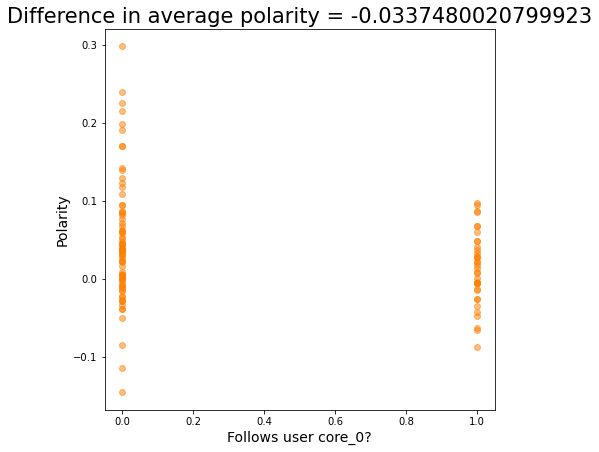

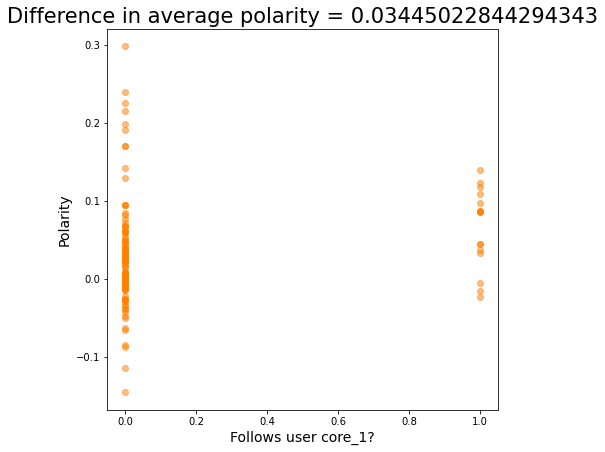

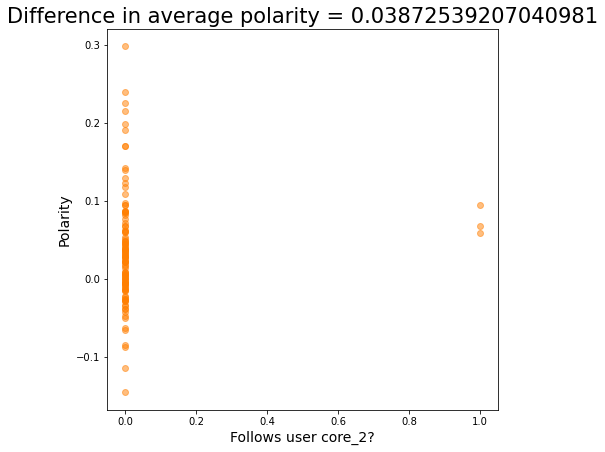

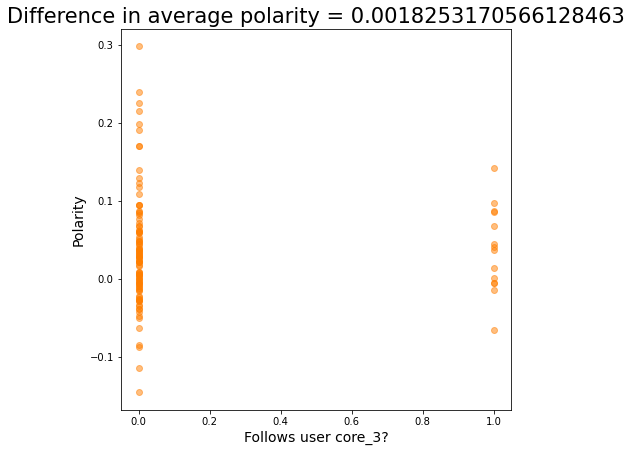

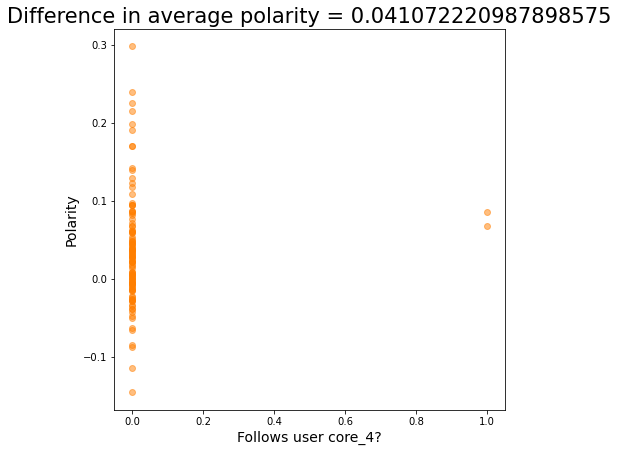

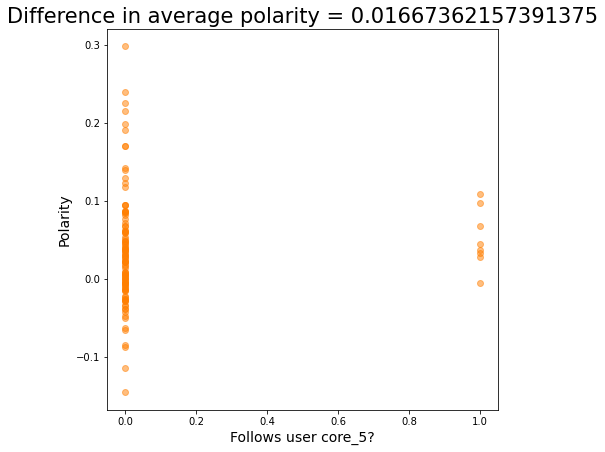

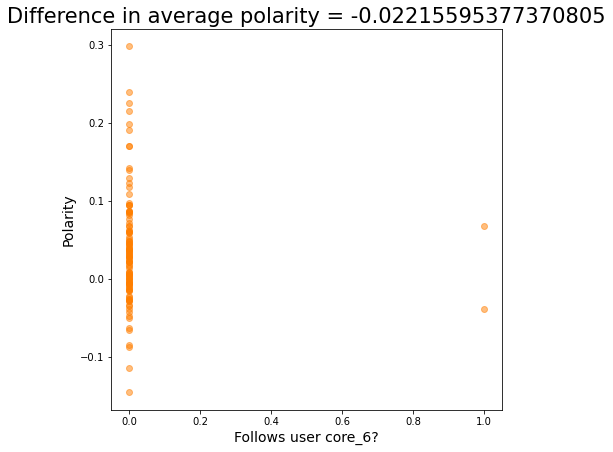

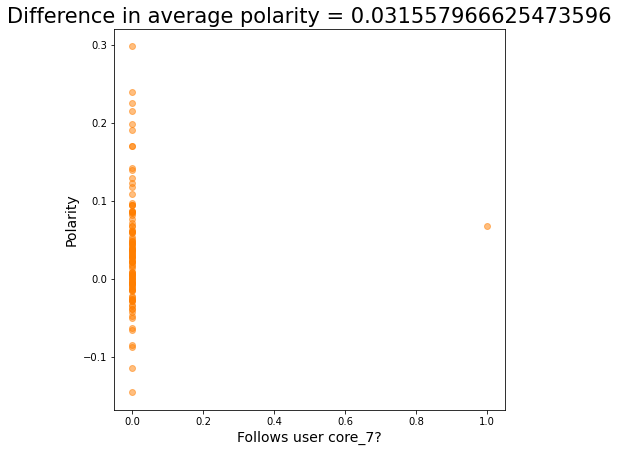

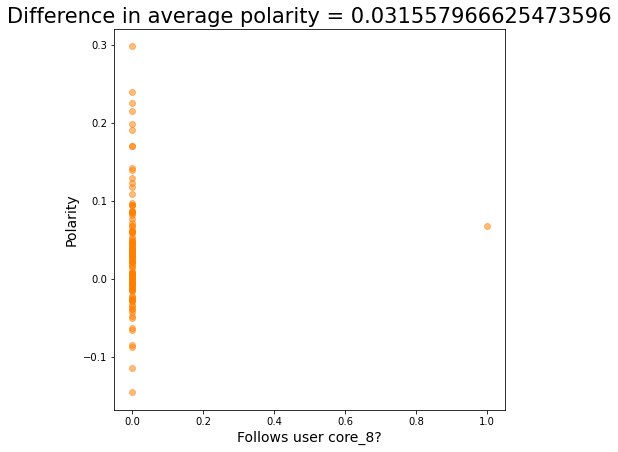

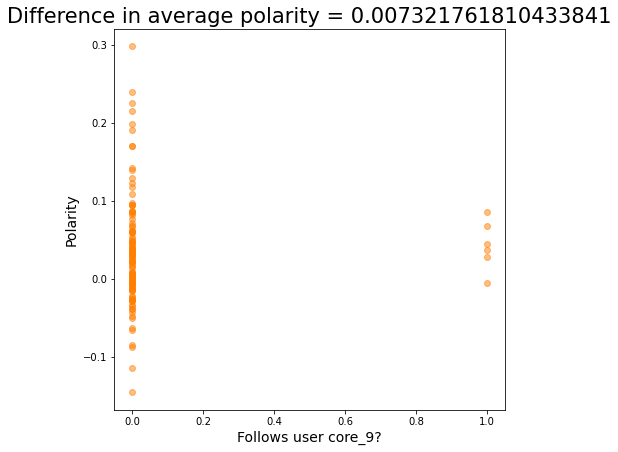

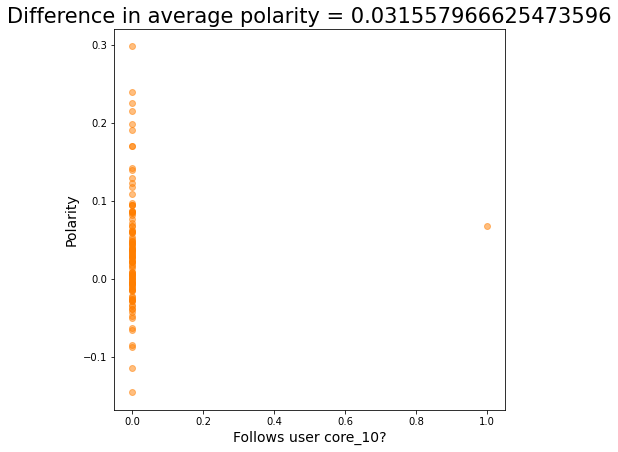

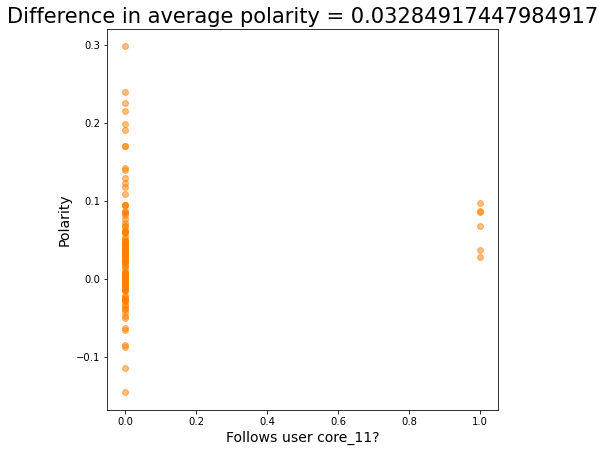

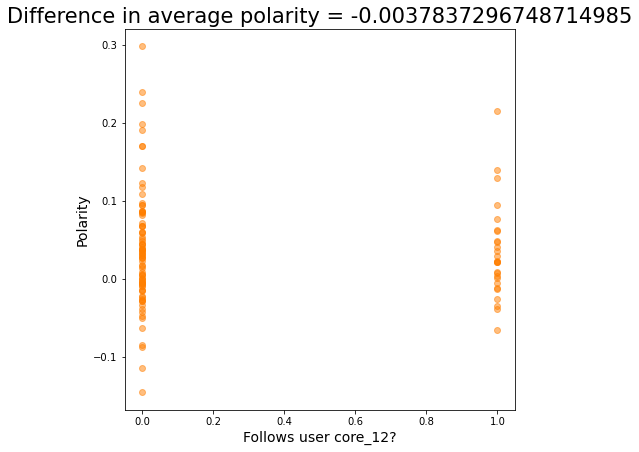

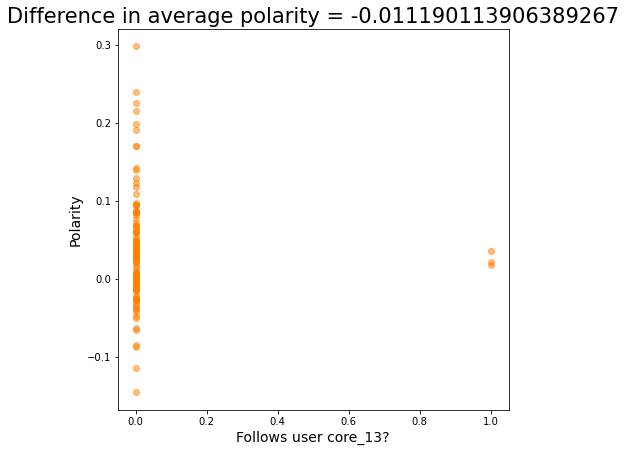

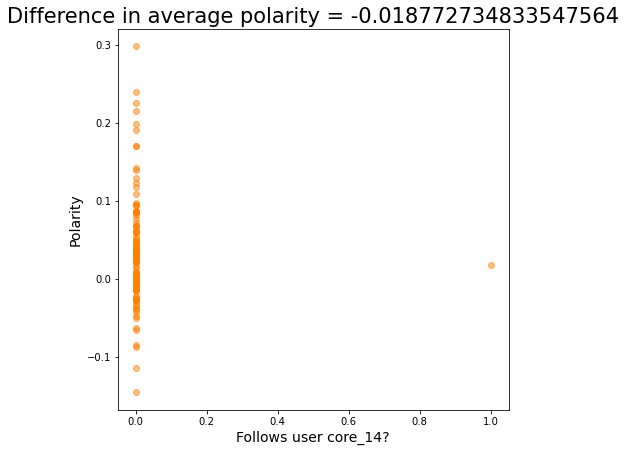

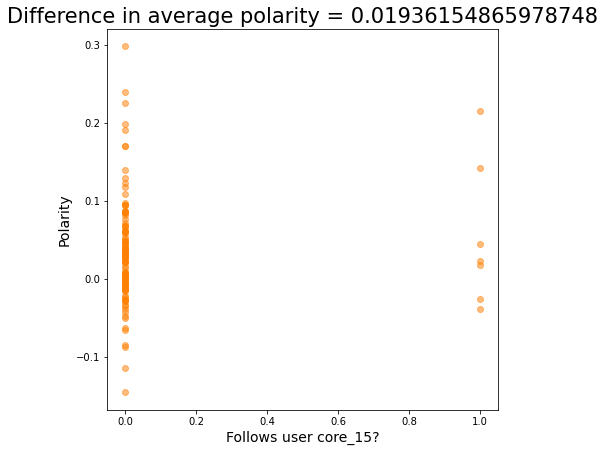

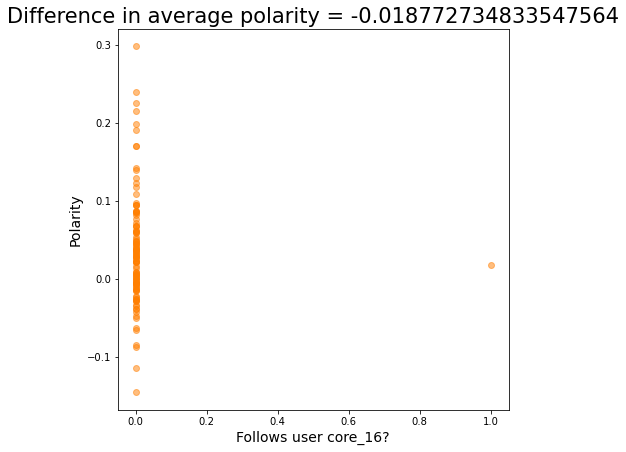

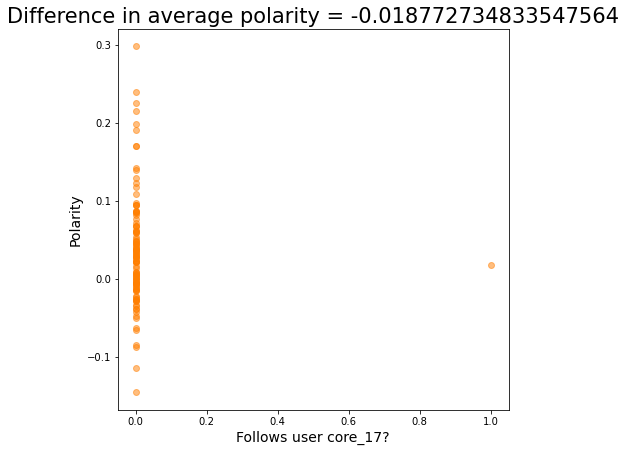

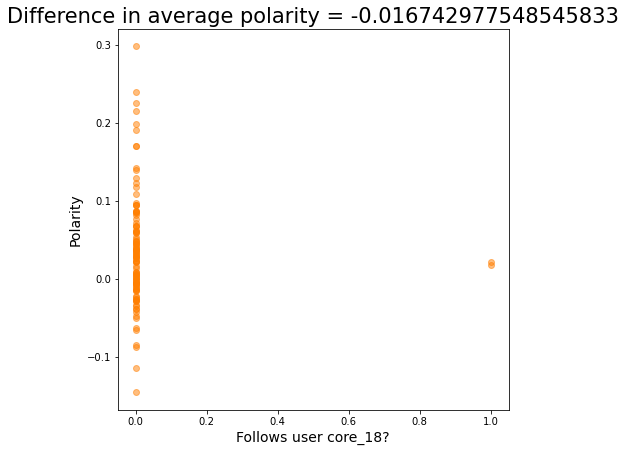

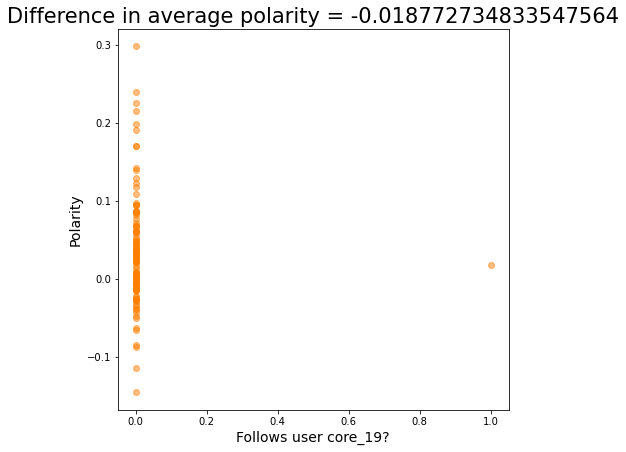

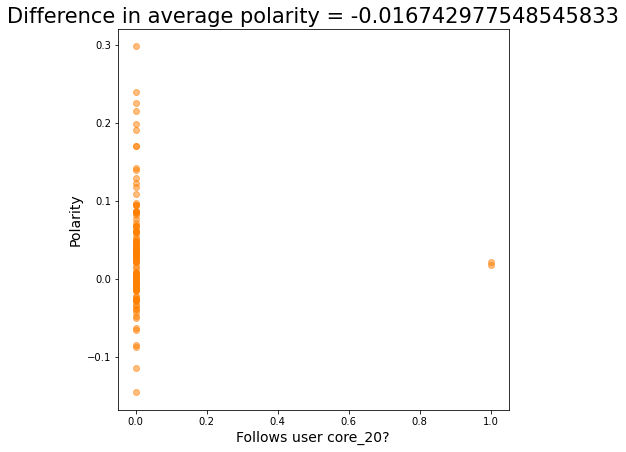

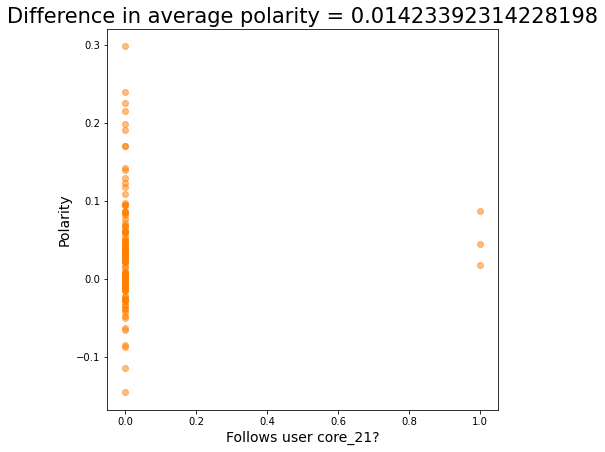

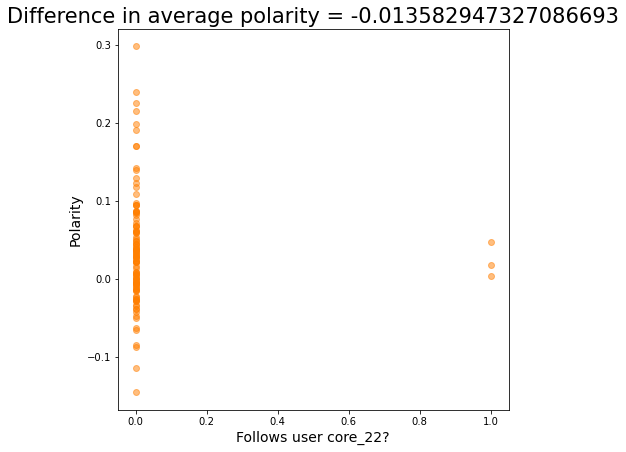

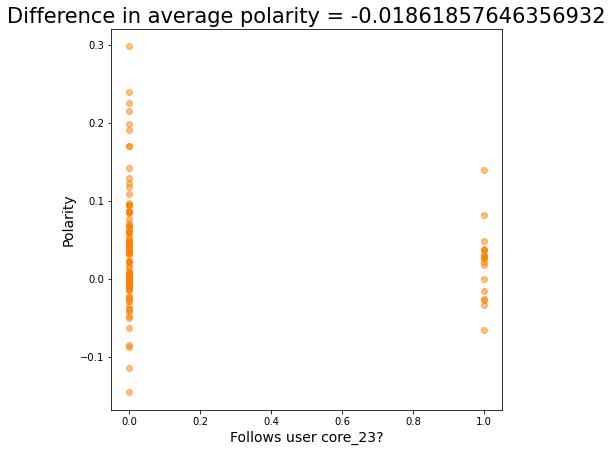

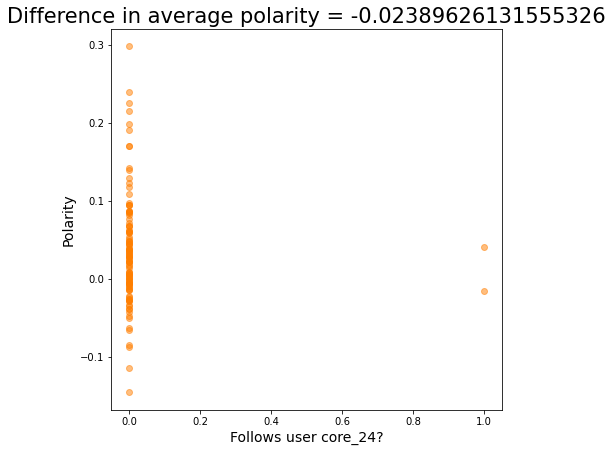

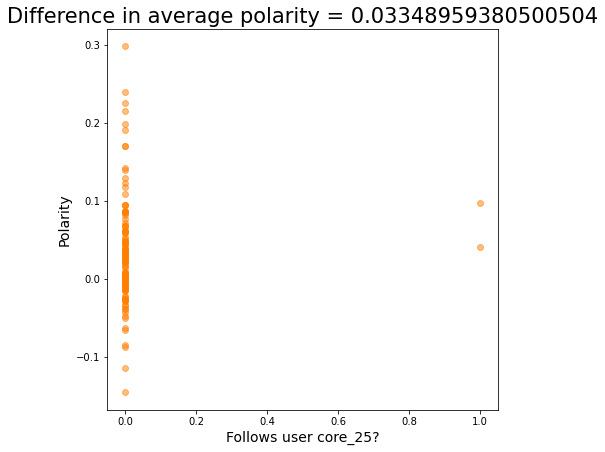

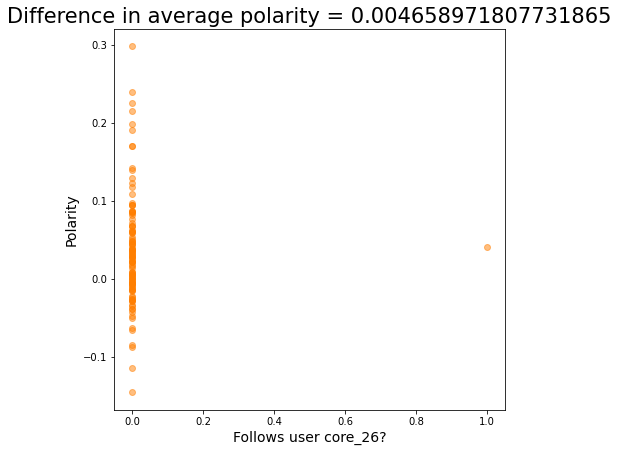

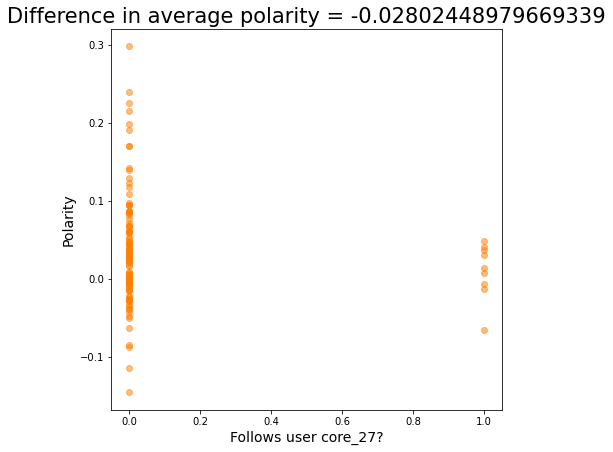

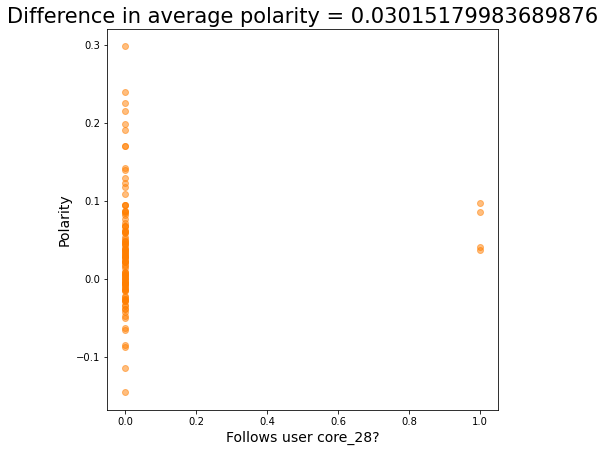

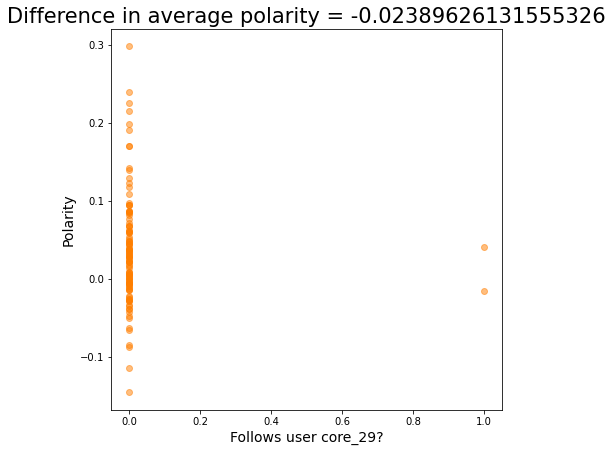

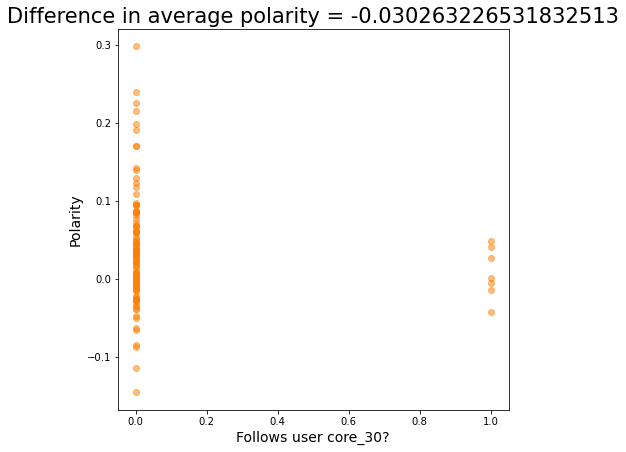

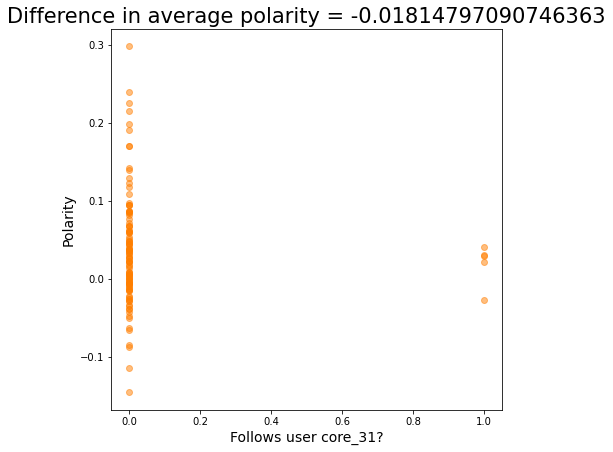

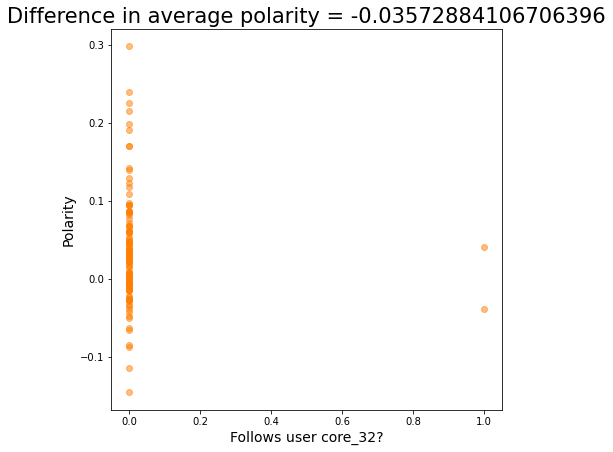

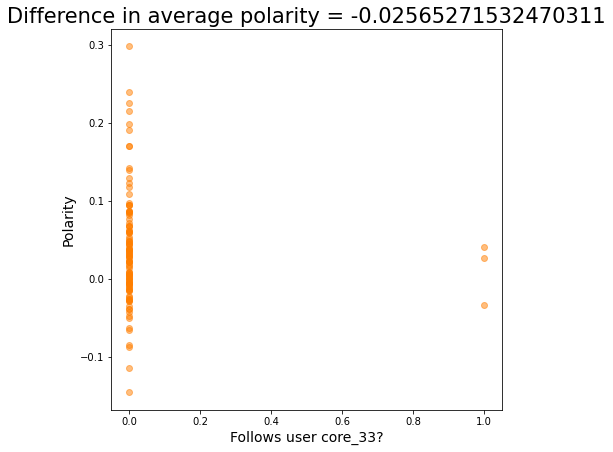

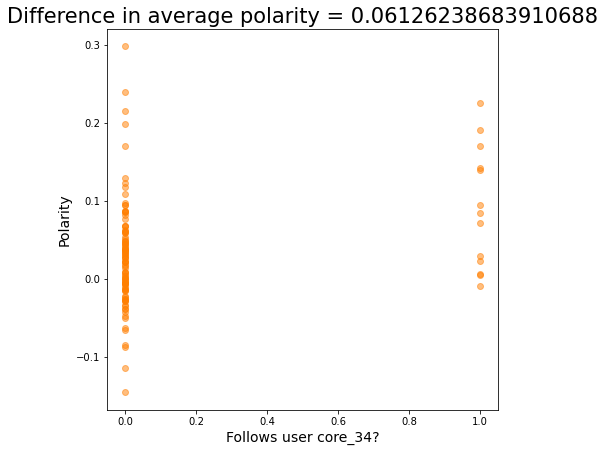

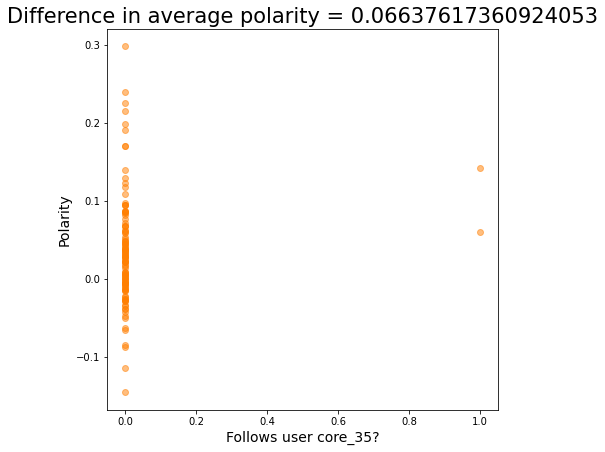

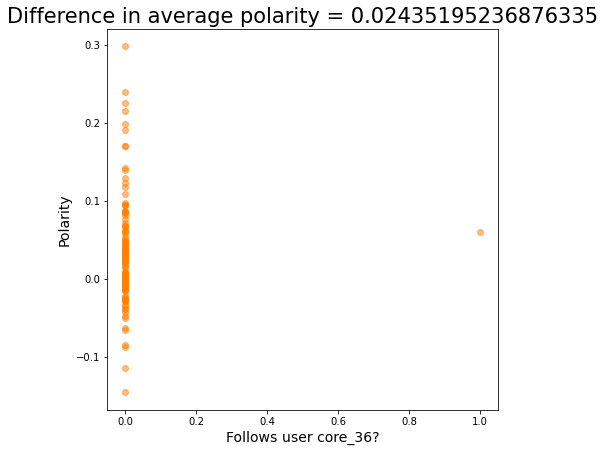

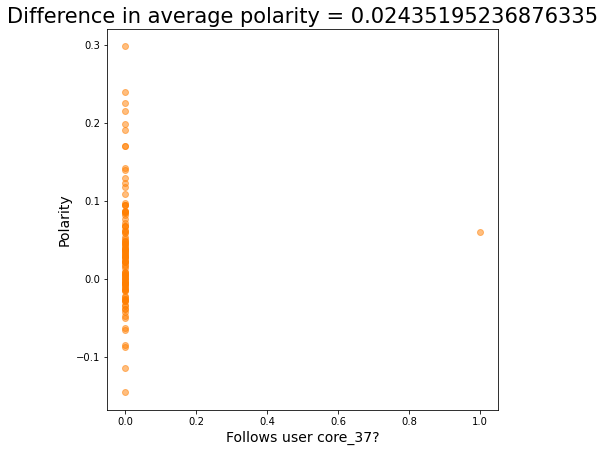

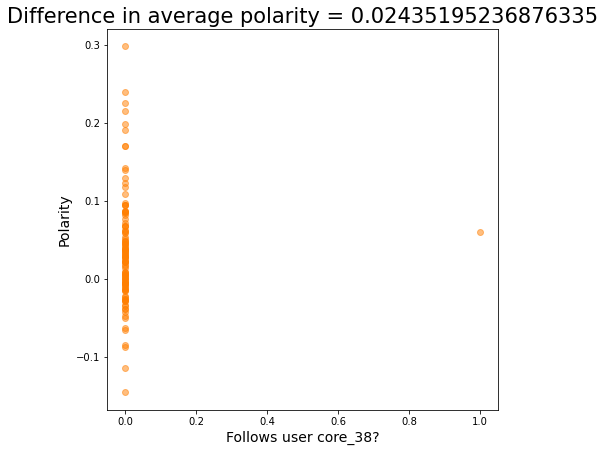

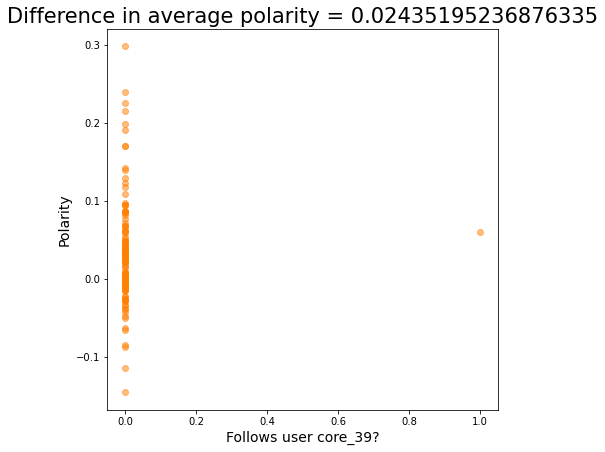

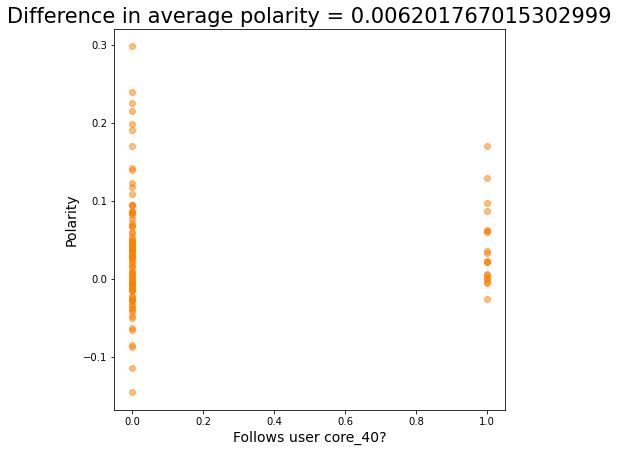

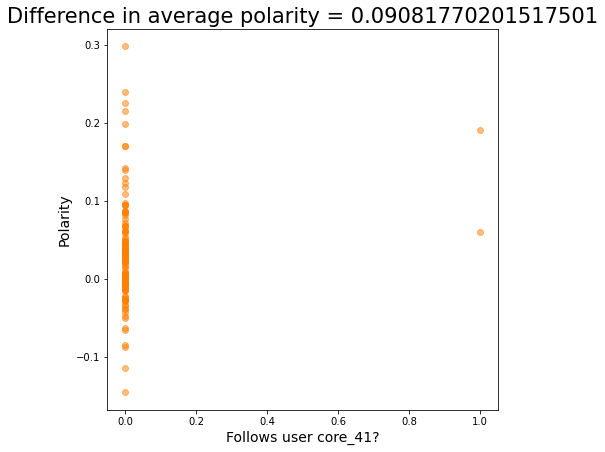

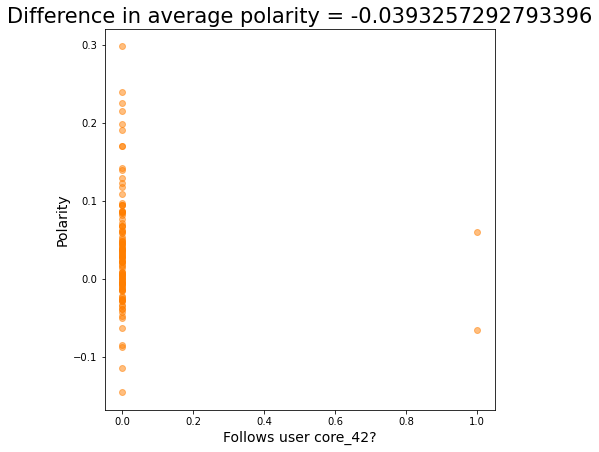

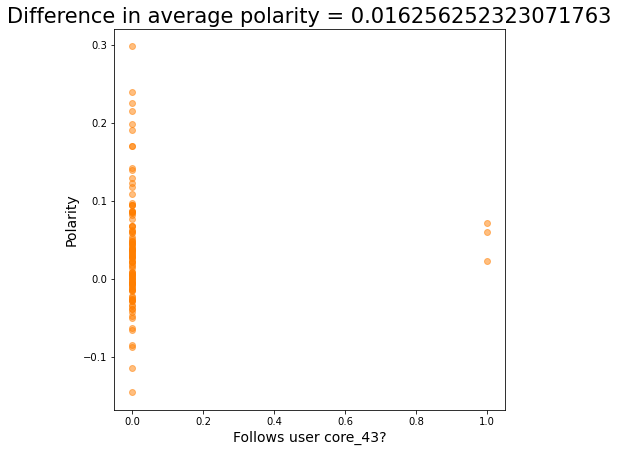

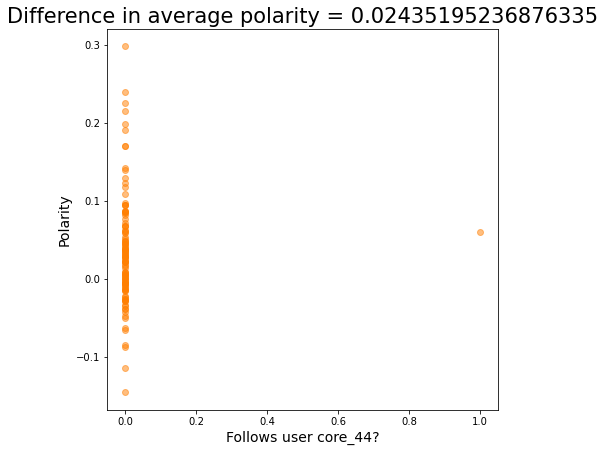

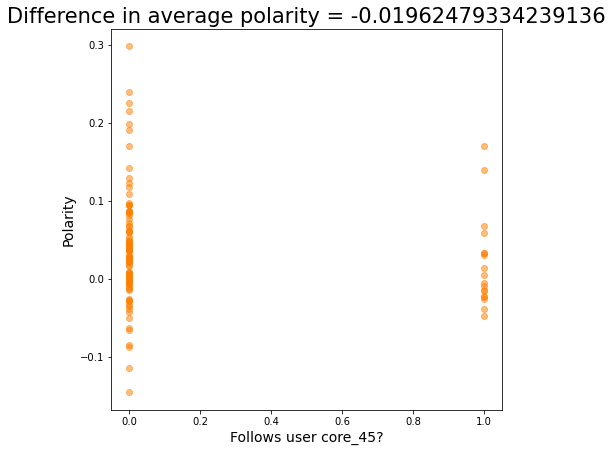

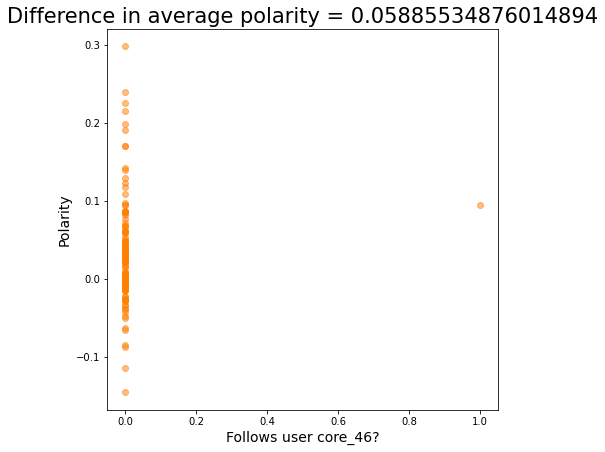

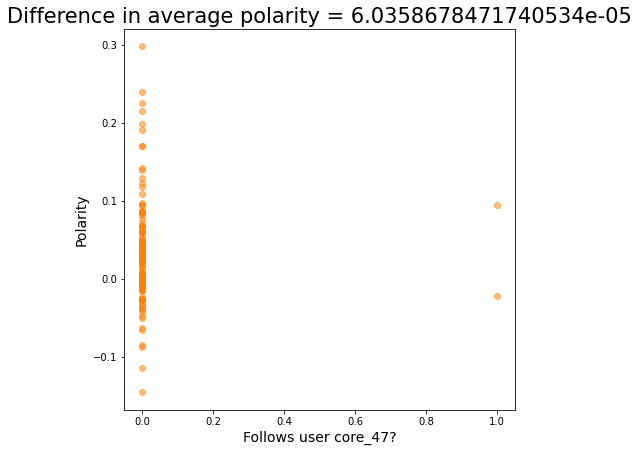

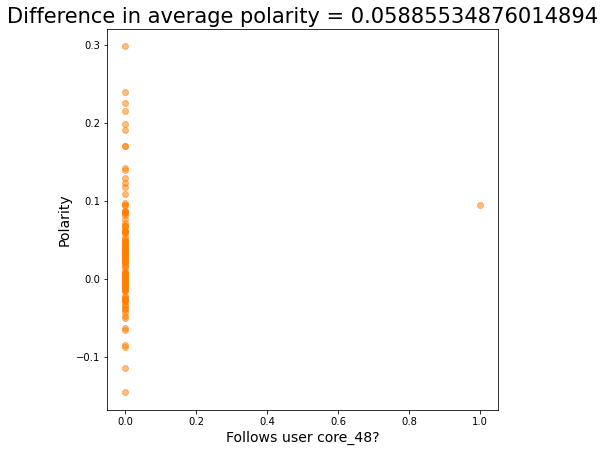

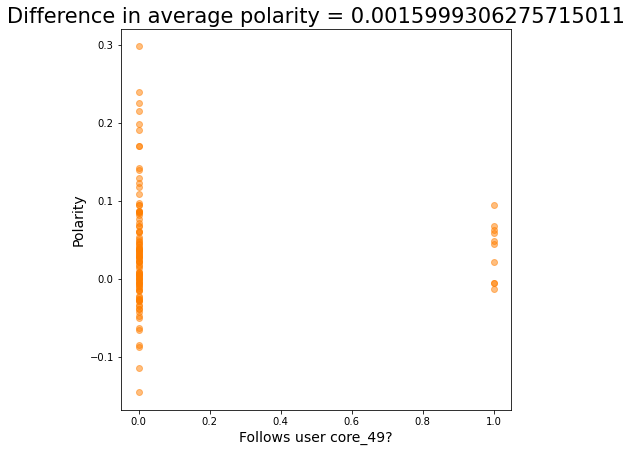

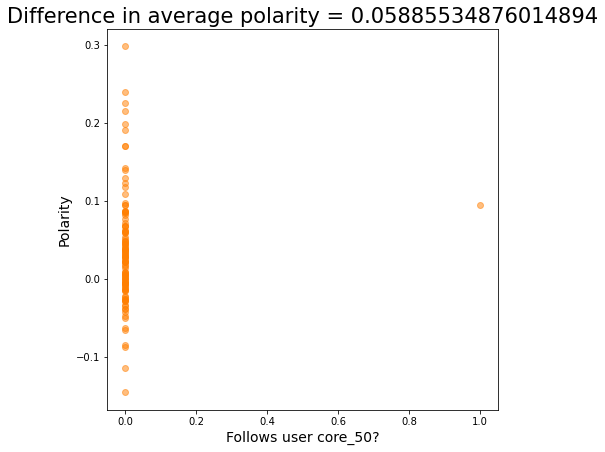

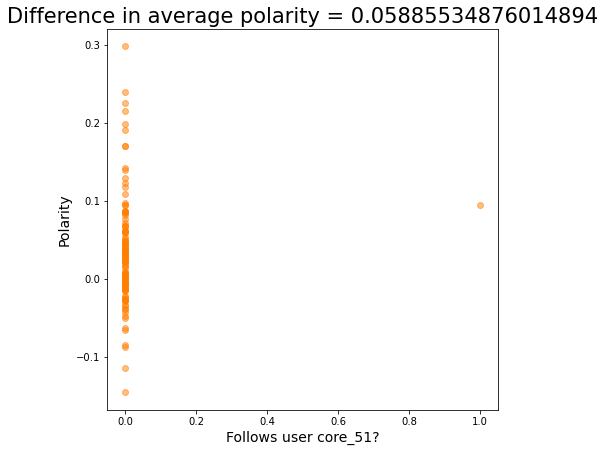

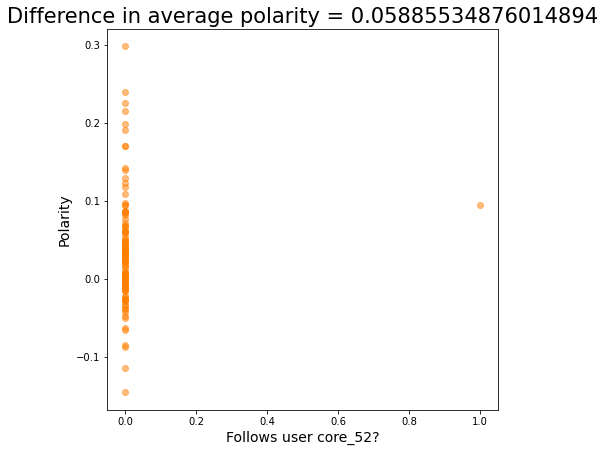

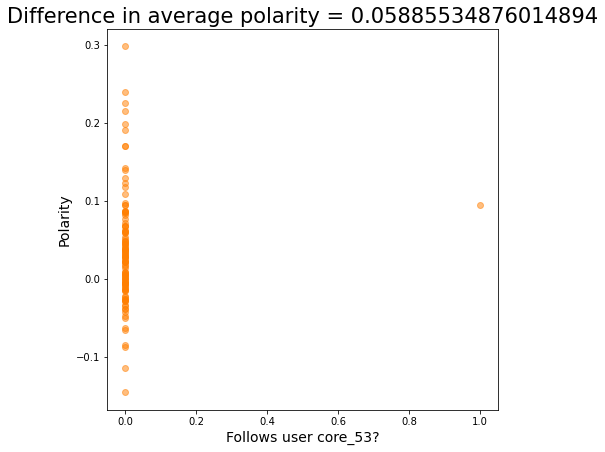

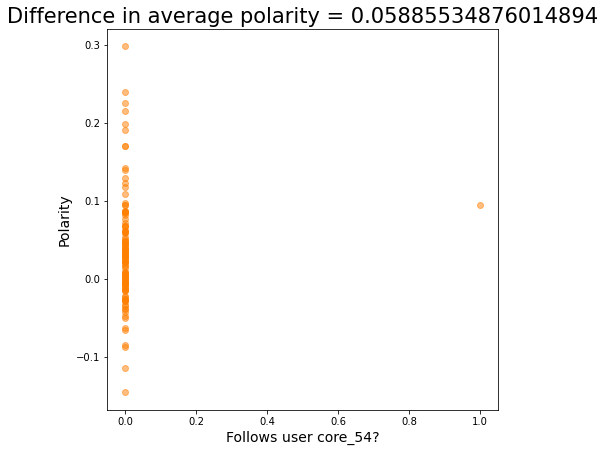

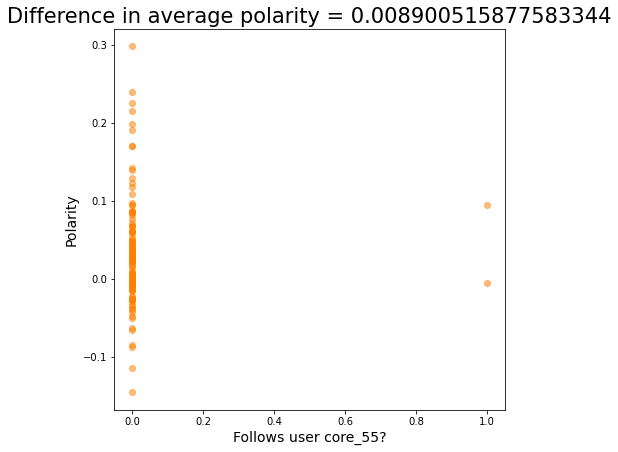

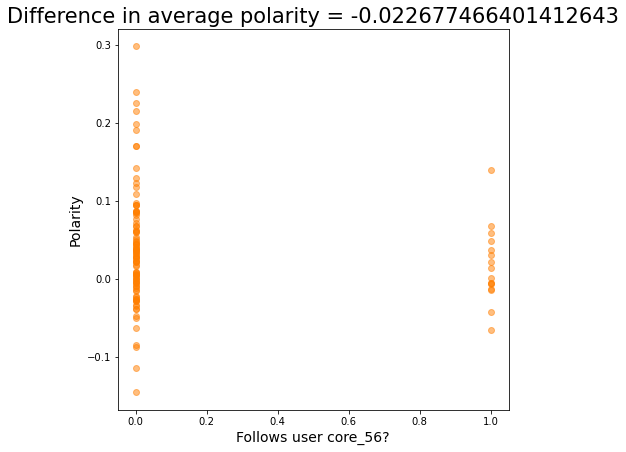

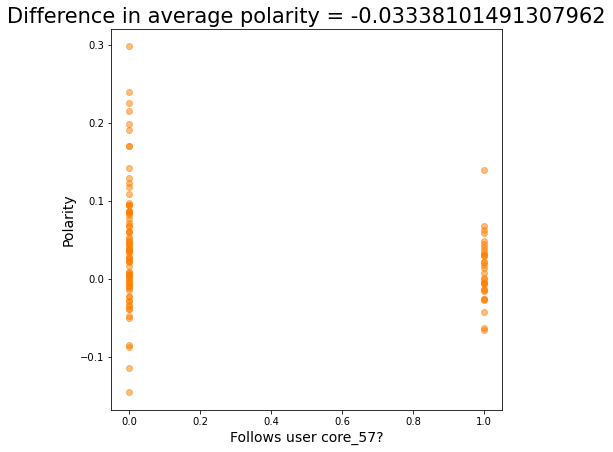

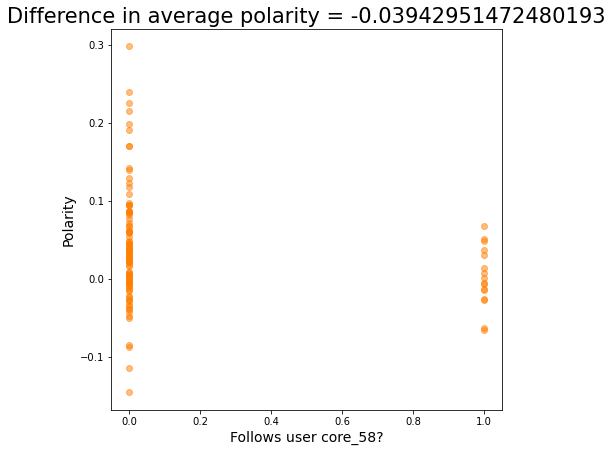

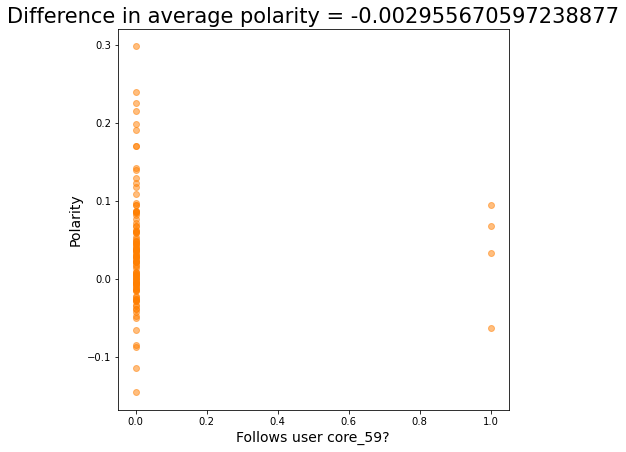

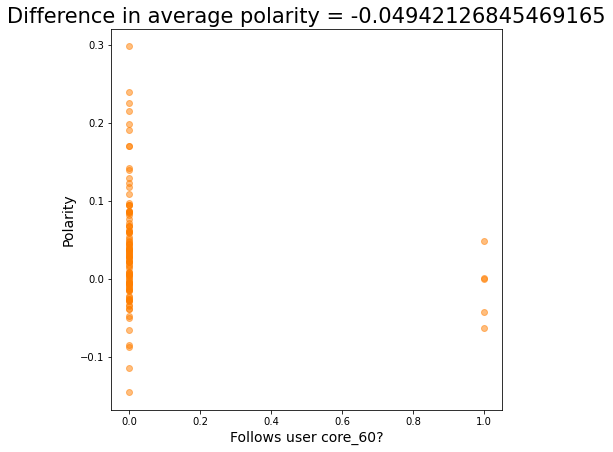

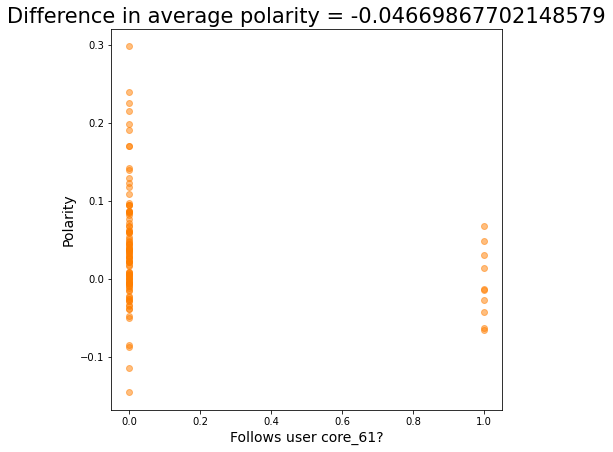

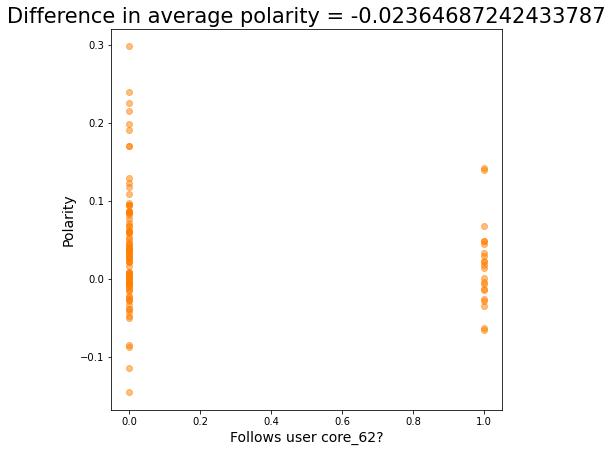

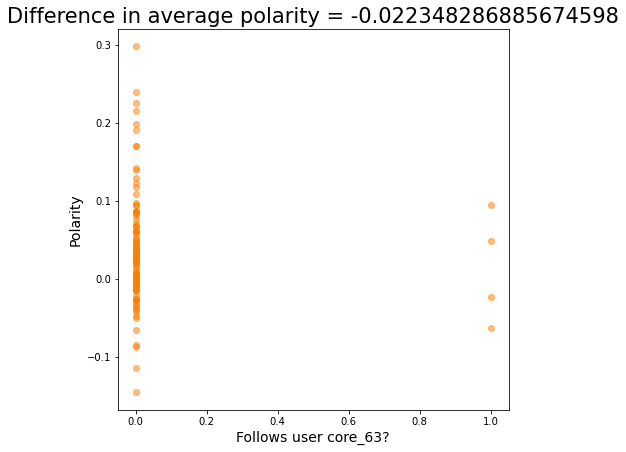

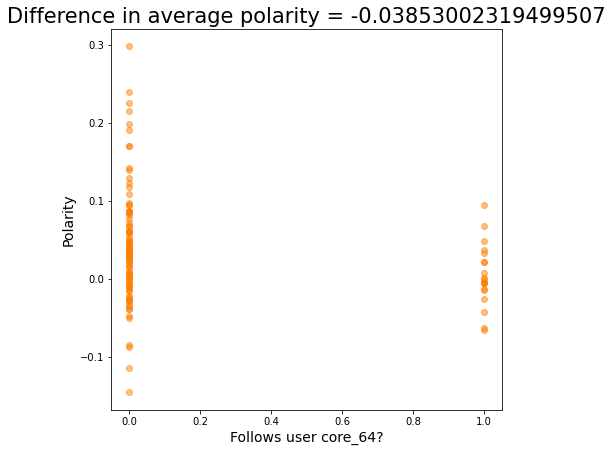

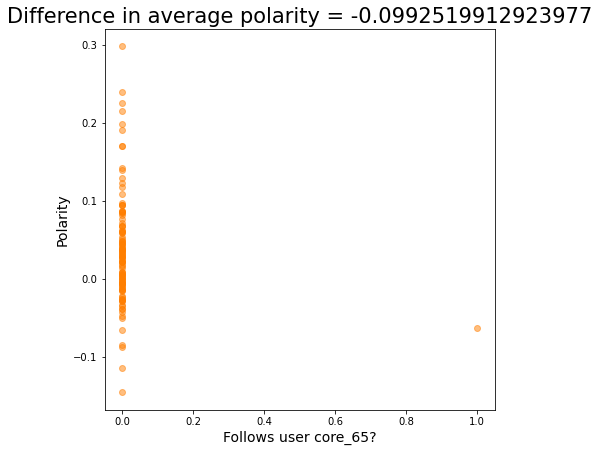

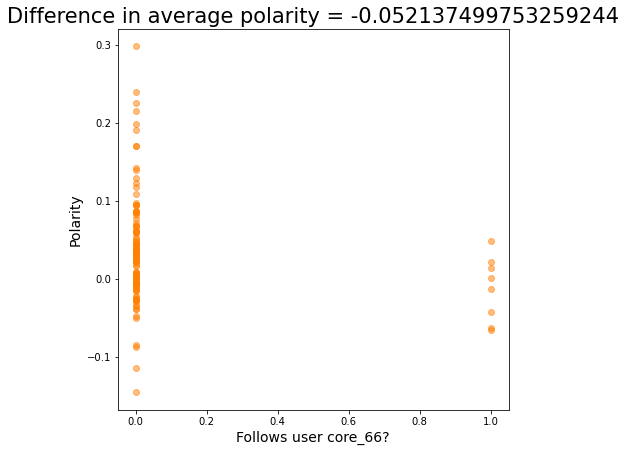

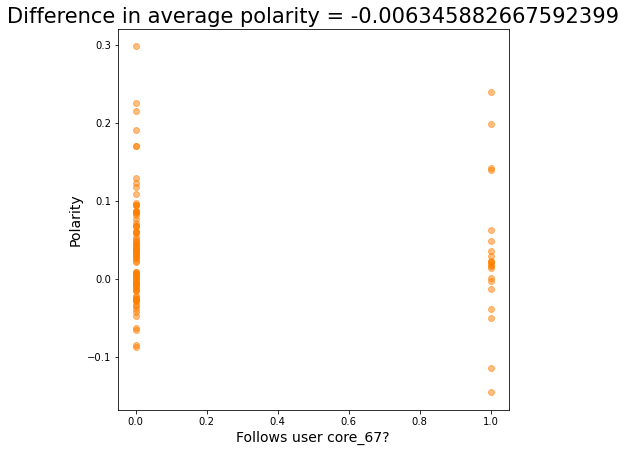

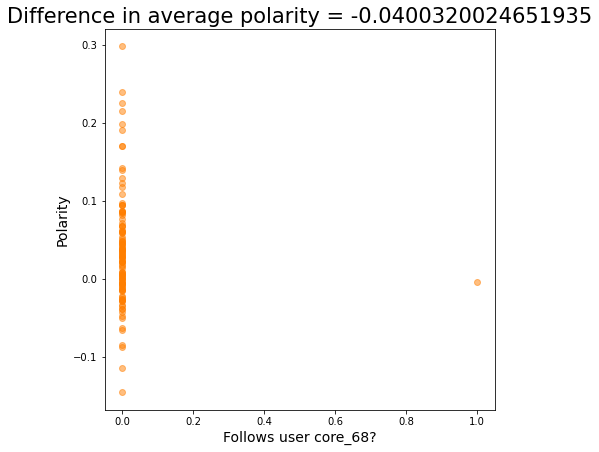

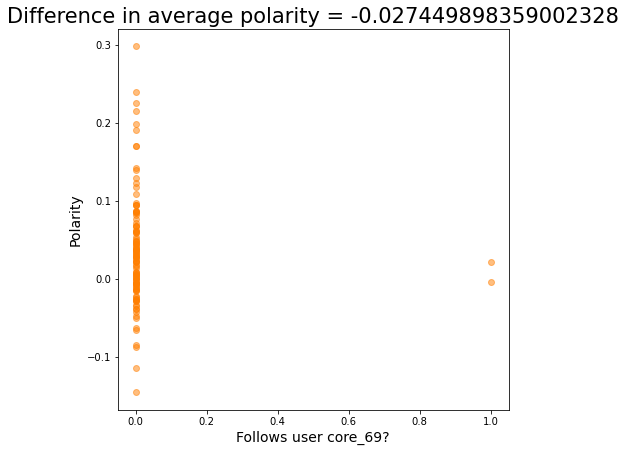

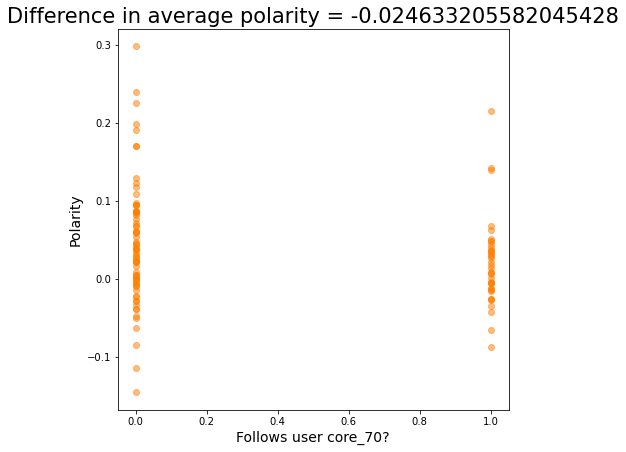

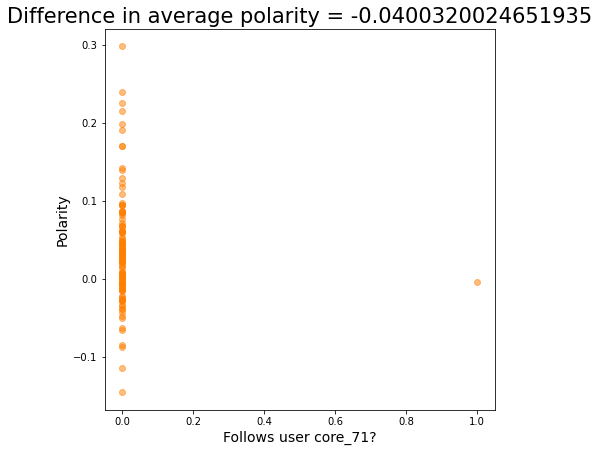

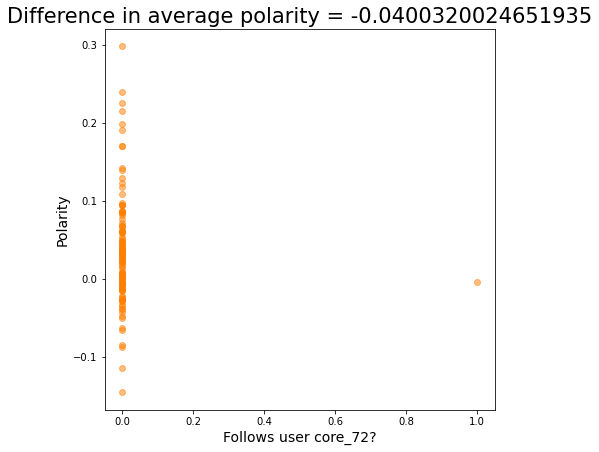

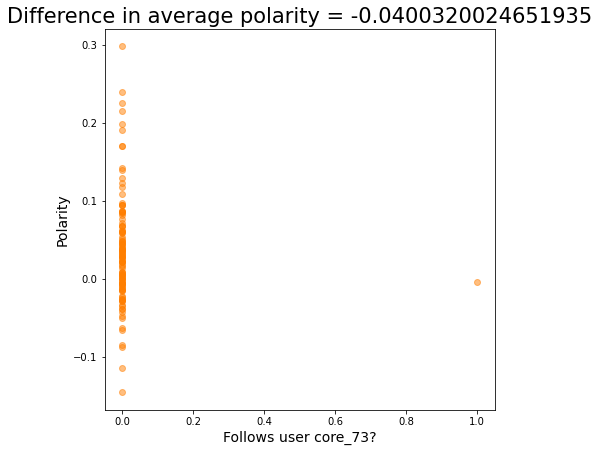

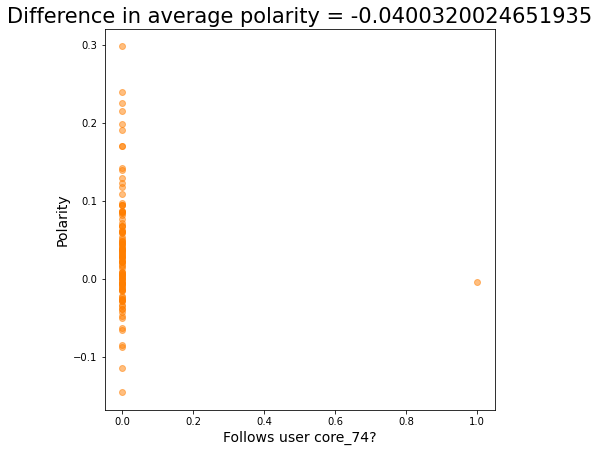

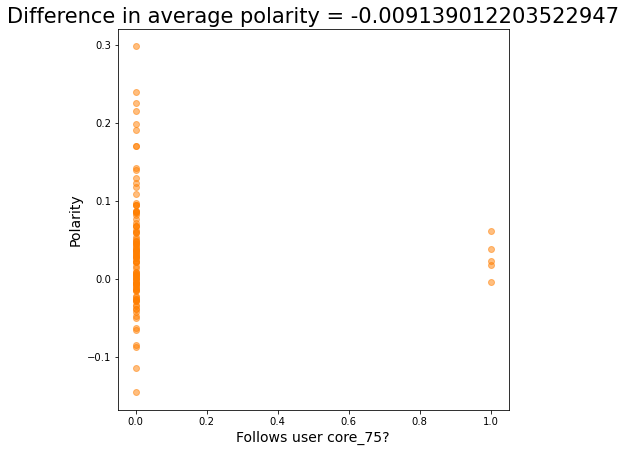

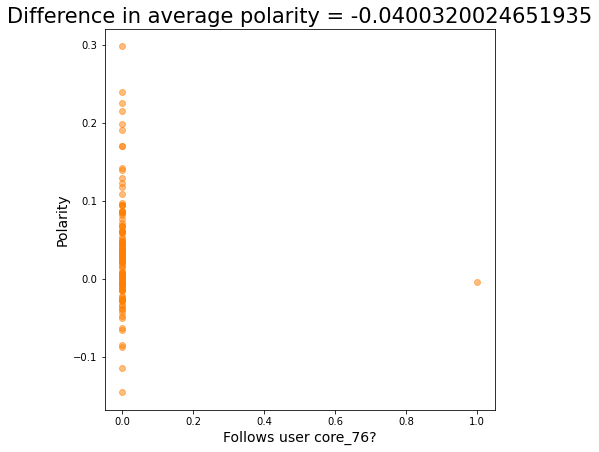

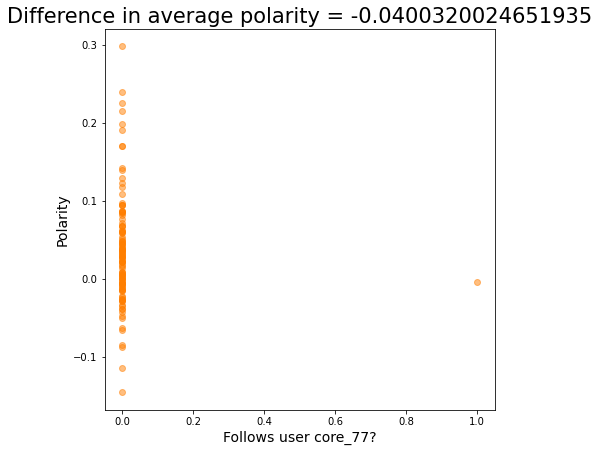

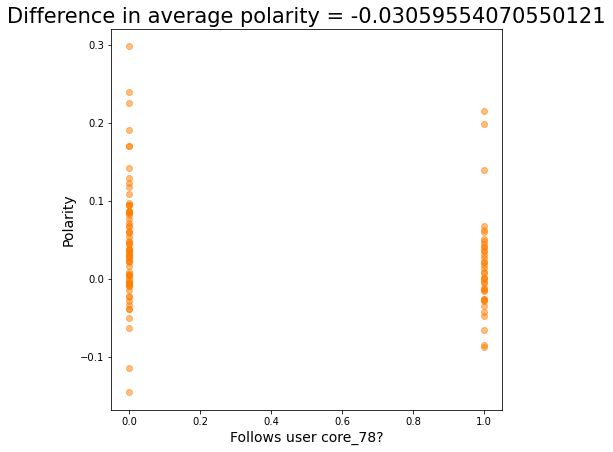

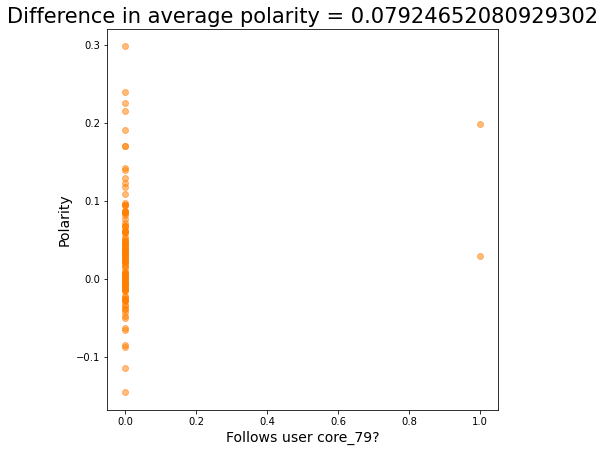

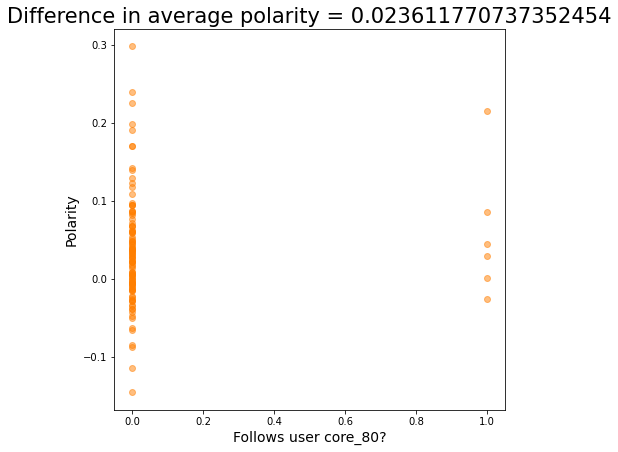

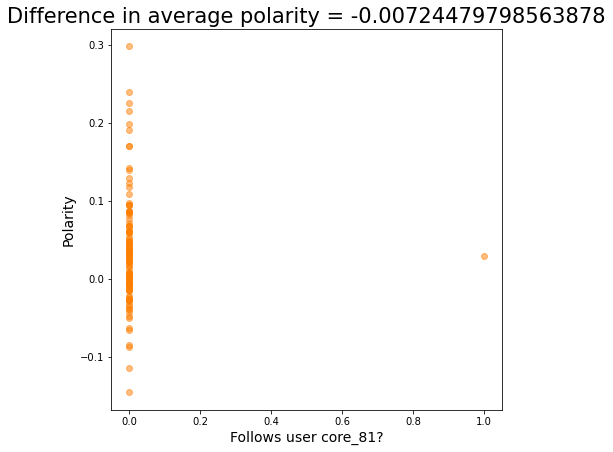

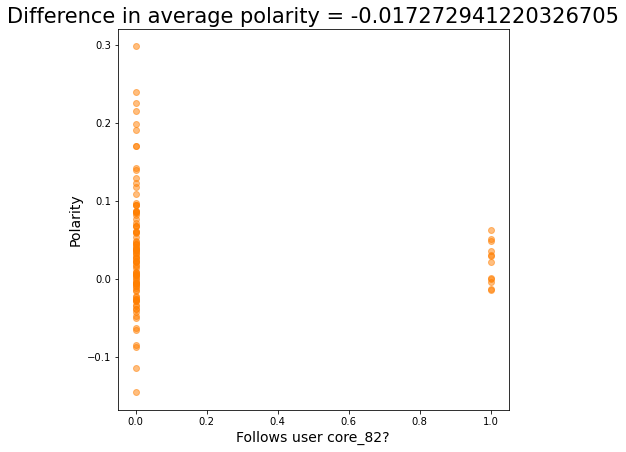

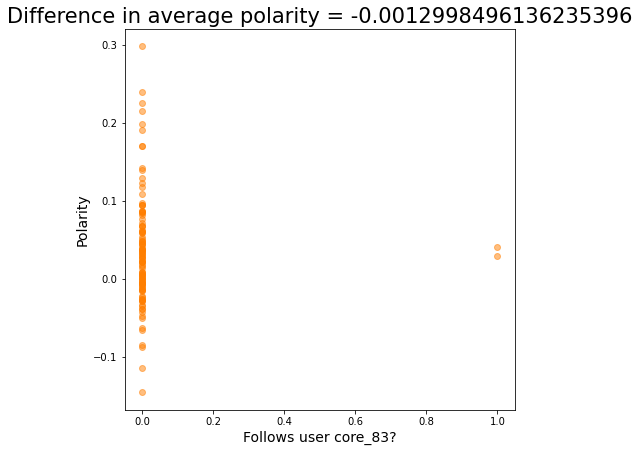

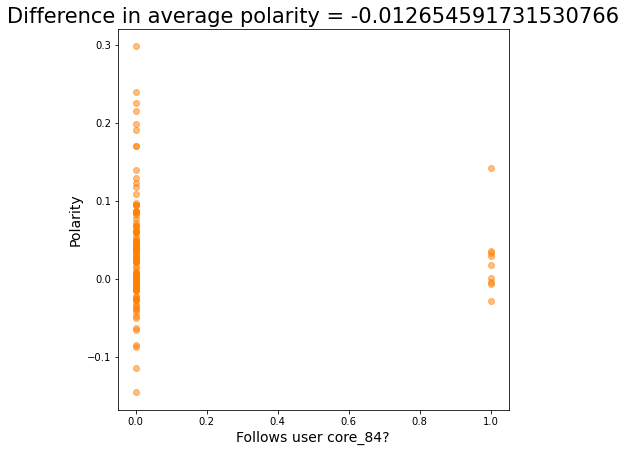

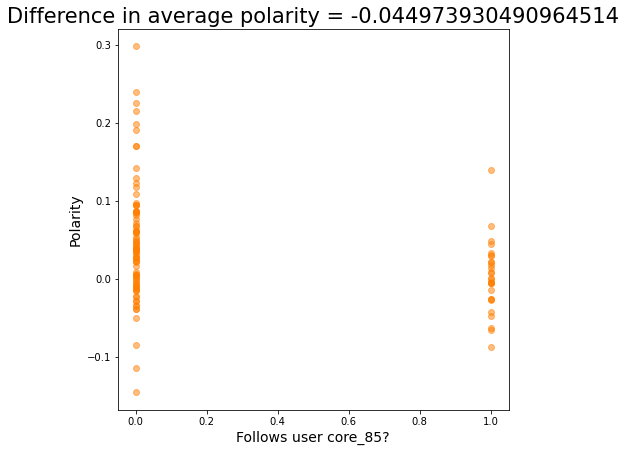

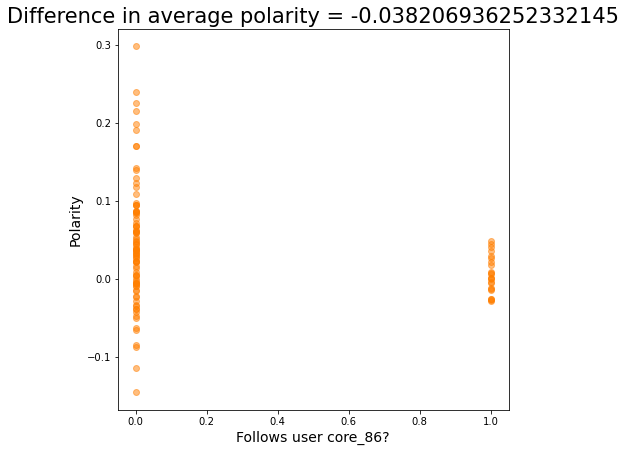

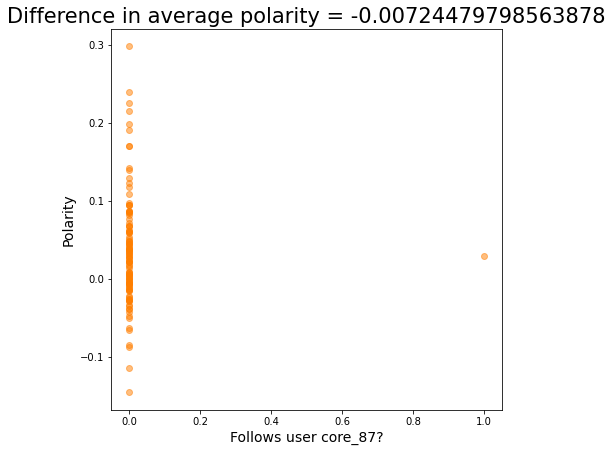

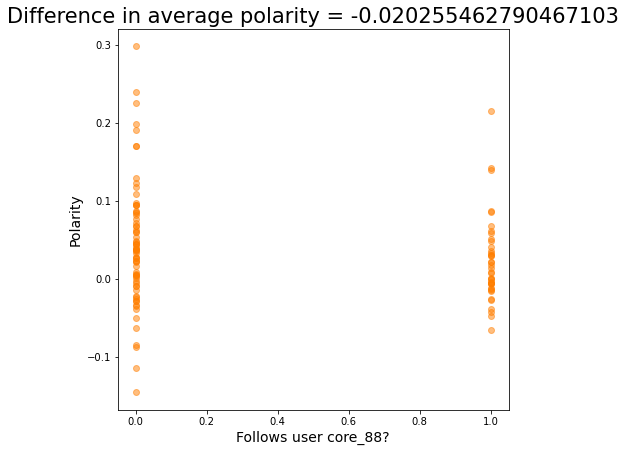

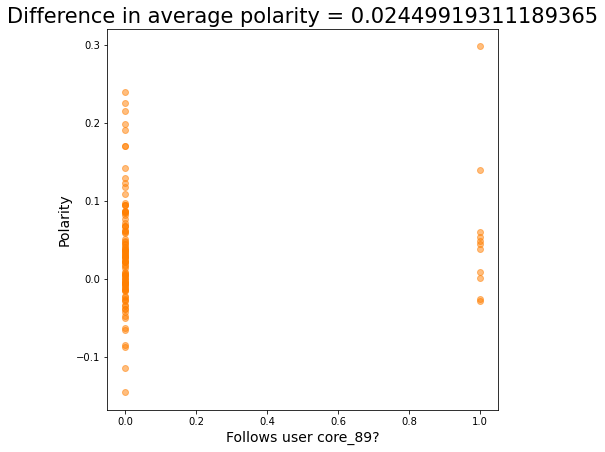

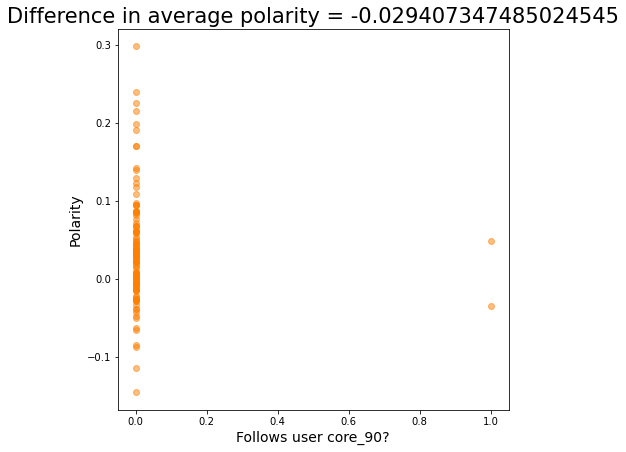

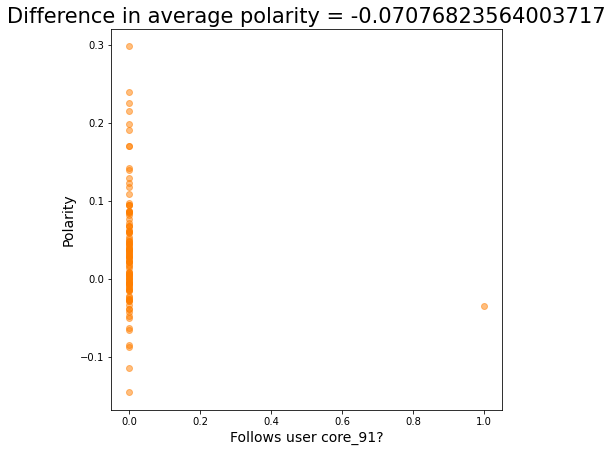

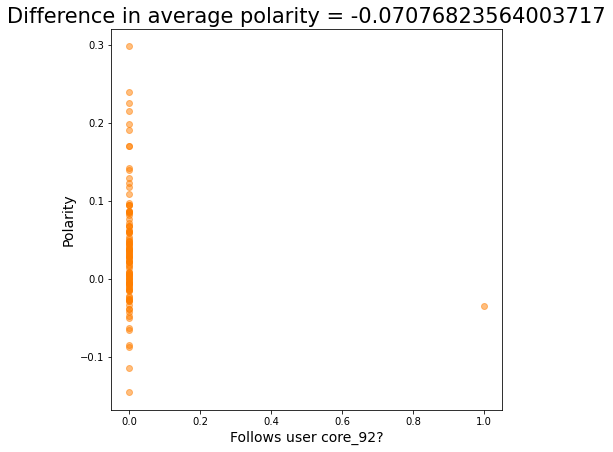

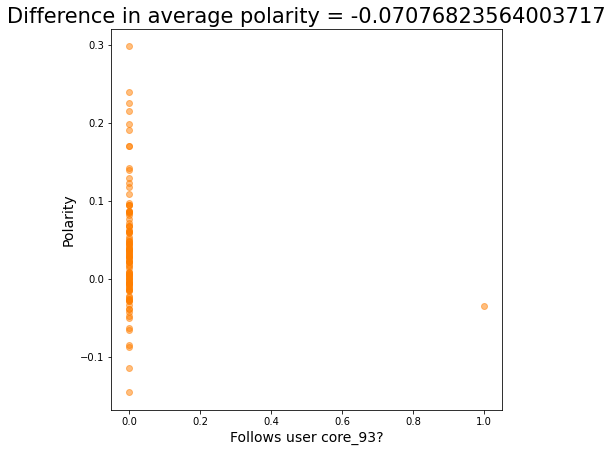

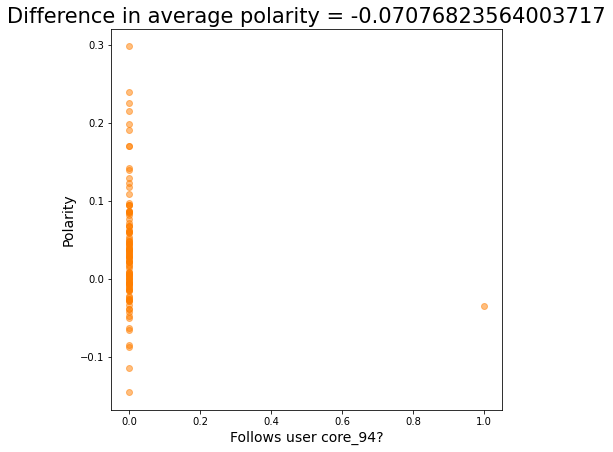

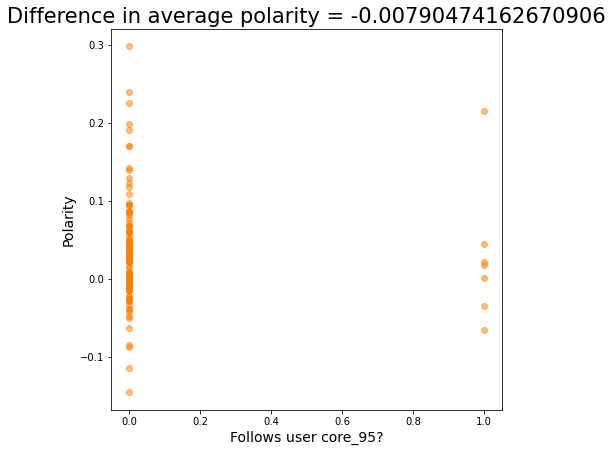

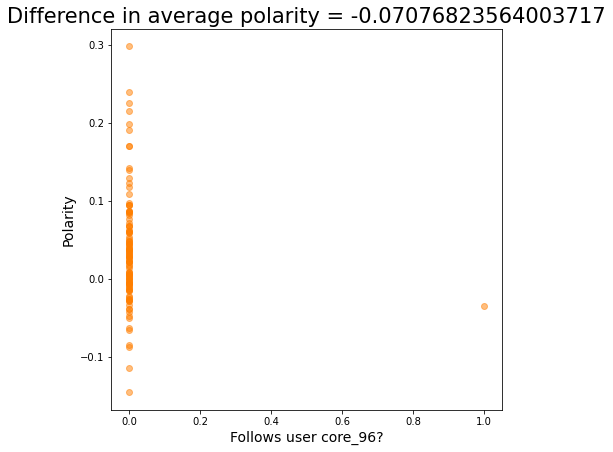

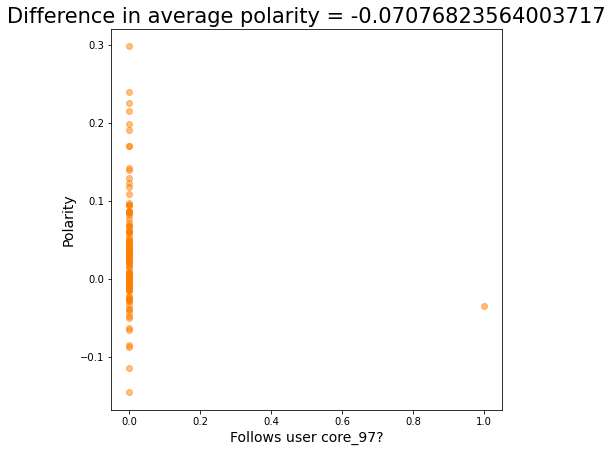

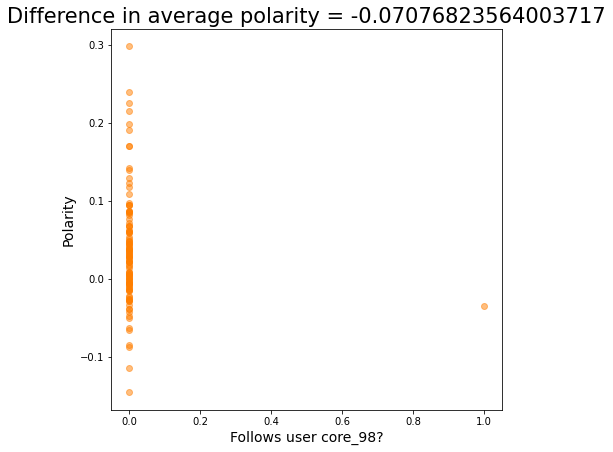

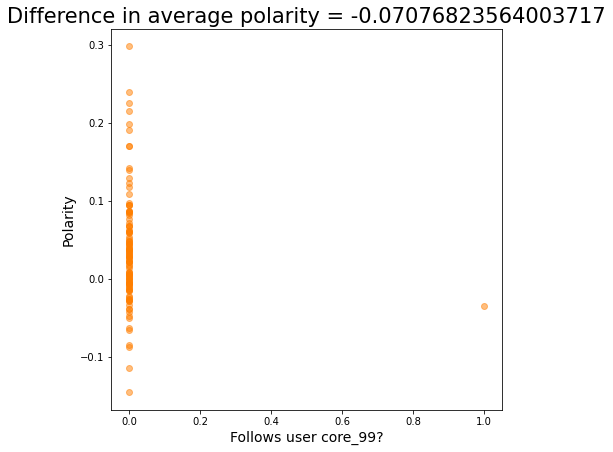

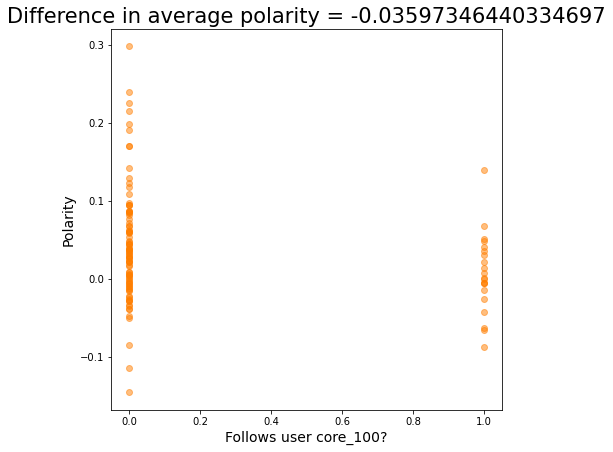

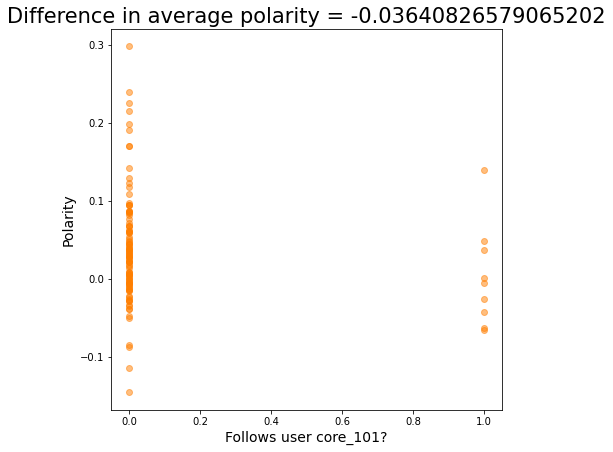

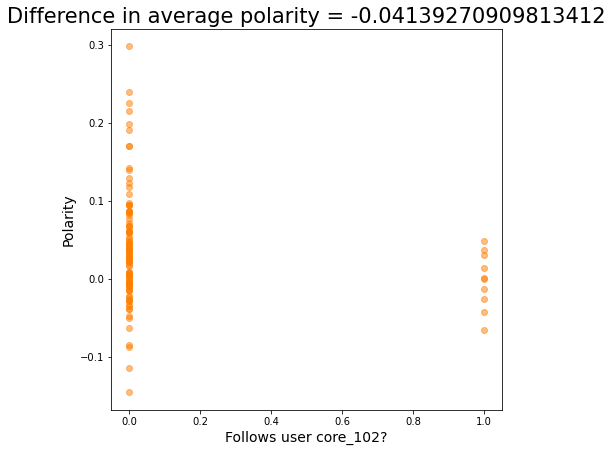

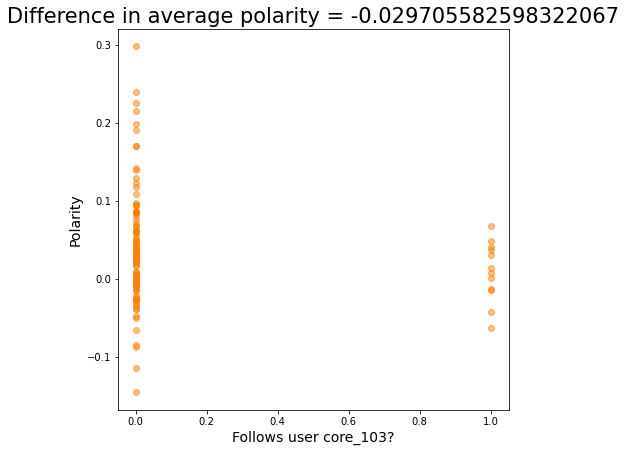

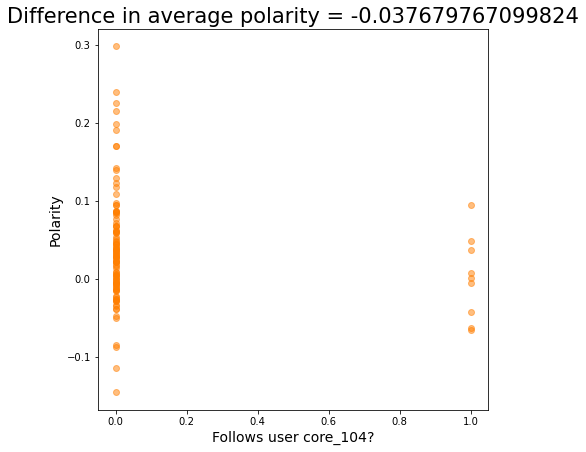

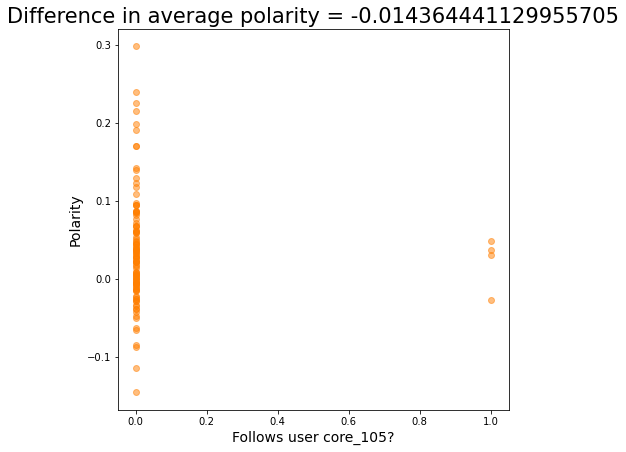

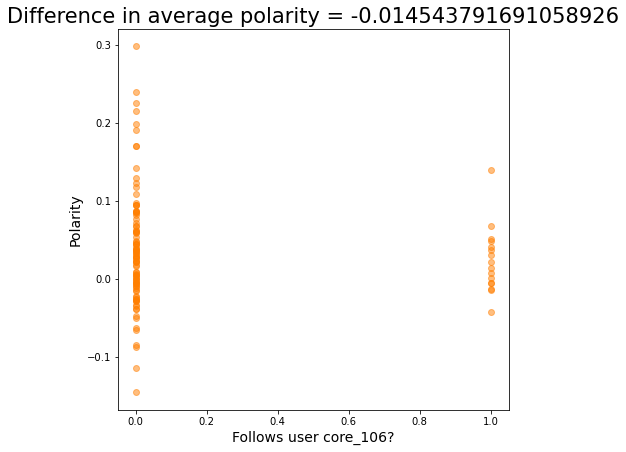

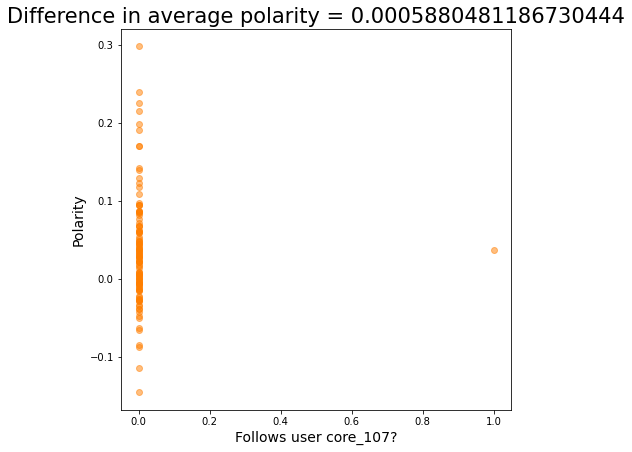

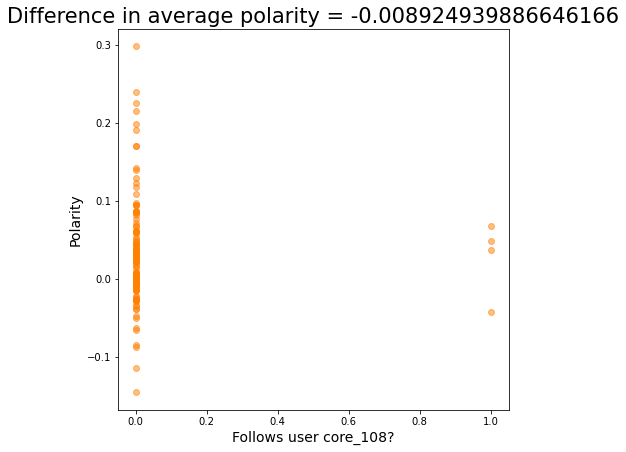

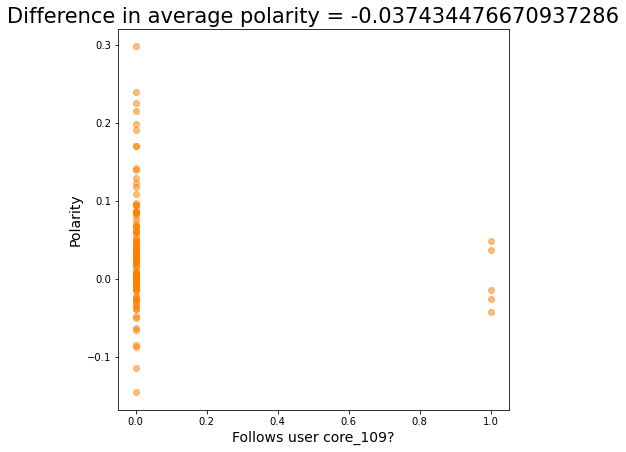

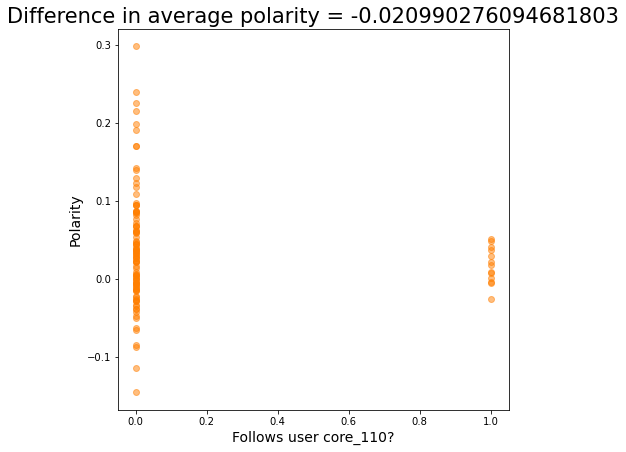

In [146]:
diaps = []
for core in data.columns[1:112]:
    plt.figure(figsize=(7,7))
    plt.scatter(data[core], data['Average_polarity'], alpha=.5, color='#FF7F00')
    plt.xlabel('Follows user '+core+'?', fontsize=14)
    plt.ylabel('Polarity', fontsize=14)
    diap = list(np.mean(data.loc[data[core]==True, ['Average_polarity']])-np.mean(data.loc[data[core]==False, ['Average_polarity']]))[0]
    diaps.append(diap)
    plt.title('Difference in average polarity = '+str(diap), fontsize=21)
    plt.show()

In [147]:
fit = sm.OLS(data.Average_polarity, 
             sm.add_constant(data[data.columns[1:112]].astype(int))).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Average_polarity   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                 -0.530
Method:                 Least Squares   F-statistic:                    0.5179
Date:                Fri, 28 May 2021   Prob (F-statistic):              0.990
Time:                        17:57:30   Log-Likelihood:                 181.98
No. Observations:                 111   AIC:                            -204.0
Df Residuals:                      31   BIC:                             12.79
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0429      0.037      1.169      0.251      -0.032       0.118
core_0         0.0650      0.159      0.409      0.686      -0.259       0.389
core_1         0.0773      0.066      1.167      0.252      -0.058       0.213
core_2        -0.0493      0.297     -0.166      0.869      -0.655       0.556
core_3        -0.1008      0.161     -0.626      0.536      -0.429       0.228
core_4        -0.0622      0.270     -0.231      0.819      -0.612       0.488
core_5        -0.0114      0.108     -0.105      0.917      -0.231       0.208
core_6        -0.0560      0.227     -0.247      0.807      -0.519       0.407
core_7        -0.0240      0.148     -0.162      0.872      -0.326       0.278
core_8        -0.0240      0.148     -0.162      0.872      -0.326       0.278
core_9        -0.1123      0.211     -0.532      0.599      -0.543       0.319
core_10       -0.0240      0.148     -0.162      0.872      -0.326       0.278
core_11       -0.0298      0.249     -0.120      0.905      -0.537       0.477
core_12        0.0568      0.050      1.131      0.267      -0.046       0.159
core_13        0.1653      0.238      0.695      0.492      -0.320       0.650
core_14        0.0112      0.081      0.139      0.890      -0.154       0.176
core_15       -0.0403      0.140     -0.287      0.776      -0.327       0.246
core_16        0.0112      0.081      0.139      0.890      -0.154       0.176
core_17        0.0112      0.081      0.139      0.890      -0.154       0.176
core_18       -0.1218      0.133     -0.915      0.367      -0.393       0.150
core_19        0.0112      0.081      0.139      0.890      -0.154       0.176
core_20       -0.1218      0.133     -0.915      0.367      -0.393       0.150
core_21       -0.0413      0.117     -0.352      0.727      -0.281       0.198
core_22       -0.0745      0.080     -0.929      0.360      -0.238       0.089
core_23        0.0666      0.073      0.917      0.366      -0.082       0.215
core_24       -0.0328      0.100     -0.327      0.746      -0.237       0.171
core_25       -0.0591      0.292     -0.202      0.841      -0.655       0.537
core_26       -0.0044      0.444     -0.010      0.992      -0.910       0.901
core_27       -0.0859      0.227     -0.378      0.708      -0.550       0.378
core_28        0.1043      0.230      0.453      0.654      -0.365       0.574
core_29       -0.0328      0.100     -0.327      0.746      -0.237       0.171
core_30        0.0021      0.181      0.011      0.991      -0.368       0.372
core_31        0.2727      0.398      0.685      0.498      -0.539       1.085
core_32       -0.0364      0.191     -0.191      0.850      -0.425       0.352
core_33       -0.1135      0.098     -1.163      0.254      -0.313       0.086
core_34        0.0456      0.050      0.906      0.372      -0.057       0.148
co

In [160]:
diaps = np.array(diaps).flatten()
diabz = np.abs(diaps-diaps.mean())/diaps.std()
featusers = diabz>=2.3
featusers = [i+1 for i in range(len(featusers)) if featusers[i]]
featusers = data.columns[featusers]

In [161]:
fit = sm.OLS(data.Average_polarity, 
             sm.add_constant(data[featusers].astype(int))).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Average_polarity   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2.573
Date:                Fri, 28 May 2021   Prob (F-statistic):             0.0578
Time:                        18:00:22   Log-Likelihood:                 139.15
No. Observations:                 111   AIC:                            -270.3
Df Residuals:                     107   BIC:                            -259.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0336      0.007      4.912      0.000       0.020       0.047
core_41        0.0914      0.050      1.820      0.072      -0.008       0.191
core_65       -0.0961      0.071     -1.360      0.177      -0.236       0.044
core_79        0.0800      0.050      1.594      0.114      -0.020       0.180
==============================================================================
Omnibus:                       22.150   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.463
Skew:                           0.904   Prob(JB):                     1.99e-08
Kurtosis:                       5.098   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
diabz

array([6.57095322e-01, 1.16258005e+00, 1.27665061e+00, 2.92077293e-01,
       1.33926905e+00, 6.88261972e-01, 3.47794558e-01, 1.08540829e+00,
       1.08540829e+00, 4.38734253e-01, 1.08540829e+00, 1.11986049e+00,
       1.42415870e-01, 5.52023802e-02, 2.57523005e-01, 7.59981645e-01,
       2.57523005e-01, 2.57523005e-01, 2.03364717e-01, 2.57523005e-01,
       2.03364717e-01, 6.23165574e-01, 1.19048319e-01, 2.53409728e-01,
       3.94229704e-01, 1.13694826e+00, 3.67685293e-01, 5.04379713e-01,
       1.04788874e+00, 3.94229704e-01, 5.64114021e-01, 2.40852960e-01,
       7.09948364e-01, 4.41095672e-01, 1.87798607e+00, 2.01443289e+00,
       8.93136342e-01, 8.93136342e-01, 8.93136342e-01, 8.93136342e-01,
       4.08850385e-01, 2.66658540e+00, 8.05921073e-01, 6.77125664e-01,
       8.93136342e-01, 2.80257757e-01, 1.81376112e+00, 2.44984410e-01,
       1.81376112e+00, 2.86063499e-01, 1.81376112e+00, 1.81376112e+00,
       1.81376112e+00, 1.81376112e+00, 1.81376112e+00, 4.80858805e-01,
      